<a href="https://colab.research.google.com/github/mltlachac/DepreST-CAT/blob/main/All_Player_locateSkillDrills.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [9]:
#Mia's/Katies File Path 
folder = "/content/drive/MyDrive/MQP/NFL Combine Drill Tracking/"
date = dt.now().strftime("%d-%m-%Y, %H:%M:%S")

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
tracking_df = pd.read_csv(folder + 'Data/combineTrackingData.csv')
player_df = pd.read_csv(folder + 'Data/playerInfo.csv')
results_df = pd.read_csv(folder + 'Data/combineResults.csv')
forty_df = pd.read_csv(folder + 'Data/fortyYardDashTimeStamps.csv')

three_cone_filepath = folder + 'Three Cone/combinedThreeCone_' + date + '.csv'

FileNotFoundError: ignored

In [ ]:
#Matt's File Paths
#tracking_df = pd.read_csv("/Users/mattd/OneDrive/Documents/Senior Year/Fall/MQP/data/combineTrackingData.csv")
#player_df = pd.read_csv("/Users/mattd/OneDrive/Documents/Senior Year/Fall/MQP/data/playerInfo.csv")
#results_df = pd.read_csv("/Users/mattd/OneDrive/Documents/Senior Year/Fall/MQP/data/combineResults.csv")
#forty_df = pd.read_csv("/Users/mattd/OneDrive/Documents/Senior Year/Fall/MQP/data/fortyYardDashTimeStamps.csv")

#tracking_df_new = pd.read_csv("/Users/mattd/OneDrive/Documents/Senior Year/Fall/MQP/data/combineTrackingData_Nov2022Update.csv")
#player_df_new = pd.read_csv("/Users/mattd/OneDrive/Documents/Senior Year/Fall/MQP/data/playerInfo_Nov2022Update.csv")
#results_df_new = pd.read_csv("/Users/mattd/OneDrive/Documents/Senior Year/Fall/MQP/data/combineResults_Nov2022Update.csv")
#forty_df_new = pd.read_csv("/Users/mattd/OneDrive/Documents/Senior Year/Fall/MQP/data/fortyYardDashTimeStamps_Nov2022Update.csv")

#WR tracking
#tracking_df_wr = pd.read_csv("/Users/mattd/OneDrive/Documents/Senior Year/Fall/MQP/data/WROnly.csv")
#tracking_df_db = pd.read_csv("/Users/mattd/OneDrive/Documents/Senior Year/Fall/MQP/data/DBOnly.csv")

In [17]:
tracking_df_wr = pd.read_csv("/WROnly.txt")


In [18]:
tracking_df_wr.head()

Unnamed: 0  playerId            timeStamp        posX       posY      velX  \
0      351814     54475  2022-03-03 17:13:36  121.500000  51.900000  0.000000   
1      351815     54475  2022-03-03 17:13:36  121.533333  51.866667  0.003333   
2      351816     54475  2022-03-03 17:13:36  121.533333  51.900000  0.013333   
3      351817     54475  2022-03-03 17:13:36  121.566667  51.900000  0.023333   
4      351818     54475  2022-03-03 17:13:36  121.566667  51.900000  0.036667   

       velY      accX      accY          Group position  
0  0.000000  0.003333  0.000000  Group 3 QB/WR       WR  
1  0.000000  0.036667 -0.003333  Group 3 QB/WR       WR  
2  0.003333  0.083333  0.020000  Group 3 QB/WR       WR  
3  0.003333  0.120000  0.023333  Group 3 QB/WR       WR  
4  0.006667  0.120000  0.030000  Group 3 QB/WR       WR

In [ ]:
#Katies's File Paths
tracking_df = pd.read_csv("/content/combineTrackingData.csv")
player_df = pd.read_csv("/content/playerInfo.csv")

# Plotting Functions

In [22]:
def plot_speed_range(move_array, min_speed_range, max_speed_range, color):
    x_array = []
    y_array = []

    for i in range (len(move_array)):
        if (move_array[i].vel >= min_speed_range and move_array[i].vel < max_speed_range):
            x_array.append(move_array[i].posX)
            y_array.append(move_array[i].posY)
        elif (len(x_array) > 0 ):
            x_array.append(move_array[i].posX)
            y_array.append(move_array[i].posY)

            plt.plot(x_array, y_array, c=color, linewidth = 0, marker='.')
            #plt.plot(x_array, y_array,c=color)

            x_array = []
            y_array = []

    if (len(x_array) >= 1 ):
        plt.plot(x_array, y_array, c=color, linewidth = 0, marker='.')

In [23]:
def plot_path_cone(move_array,total_time):
    max_acc       = 0
    min_acc_threshold = 1
    for element in move_array:
      playerId = element.playerId
      if (max_acc < element.acc):
        max_acc = element.acc
    max_acc = round(max_acc, 1)
    time = move_array[0].timeStamp.split(" ")[1][:-6]
    if (max_acc < min_acc_threshold):
        return
    plt.scatter(move_array[0].posX,move_array[0].posY,100, c="orange")
    plt.scatter(X,Y,1000,c = 'black')
    #plot_speed_range(move_array,0,min_acc_threshold - 0.5,"black") #look into the windows per color here
    #plot_speed_range(move_array, min_acc_threshold - 0.5 , min_acc_threshold, "green")
    #plot_speed_range(move_array,min_acc_threshold,max_acc-2,"blue")
    #plot_speed_range(move_array,max_acc-2,100,"red")


    plot_speed_range(move_array,0,1,"black") #look into the windows per color here
    plot_speed_range(move_array,1.000000000000001,2.5,"purple")
    plot_speed_range(move_array,2.500000000000001,5.5,"yellow") 
    plot_speed_range(move_array,5.500000000001,5.9, "green")
    plot_speed_range(move_array,5.90000000001,6.9,"blue")
    plot_speed_range(move_array,6.90000000001,100, "red")

    plt.title(f"PlayerId {playerId}, Time {time}, Time {str(total_time)} second, Max acc {str(max_acc)}")

    # For some reason, the axis labels are not being drawn
    plt.xlabel("X (yards)")
    plt.ylabel("Y (yards)")

    #sets the entire field
   # plt.xlim(-10,125)
    #plt.ylim(-10,75)

    plt.show()

In [24]:
def plot_path(move_array,total_time):
    max_acc       = 0
    min_acc_threshold = 1
    for element in move_array:
      playerId = element.playerId
      if (max_acc < element.acc):
        max_acc = element.acc
    max_acc = round(max_acc, 1)
    time = move_array[0].timeStamp.split(" ")[1][:-6]
    if (max_acc < min_acc_threshold):
        return
    plt.scatter(move_array[0].posX,move_array[0].posY,100, c="orange")
    #plot_speed_range(move_array,0,min_acc_threshold - 0.5,"black") #look into the windows per color here
    #plot_speed_range(move_array, min_acc_threshold - 0.5 , min_acc_threshold, "green")
    #plot_speed_range(move_array,min_acc_threshold,max_acc-2,"blue")
    #plot_speed_range(move_array,max_acc-2,100,"red")


    plot_speed_range(move_array,0,1,"black") #look into the windows per color here
    plot_speed_range(move_array,1.000000000000001,2.5,"purple")
    plot_speed_range(move_array,2.500000000000001,5.5,"yellow") 
    plot_speed_range(move_array,5.500000000001,5.9, "green")
    plot_speed_range(move_array,5.90000000001,6.9,"blue")
    plot_speed_range(move_array,6.90000000001,100, "red")

    plt.title(f"PlayerId {playerId}, Time {time}, Time {str(total_time)} second, Max acc {str(max_acc)}")

    # For some reason, the axis labels are not being drawn
    plt.xlabel("X (yards)")
    plt.ylabel("Y (yards)")

    #sets the entire field
   # plt.xlim(-10,125)
    #plt.ylim(-10,75)

    plt.show()

# Three Cone Finder Function

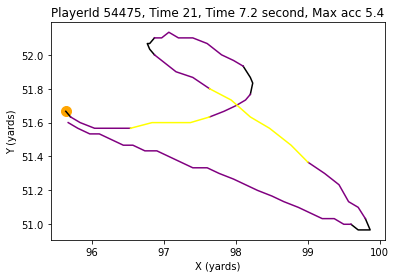

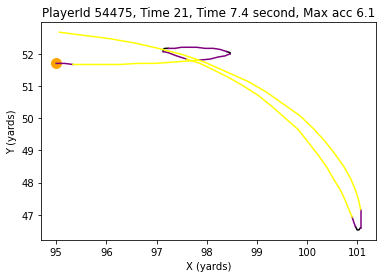

playerId            timeStamp       posX       posY      velX      velY  \
0      54475  2022-03-03 21:55:22  95.000000  51.700000  1.406667 -0.030000   
1      54475  2022-03-03 21:55:22  95.066667  51.700000  1.783333 -0.023333   
2      54475  2022-03-03 21:55:22  95.166667  51.700000  2.206667 -0.023333   
3      54475  2022-03-03 21:55:22  95.333333  51.666667  2.706667  0.026667   
4      54475  2022-03-03 21:55:22  95.600000  51.666667  3.003333  0.036667   
..       ...                  ...        ...        ...       ...       ...   
70     54475  2022-03-03 21:55:29  97.033333  52.166667 -4.876667  1.850000   
71     54475  2022-03-03 21:55:29  96.566667  52.333333 -4.956667  1.533333   
72     54475  2022-03-03 21:55:29  96.066667  52.466667 -4.983333  1.253333   
73     54475  2022-03-03 21:55:29  95.566667  52.566667 -4.976667  1.010000   
74     54475  2022-03-03 21:55:29  95.066667  52.666667 -4.933333  0.793333   

        accX      accY       acc       vel  totalTime  drill  
0   2.320000  0.090000  2.321745  1.406987        7.4      3  
1   2.336667  0.083333  2.338152  1.783486        7.4      3  
2   2.820000  0.076667  2.821042  2.206790        7.4      3  
3   2.916667  0.146667  2.920352  2.706798        7.4      3  
4   2.663333  0.126667  2.666344  3.003557        7.4      3  
..       ...       ...       ...       ...        ...    ...  
70 -0.910000 -3.153333  3.282013  5.215782        7.4      3  
71 -0.416667 -2.980000  3.008988  5.188416        7.4      3  
72  0.013333 -2.683333  2.683366  5.138527        7.4      3  
73  0.396667 -2.316667  2.350381  5.078121        7.4      3  
74  0.690000 -2.006667  2.121983  4.996714        7.4      3  

[75 rows x 12 columns]

In [ ]:
def threeC_finder(df,playerId):
    #acceleration and velocity w/o x & y
    df['acc'] = pow(pow(df.accX,2) + pow(df.accY,2),0.5)
    df['vel'] = pow(pow(df.velX,2) + pow(df.velY,2),0.5)
    min_acc_threshold = 2
    time_threshold = 3
    vel_threshold = 1
    min_time = 6.0
    max_time = 8.0
    total_distance      = 0
    total_distance_x    = 0
    total_distance_y    = 0
    move_array          = []
    momentary_stop      = 0
    momentary_stop_threshold = 50
    total_time = 0
    #final_df = pd.DataFrame(columns = ['playerId', 'timeStamp', 'posX', 'posY', 'velX','velY', 'accX', 'accY', 'acc','vel'])
    #curr_player = player_df.iloc[12].playerId
    #curr_player = 
    curr_player_df = df.loc[df.playerId == playerId]
    #curr_player_df = curr_player_df.loc[curr_player_df.timeStamp > '2022-03-03 19:50:00.0000000']
    #curr_player_df = curr_player_df.loc[curr_player_df.timeStamp < '2022-03-03 19:59:00.0000000']
    curr_player_df = curr_player_df.loc[curr_player_df.posX > 92]
    curr_player_df = curr_player_df.loc[curr_player_df.posX < 103]
    curr_player_df = curr_player_df.loc[curr_player_df.posY < 54]
    curr_player_df = curr_player_df.loc[curr_player_df.posY > 45]
    for i in range(len(curr_player_df)):
        curr_df = curr_player_df.iloc[i]
        if curr_df.acc >= min_acc_threshold or curr_df.vel >= vel_threshold or (len(move_array) > 0 and momentary_stop < momentary_stop_threshold):
            if len(move_array) > 0:
                total_distance_x += math.fabs(curr_df.posX - move_array[-1].posX)
                total_distance_y += math.fabs(curr_df.posY - move_array[-1].posX)
                total_distance += math.fabs(pow(pow(math.fabs(curr_df.posX - move_array[-1].posX),2) + pow(math.fabs(curr_df.posY - move_array[-1].posX),2),0.5)) 
                if curr_df.acc < min_acc_threshold:
                    momentary_stop += 1
                else:
                    momentary_stop = 0
            else:
                total_distance      = 0
                total_distance_x    = 0
                total_distance_y    = 0
                momentary_stop      = 0
                start = curr_df
                move_array.append(curr_df)
                
            if curr_df.posX > start.posX:
                move_array.append(curr_df)
      #print("not else")
        elif (len(move_array) > 0):
            total_time = (len(move_array) - 1) / 10
            #print(move_array[0].posX)
            if (total_time > min_time and total_time < max_time and move_array[0].posY >50 ):
                plot_path(move_array,total_time)
                #print(len(move_array))
            move_array = []
    if (len(move_array)):
        total_time = (len(move_array) - 1) / 10
        #print(move_array[0].posX)
        if (total_time >= time_threshold and move_array[0].posY >50):
            plot_path(move_array, total_time)
        else:
            move_array = []
            #print(len(move_array))
    final_df = pd.DataFrame(move_array, index =[i for i in range(len(move_array))],columns =['playerId', 'timeStamp', 'posX', 'posY', 'velX','velY', 'accX', 'accY', 'acc','vel'])
    final_df['totalTime'] = total_time
    final_df['drill'] = 3
    return final_df
threeC_finder(tracking_df_wr,54475)

94.0333333333333
100.9
101.066666666667
95.7666666666667
101.766666666667
97.7
93.8333333333333
94.4
99.8666666666667
94.7333333333333
100.1
102.2
97.6
97.7666666666667
102.9
92.4
95.4666666666667


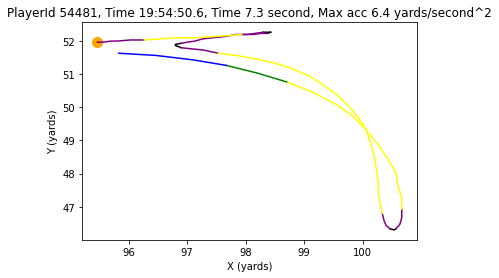

2
102.966666666667
101.333333333333
95.5333333333333


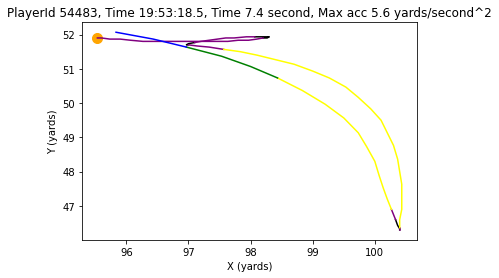

3
92.1333333333333
97.9333333333333
101.1
101.466666666667
98.8666666666667
93.6
97.0666666666667
95.9
95.2333333333333
92.4
95.5333333333333
95.7333333333333


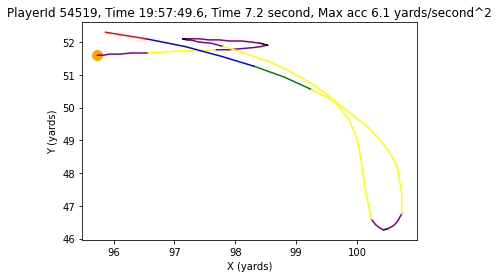

4
98.8
99.3666666666667
96.4333333333333
5
99.0333333333333
101.233333333333
101.333333333333
92.3666666666667


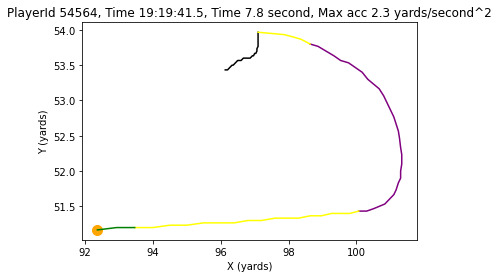

93.3333333333333
95.5666666666667


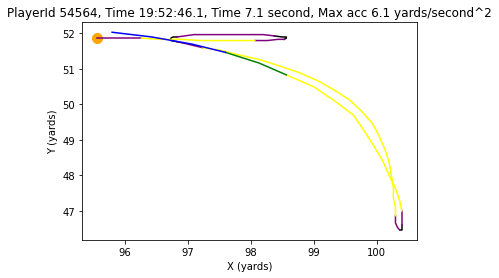

6
93.0333333333333
97.8666666666667
101.966666666667
101.8
96.3333333333333
7
94.8333333333333
97.1
102.5
99.5666666666667
94.3333333333333
102.9
97.6666666666667
94.6333333333333
95.5333333333333
100.1
92.8666666666667


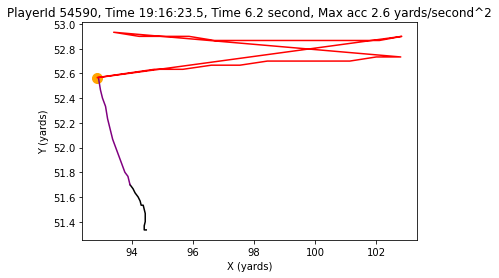

95.5666666666667


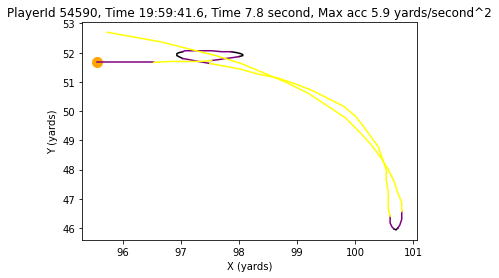

8
99.7666666666667
100.1
98.5333333333333
94.9
96.3333333333333
95.3666666666667
95.8666666666667


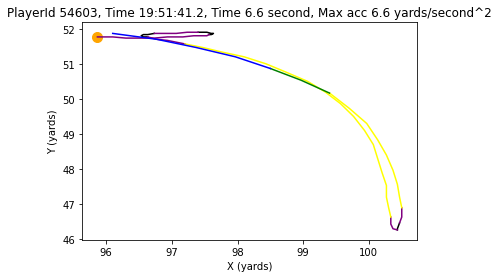

9
95.3333333333333
99.1
100.666666666667
93.0
96.9666666666667
102.9
99.8666666666667
97.2666666666667
94.0333333333333
95.8333333333333
101.033333333333
93.8333333333333
93.4666666666667
95.6666666666667


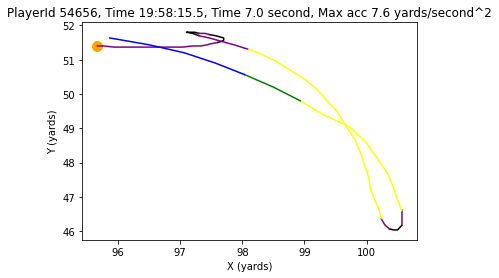

10
94.6333333333333
99.8333333333333
93.5333333333333
93.3666666666667
92.6333333333333


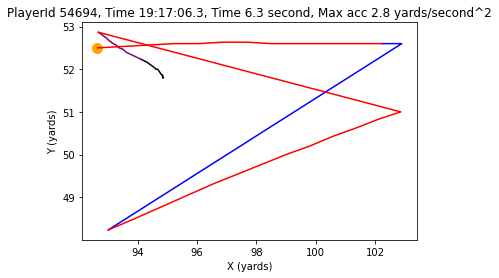

95.7
95.7666666666667


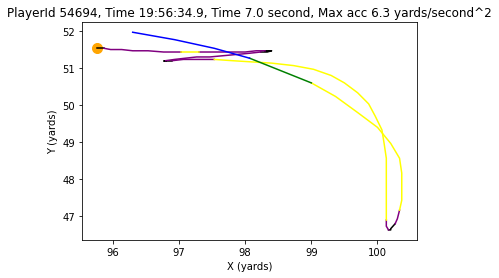

11
102.9
92.2
101.366666666667
95.3


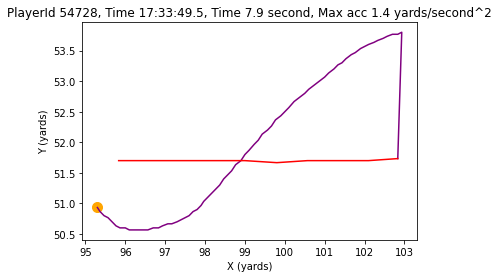

101.6
95.2666666666667
95.4666666666667


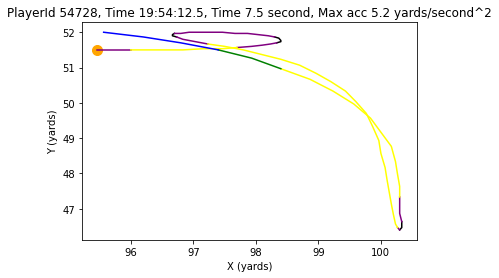

12
100.233333333333
98.0666666666667
102.166666666667
95.5333333333333
95.4666666666667
96.0666666666667


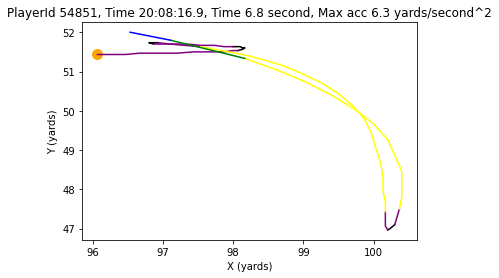

95.8666666666667
95.8333333333333
95.8666666666667


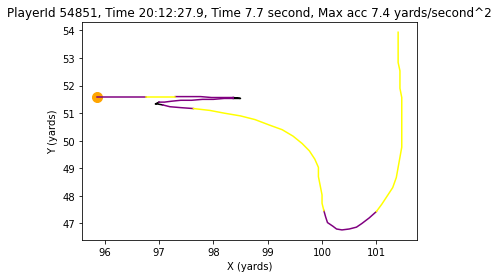

13
92.5333333333333
98.0666666666667
100.533333333333
92.1333333333333
102.866666666667
99.8666666666667
93.0333333333333
95.5333333333333
100.233333333333
99.0666666666667
97.9333333333333
101.066666666667
95.8


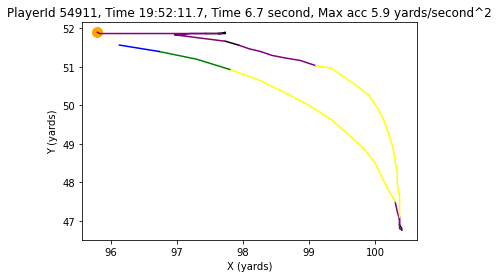

95.7


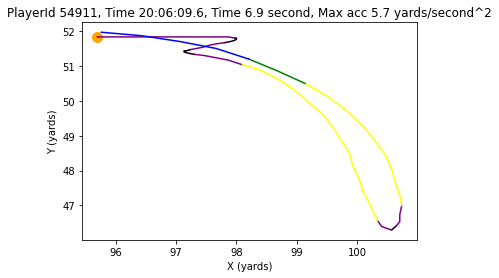

14
92.0666666666667
94.3666666666667
96.4
102.833333333333
102.733333333333
95.1666666666667
95.4333333333333


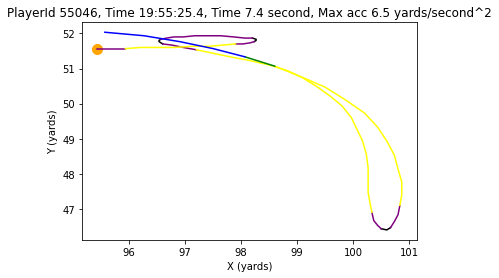

15
92.7333333333333
97.5333333333333
100.366666666667
94.1666666666667
102.933333333333
99.4
94.2333333333333
100.366666666667
98.0666666666667
16


KeyboardInterrupt: 

In [ ]:
players = player_df['playerId'].drop_duplicates().tolist()
i = 0
for player in players:
    i+=1
    if i == 1:
        combined = threeC_finder(tracking_df, player)
    else:
        print(i)
        combined = combined.append(threeC_finder(tracking_df, player))
#combined.to_csv('combinedThreeCone_new.csv')

# FOR NEW PLAYERS

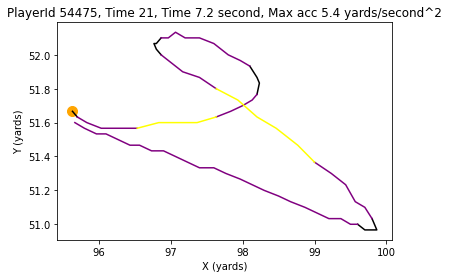

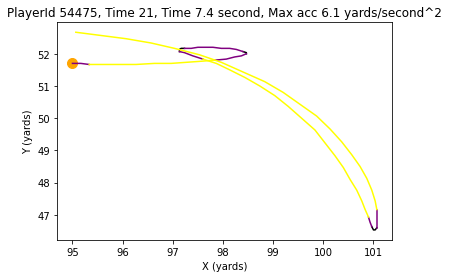

2
3
4
5
6
7


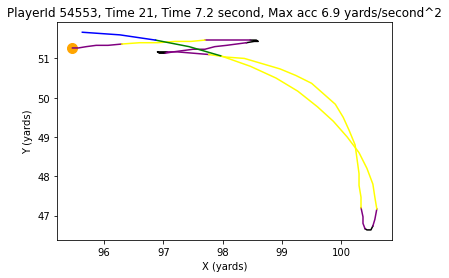

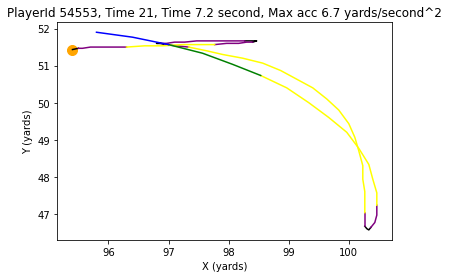

8


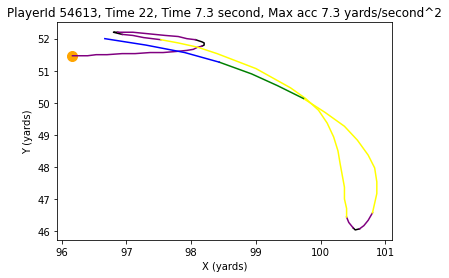

9
10
11
12
13
14


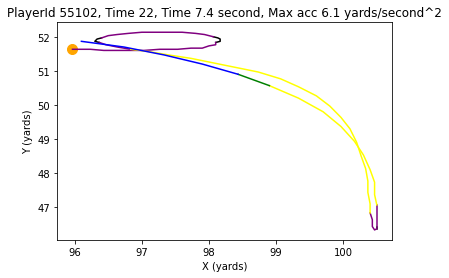

playerId            timeStamp       posX       posY      velX      velY  \
0     54475  2022-03-03 21:55:22  95.000000  51.700000  1.406667 -0.030000   
1     54475  2022-03-03 21:55:22  95.066667  51.700000  1.783333 -0.023333   
2     54475  2022-03-03 21:55:22  95.166667  51.700000  2.206667 -0.023333   
3     54475  2022-03-03 21:55:22  95.333333  51.666667  2.706667  0.026667   
4     54475  2022-03-03 21:55:22  95.600000  51.666667  3.003333  0.036667   
..      ...                  ...        ...        ...       ...       ...   
70    55102  2022-03-03 22:00:36  98.433333  50.900000 -5.160000  3.133333   
71    55102  2022-03-03 22:00:36  97.900000  51.200000 -5.540000  2.816667   
72    55102  2022-03-03 22:00:37  97.333333  51.466667 -5.960000  2.400000   
73    55102  2022-03-03 22:00:37  96.733333  51.700000 -6.323333  1.993333   
74    55102  2022-03-03 22:00:37  96.100000  51.866667 -6.643333  1.600000   

        accX      accY       acc       vel  totalTime  drill  
0   2.320000  0.090000  2.321745  1.406987        7.4      3  
1   2.336667  0.083333  2.338152  1.783486        7.4      3  
2   2.820000  0.076667  2.821042  2.206790        7.4      3  
3   2.916667  0.146667  2.920352  2.706798        7.4      3  
4   2.663333  0.126667  2.666344  3.003557        7.4      3  
..       ...       ...       ...       ...        ...    ...  
70 -3.953333 -2.840000  4.867694  6.036835        7.4      3  
71 -3.306667 -3.046667  4.496245  6.214918        7.4      3  
72 -2.920000 -3.376667  4.464110  6.425076        7.4      3  
73 -2.760000 -3.690000  4.608004  6.630077        7.4      3  
74 -2.570000 -3.800000  4.587472  6.833292        7.4      3  

[459 rows x 12 columns]

In [ ]:
players = player_df['playerId'].drop_duplicates().tolist()
i = 0
players = [54475,54476,54499,54508,54515,54517,54553,54613,54628,54667,54861,54865,54951,55102]
for player in players:
    i+=1
    if i == 1:
        combined = threeC_finder(tracking_df_new, player)
    else:
        print(i)
        combined = combined.append(threeC_finder(tracking_df_new, player))
combined
#combined.to_csv('combinedThreeCone.csv')

# Forty Tracker Function

In [29]:
def forty_finder_new(df,playerId):
    #acceleration and velocity w/o x & y
    df['acc'] = pow(pow(df.accX,2) + pow(df.accY,2),0.5)
    df['vel'] = pow(pow(df.velX,2) + pow(df.velY,2),0.5)
    min_acc_threshold = 2
    time_threshold = 0.5
    vel_threshold = 1
    min_time = 4
    max_time = 5.5
    total_distance      = 0
    total_distance_x    = 0
    total_distance_y    = 0
    move_array          = []
    momentary_stop      = 0
    momentary_stop_threshold = 1
    total_time = 0
    stopper = 0
    trialCounter = 1
    total_timep = 10000
    start = df.iloc[0]
    final_df =[]
    
    curr_player_df = df.loc[df.playerId == playerId]
    #curr_player_df = curr_player_df.loc[curr_player_df.timeStamp > '2022-03-03 18:00:00.0000000']
    #curr_player_df = curr_player_df.loc[curr_player_df.timeStamp < '2022-03-03 18:32:00.0000000']
    curr_player_df = curr_player_df.loc[curr_player_df.posX > 11]
    curr_player_df = curr_player_df.loc[curr_player_df.posX < 60]
    curr_player_df = curr_player_df.loc[curr_player_df.posY < 0]
    curr_player_df = curr_player_df.loc[curr_player_df.posY > -2]
    for i in range(len(curr_player_df)):
        curr_df = curr_player_df.iloc[i]
        if curr_df.accX >= min_acc_threshold or curr_df.velX >= vel_threshold or (len(move_array) > 0 and momentary_stop < momentary_stop_threshold):
            if len(move_array) == 0 and curr_df.posX < 15:
                total_distance      = 0
                total_distance_x    = 0
                total_distance_y    = 0
                momentary_stop      = 0
                start = curr_df
                move_array.append(curr_df)
         
            else:
                if (curr_df.posX < 40 + start.posX) and (curr_df.timeStamp < (start.timeStamp[0:17] + str( 7+ int(start.timeStamp[17:19])))):
                    total_distance_x += math.fabs(curr_df.posX - move_array[-1].posX)
                    total_distance_y += math.fabs(curr_df.posY - move_array[-1].posY)
                    total_distance += math.fabs(pow(pow(math.fabs(curr_df.posX - move_array[-1].posX),2) + pow(math.fabs(curr_df.posY - move_array[-1].posX),2),0.5))
                    move_array.append(curr_df)
                else:
                    if trialCounter == 1 and len(move_array)>0:
                        #print(total_distance_x)
                        total_time = (len(move_array) - 1) / 10
                        if total_distance_x >35 and total_time < max_time and total_time < total_timep:
                            #print("total time",total_time)
                            plot_path(move_array,total_time)
                            final_df = pd.DataFrame(move_array, index =[i for i in range(len(move_array))],columns =['playerId', 'timeStamp', 'posX', 'posY', 'velX','velY', 'accX', 'accY', 'acc','vel', 'Group','position'])
                            final_df['totalTime'] = total_time
                            final_df['drill'] = 1  
                            final_df['trial'] = 1
                            move_array = []
                            trialCounter +=1
                            momentary_stop = 0
                            total_timep = total_time
                        else: 
                                move_array = []
                        
                    else:
                        if len(move_array)>0:
                            #print(total_distance_x)
                            if total_distance_x >35:
                                total_time = (len(move_array) -1) / 10
                                #print("ttp",total_timep)
                                if total_time < max_time and total_time > min_time and total_time < total_timep:
                                    #print("total timep",total_time)
                                    plot_path(move_array,total_time)
                                    #print("TEST")
                                    new_df = pd.DataFrame(move_array, index =[i for i in range(len(move_array))],columns =['playerId', 'timeStamp', 'posX', 'posY', 'velX','velY', 'accX', 'accY', 'acc','vel','Group','position'])
                                    new_df['totalTime'] = total_time
                                    new_df['drill'] = 1  
                                    new_df['trial'] = trialCounter
                                    final_df = new_df
                                    move_array = []
                                    trialCounter +=1
                                else:
                                    move_array = []
                            else:
                                move_array = [] 
    if len(final_df)>0:
        return final_df
    else:
        print(f"{player} did not run the 40")
    
forty_finder_new(tracking_df_wr,54496)

54475 did not run the 40


# Forty Finder for WR Group

54475 did not run the 40


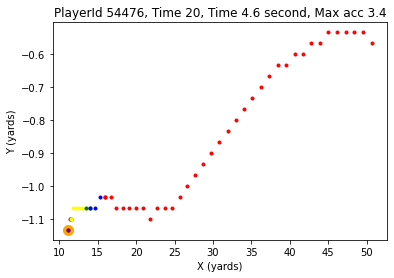

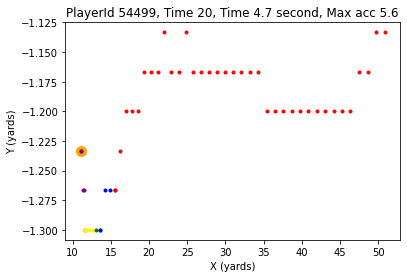

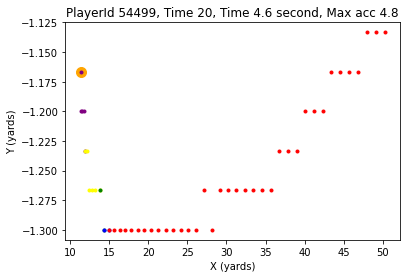

54508 did not run the 40


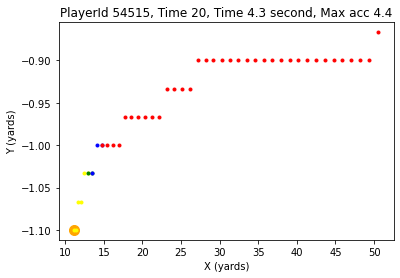

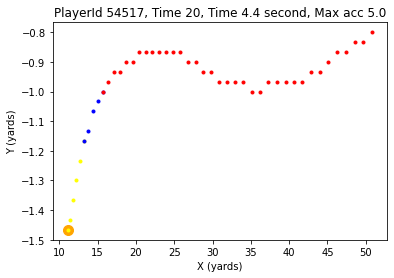

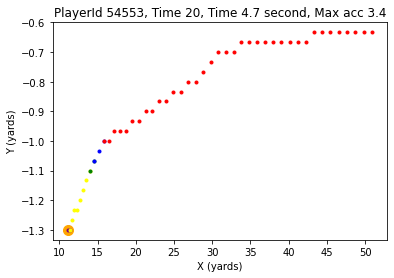

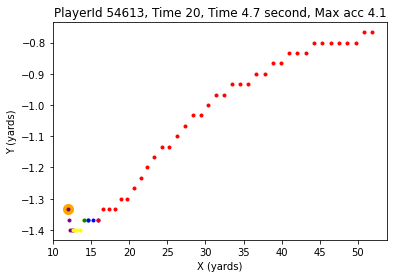

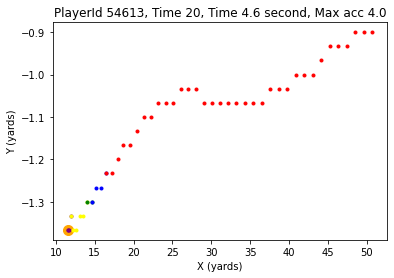

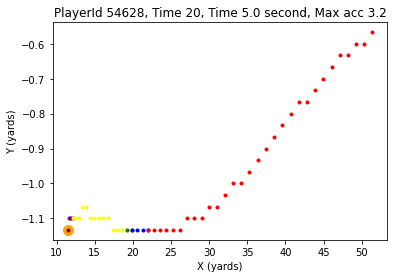

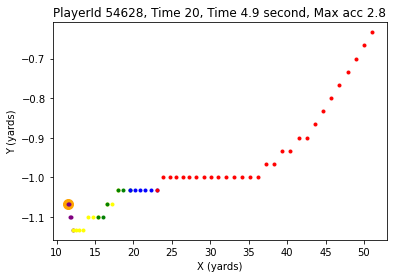

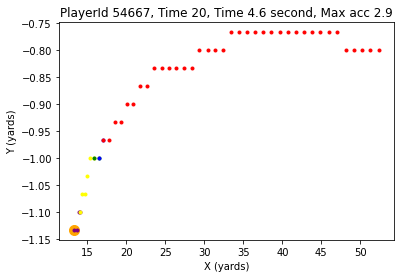

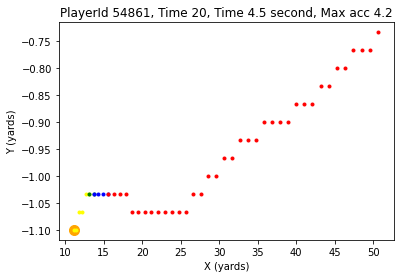

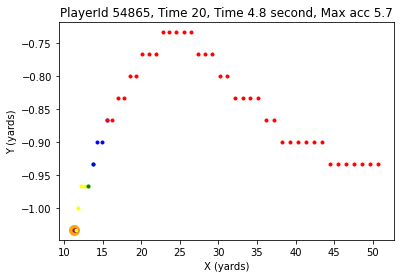

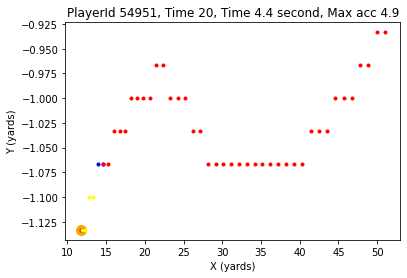

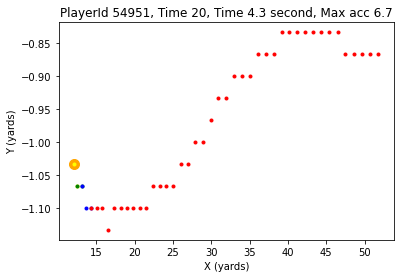

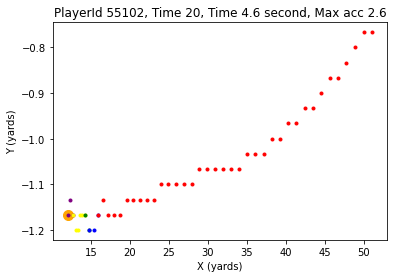

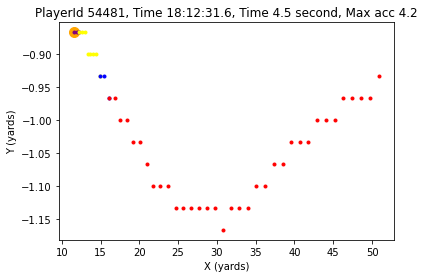

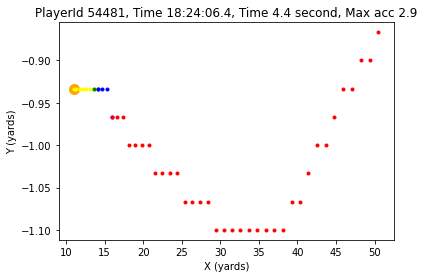

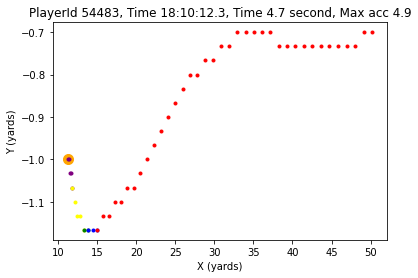

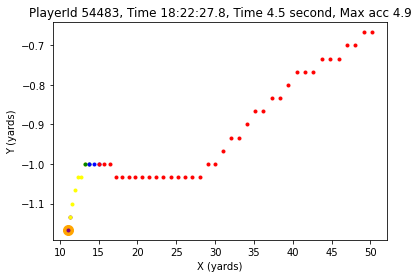

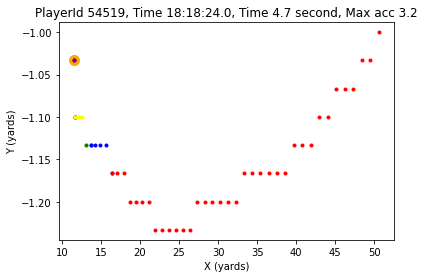

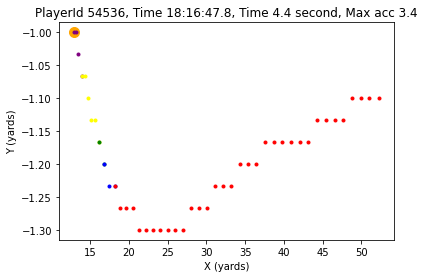

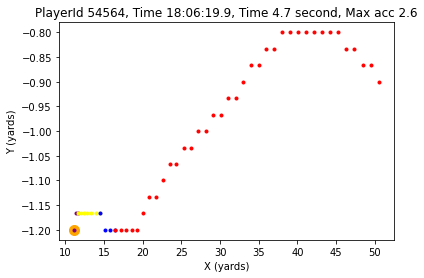

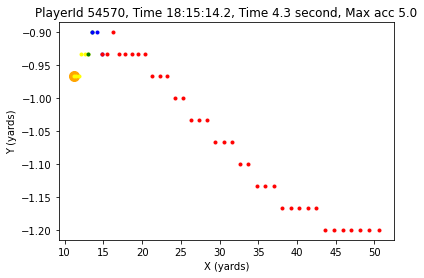

54590 did not run the 40


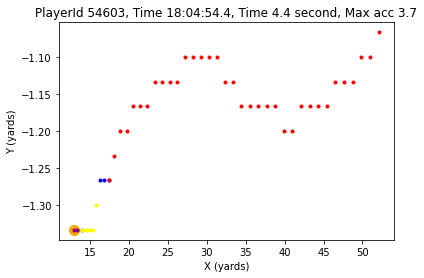

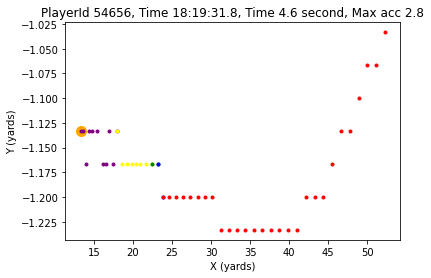

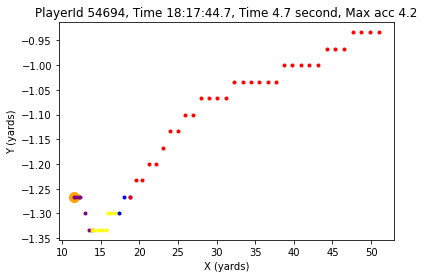

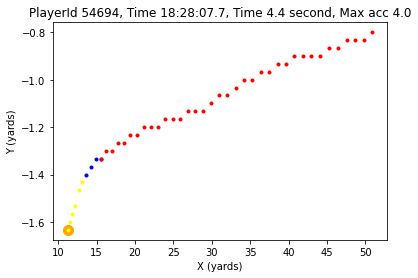

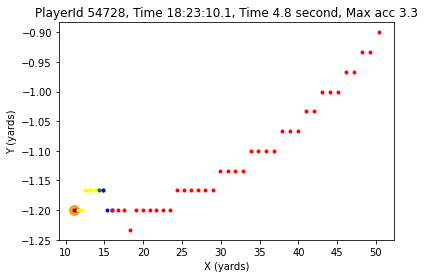

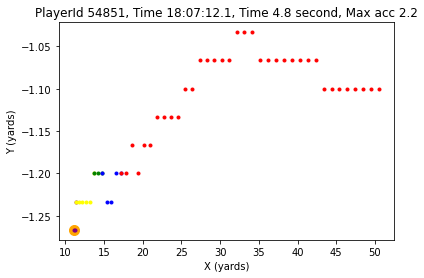

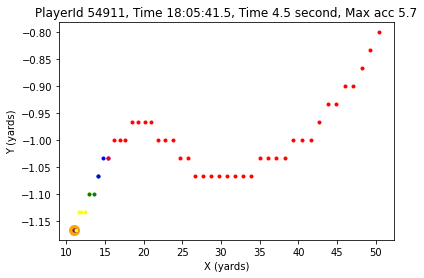

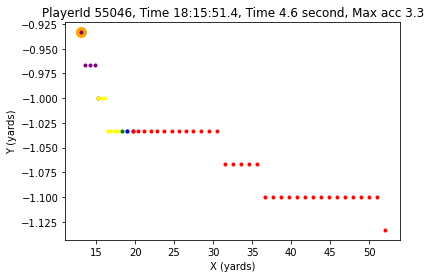

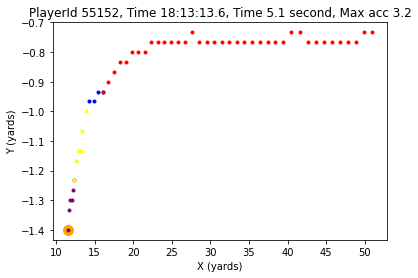

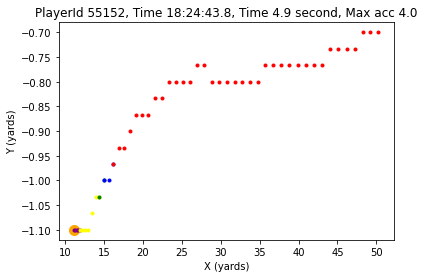

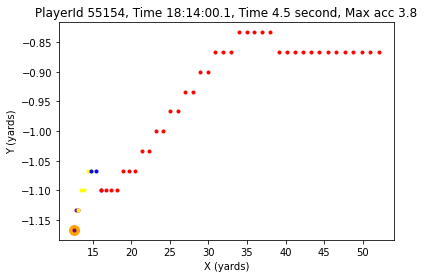

In [30]:
players = tracking_df_wr['playerId'].drop_duplicates().tolist()
combined = pd.DataFrame(columns =['playerId', 'timeStamp', 'posX', 'posY', 'velX','velY', 'accX', 'accY', 'acc','vel','Group', 'position','totalTime','drill','trial'])
i = 0
for player in players:
    i +=1
    combined = combined.append(forty_finder_new(tracking_df_wr, player))

#combined

In [26]:
combined.to_csv('combinedForty.csv')

# Forty Tracker for DB Group

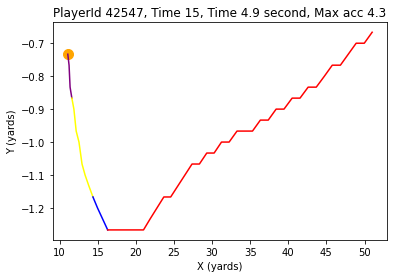

42547 and their best drill trial: 1



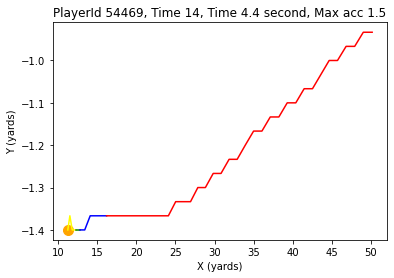

54469 and their best drill trial: 1



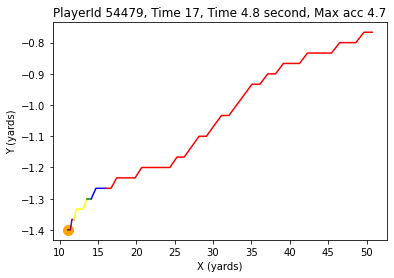

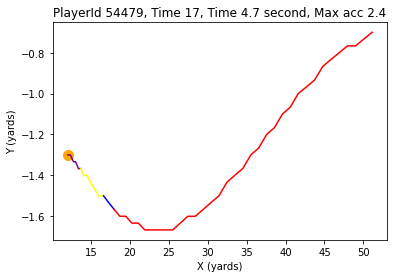

54479 and their best drill trial: 2



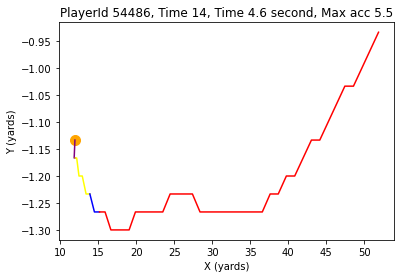

54486 and their best drill trial: 1



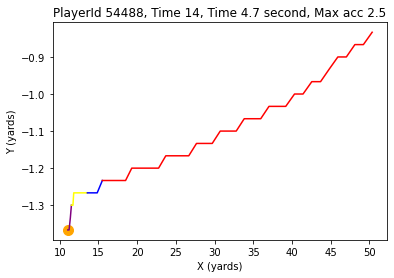

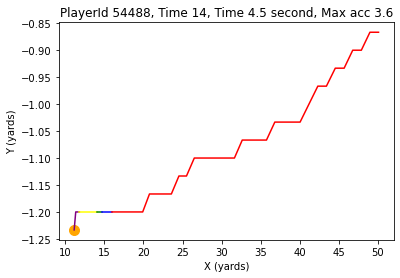

54488 and their best drill trial: 2



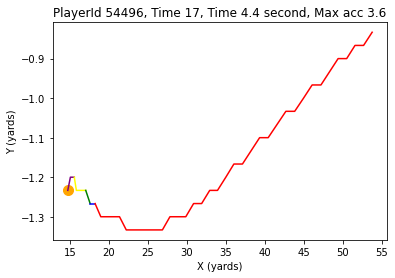

54496 and their best drill trial: 1



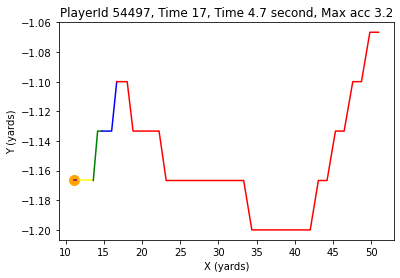

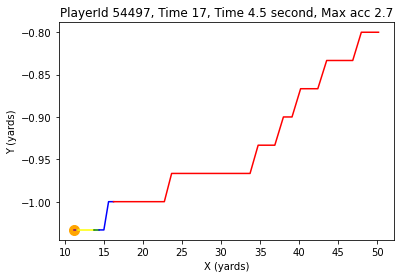

54497 and their best drill trial: 2



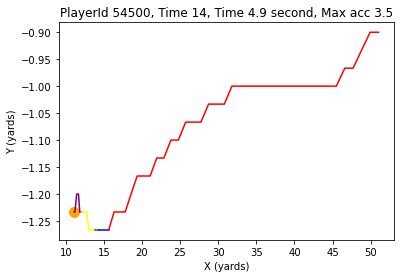

54500 and their best drill trial: 1



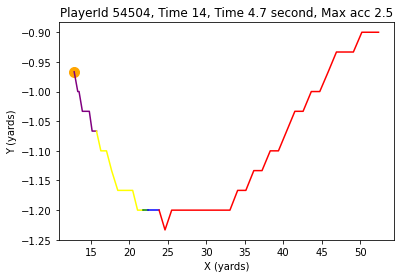

54504 and their best drill trial: 1



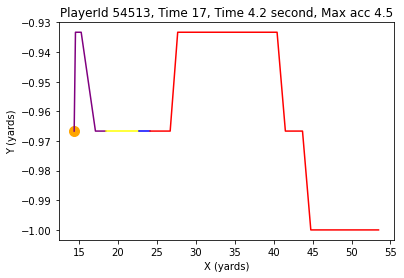

54513 and their best drill trial: 1



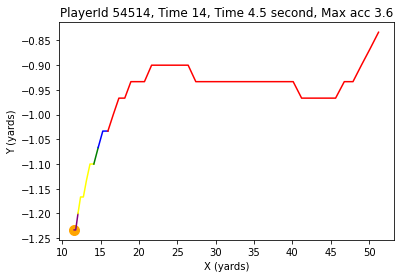

54514 and their best drill trial: 1



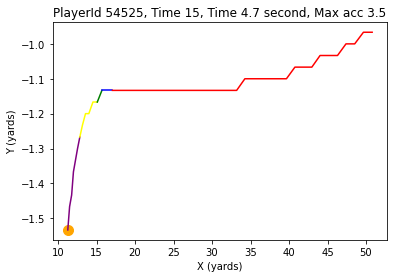

54525 and their best drill trial: 1



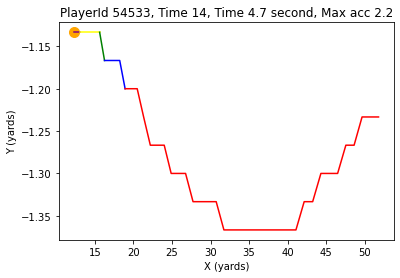

54533 and their best drill trial: 1



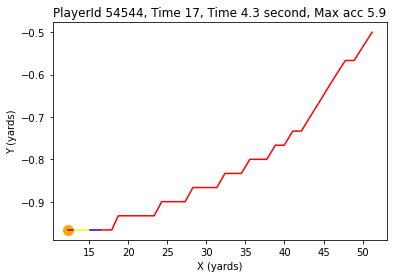

54544 and their best drill trial: 1



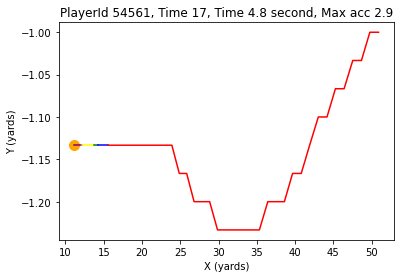

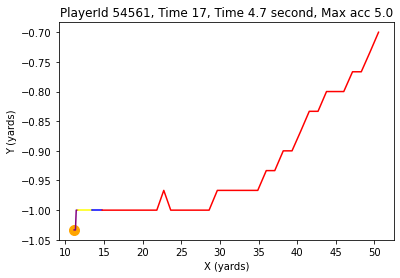

54561 and their best drill trial: 2



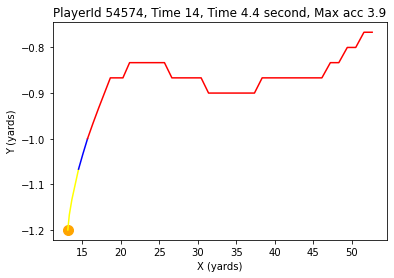

54574 and their best drill trial: 1



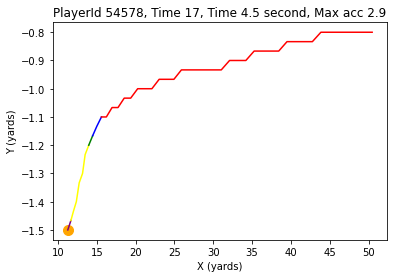

54578 and their best drill trial: 1



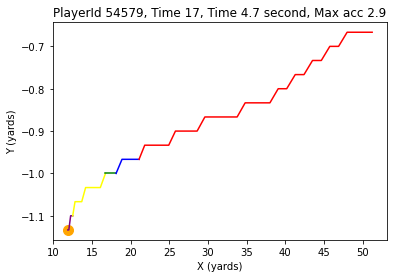

54579 and their best drill trial: 1



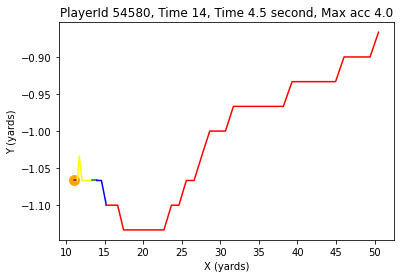

54580 and their best drill trial: 1



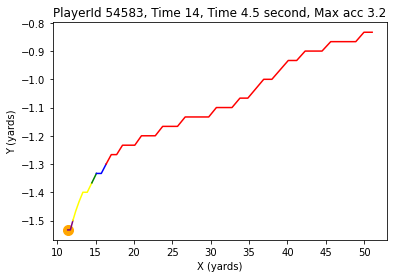

54583 and their best drill trial: 1



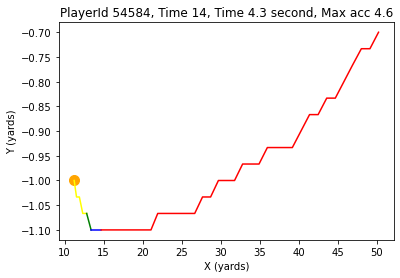

54584 and their best drill trial: 1



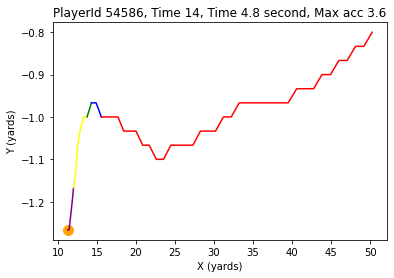

54586 and their best drill trial: 1



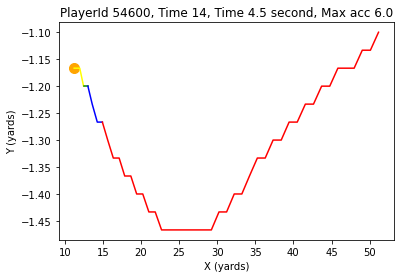

54600 and their best drill trial: 1



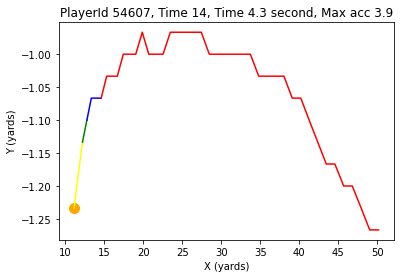

54607 and their best drill trial: 1



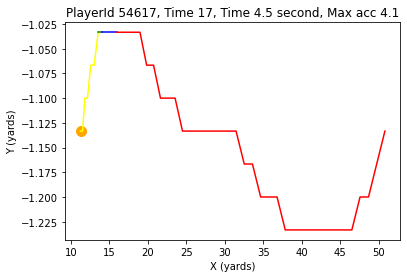

54617 and their best drill trial: 1



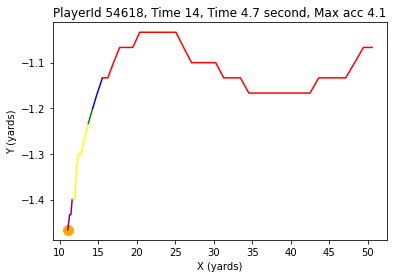

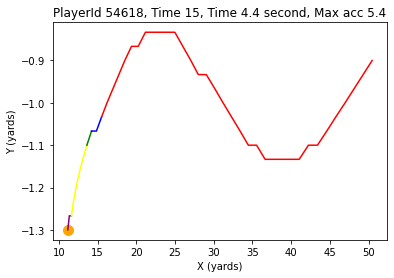

54618 and their best drill trial: 2



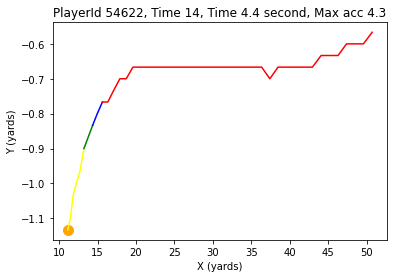

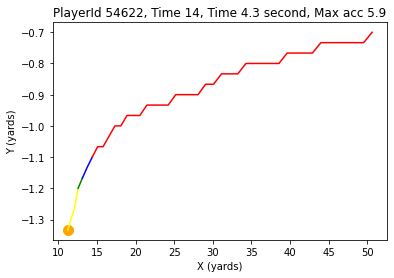

54622 and their best drill trial: 2



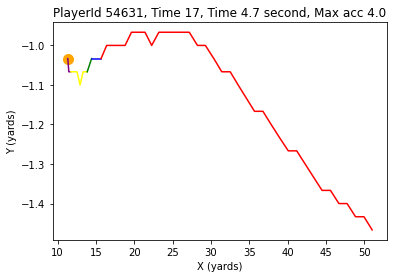

54631 and their best drill trial: 1



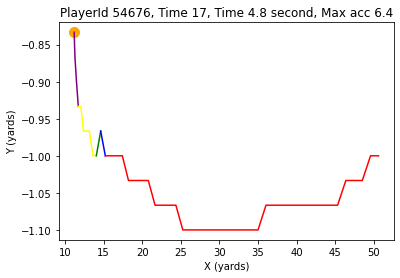

54676 and their best drill trial: 1



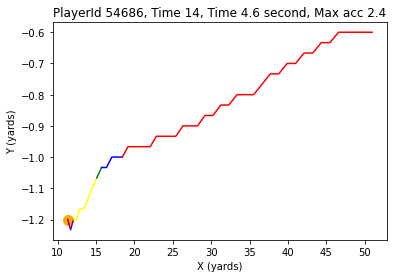

54686 and their best drill trial: 1



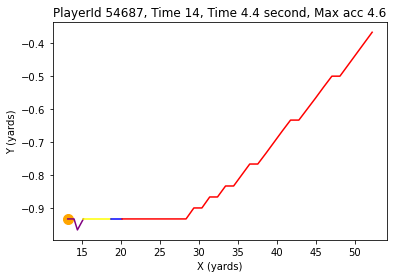

54687 and their best drill trial: 1



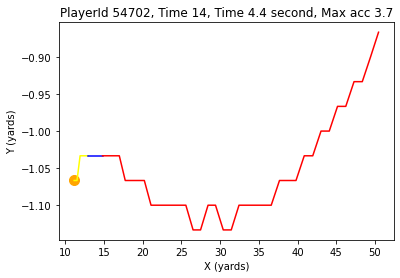

54702 and their best drill trial: 1



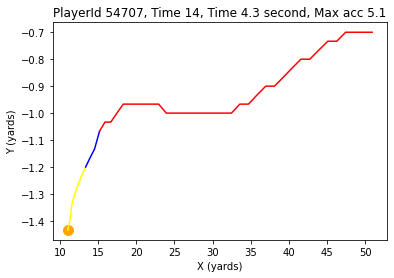

54707 and their best drill trial: 1



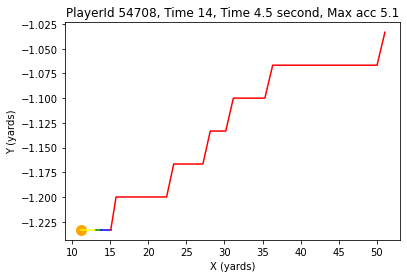

54708 and their best drill trial: 1



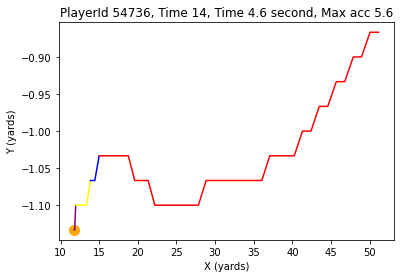

54736 and their best drill trial: 1



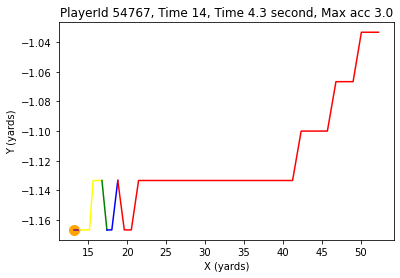

54767 and their best drill trial: 1



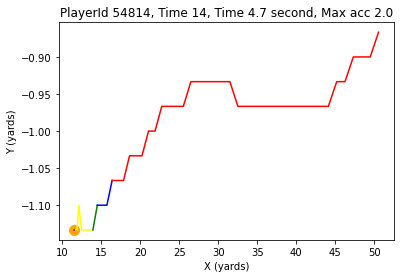

54814 and their best drill trial: 1



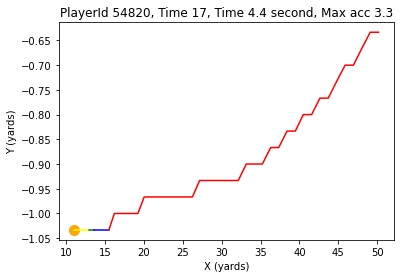

54820 and their best drill trial: 1



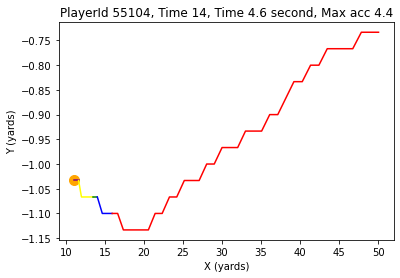

55104 and their best drill trial: 1



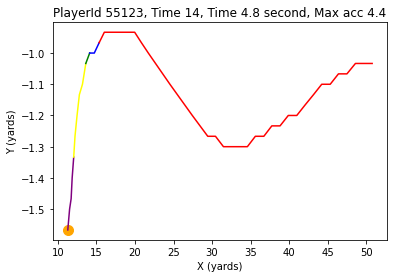

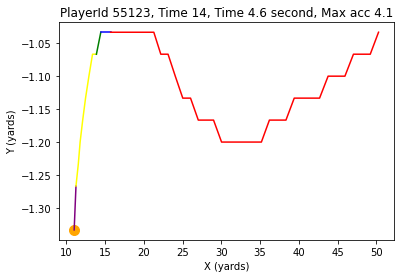

55123 and their best drill trial: 2



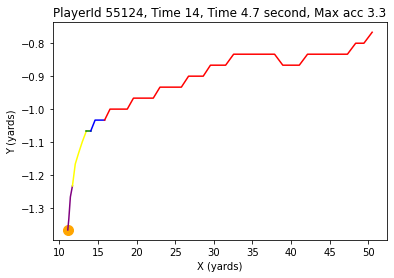

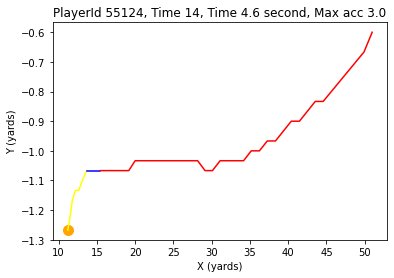

55124 and their best drill trial: 2



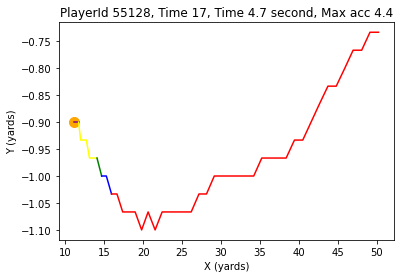

55128 and their best drill trial: 1



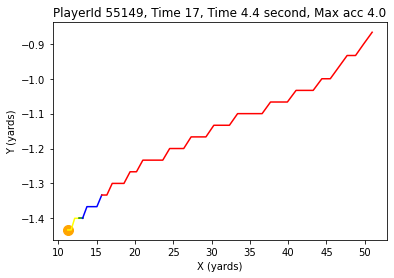

55149 and their best drill trial: 1



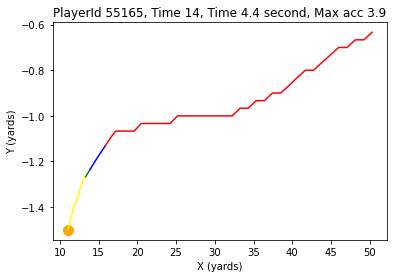

55165 and their best drill trial: 1



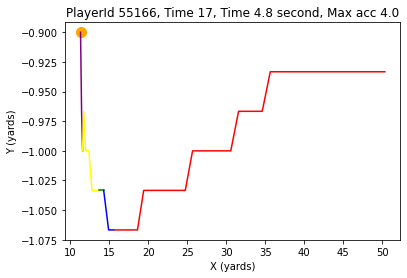

55166 and their best drill trial: 1



In [ ]:
players = tracking_df_db['playerId'].drop_duplicates().tolist()
combined = pd.DataFrame(columns =['playerId', 'timeStamp', 'posX', 'posY', 'velX','velY', 'accX', 'accY', 'acc','vel','Group', 'position','totalTime','drill','trial'])
i = 0
for player in players:
    i +=1
    player_df = forty_finder_new(tracking_df_db, player)
    print(f"{player} and their best drill trial: {player_df.trial.iloc[0]}")
    print("")
    combined = combined.append(player_df)

In [ ]:
combined.to_csv('combinedFortyDB.csv')

# Locating Shuttle

In [ ]:
def shuttle_finder(df,playerId):
    #acceleration and velocity w/o x & y
    df['acc'] = pow(pow(df.accX,2) + pow(df.accY,2),0.5)
    df['vel'] = pow(pow(df.velX,2) + pow(df.velY,2),0.5)
    min_acc_threshold = 1
    time_threshold = 0.2
    vel_threshold = 1
    min_time = 3.0
    max_time = 10.0
    #total_distance      = 0
    #total_distance_x    = 0
    #total_distance_y    = 0
    move_array          = []
    momentary_stop      = 0
    momentary_stop_threshold = 7
    visited_right = 0
    visited_left = 0
    threshy = 0
    stopper = 0
    #curr_player = player_df.iloc[12].playerId
    #curr_player = 
    curr_player_df = df.loc[df.playerId == playerId]
    #curr_player_df = curr_player_df.loc[curr_player_df.timeStamp > shuttle_timestamp_start]
    #curr_player_df = curr_player_df.loc[curr_player_df.timeStamp < shuttle_timestamp_end]
    curr_player_df = curr_player_df.loc[curr_player_df.posX > 89] #89
    curr_player_df = curr_player_df.loc[curr_player_df.posX < 99]
    curr_player_df = curr_player_df.loc[curr_player_df.posY < 18] #18
    curr_player_df = curr_player_df.loc[curr_player_df.posY > 15]
    for i in range(len(curr_player_df)):
        curr_df = curr_player_df.iloc[i]
        if math.fabs(curr_df.accX) >= min_acc_threshold or math.fabs(curr_df.velX) >= vel_threshold or (len(move_array) > 0 and momentary_stop < momentary_stop_threshold):
            if len(move_array) == 0:
                momentary_stop      = 0
                start = curr_df
                move_array.append(curr_df)
                #print(curr_df.velX)


            else:
                if math.fabs(curr_df.accX) < min_acc_threshold:
                    momentary_stop += 1
                    move_array.append(curr_df)
                    #print(curr_df.velX)

                else:
                    momentary_stop = 0
                    if curr_df.posX > start.posX and visited_right == 0 and visited_left == 0:
                      visited_right = 1
                      move_array.append(curr_df)
                      #print(curr_df.velX)
                    elif curr_df.posX > start.posX and visited_right == 1 and visited_left == 0:
                      move_array.append(curr_df)
                      #print(curr_df.velX)
                    elif curr_df.posX < start.posX and visited_right == 1 and visited_left == 0:
                      visited_left = 1
                      move_array.append(curr_df)
                      #print(curr_df.velX)
                    elif curr_df.posX < start.posX and visited_right == 1 and visited_left == 1:
                      move_array.append(curr_df)
                      #print(curr_df.velX)
                    elif curr_df.posX >= start.posX and visited_right == 1 and visited_left == 1:
                      break
                    
                    
                    #move_array.append(curr_df)

            
              
            #if curr_df.posX > start.posX and stopper == 0:
                #threshy +=1
                #move_array.append(curr_df)
            #if threshy > 1  and curr_df.posX < start.posX:
                #move_array.append(curr_df)
                #stopper +=1
            #if stopper > 0 and curr_df.posX > start.posX:
            #move_array.append(curr_df)
                #stopper = -1 

      #print("not else")
        elif (len(move_array) > 0):
            total_time = (len(move_array) - 1) / 10
            if (total_time > min_time and total_time < max_time):
                final_df = pd.DataFrame(move_array, index =[i for i in range(len(move_array))],columns =['playerId', 'timeStamp', 'posX', 'posY', 'velX','velY', 'accX', 'accY', 'acc','vel'])
                plot_path(move_array,total_time)
                #print(len(move_array))
            move_array = []
    if (len(move_array)):
        total_time = (len(move_array) - 1) / 10
        if total_time < max_time and total_time > min_time:
            final_df = pd.DataFrame(move_array, index =[i for i in range(len(move_array))],columns =['playerId', 'timeStamp', 'posX', 'posY', 'velX','velY', 'accX', 'accY', 'acc','vel'])
            plot_path(move_array,total_time)
            #print(len(move_array))

    print(f"length of move array {len(move_array)}")
    #final_df = pd.DataFrame(move_array, index =[i for i in range(len(move_array))],columns =['playerId', 'timeStamp', 'posX', 'posY', 'velX','velY', 'accX', 'accY', 'acc','vel'])
    if len(final_df)> 0:    
        for i in range(len(final_df)):
            if i != 0:
                changePos = final_df.posX[i] - final_df.posX[i-1] 
                if changePos > .15:
                    cut = i
                    break
        new_df = final_df.iloc[cut:,:]
        return new_df
    
shuttle_finder(tracking_df_new,54613)

length of move array 29
37
0.23333333333330586


playerId            timeStamp       posX       posY      velX      velY  \
1      54613  2022-03-03 19:54:17  97.333333  15.300000  2.636667  1.426667   
2      54613  2022-03-03 19:54:17  97.600000  15.433333  2.690000  1.456667   
3      54613  2022-03-03 19:54:17  97.866667  15.566667  2.723333  1.480000   
4      54613  2022-03-03 19:54:17  98.133333  15.700000  2.750000  1.506667   
5      54613  2022-03-03 19:54:17  98.433333  15.866667  2.750000  1.513333   
6      54613  2022-03-03 19:54:18  98.700000  16.000000  2.753333  1.523333   
7      54613  2022-03-03 19:54:18  98.966667  16.166667  2.746667  1.530000   
8      54613  2022-03-03 19:55:06  93.066667  17.966667 -1.486667 -0.133333   
9      54613  2022-03-03 19:55:06  92.933333  17.966667 -1.490000 -0.156667   
10     54613  2022-03-03 19:55:06  92.766667  17.933333 -1.503333 -0.176667   
11     54613  2022-03-03 19:55:06  92.633333  17.933333 -1.523333 -0.186667   
12     54613  2022-03-03 19:55:06  92.500000  17.900000 -1.543333 -0.193333   
13     54613  2022-03-03 19:55:06  92.333333  17.866667 -1.550000 -0.190000   
14     54613  2022-03-03 19:55:06  92.166667  17.866667 -1.543333 -0.176667   
15     54613  2022-03-03 19:55:06  92.033333  17.833333 -1.536667 -0.163333   
16     54613  2022-03-03 19:55:06  91.866667  17.833333 -1.533333 -0.133333   
17     54613  2022-03-03 19:55:07  91.733333  17.833333 -1.526667 -0.106667   
18     54613  2022-03-03 19:55:07  91.566667  17.800000 -1.526667 -0.073333   
19     54613  2022-03-03 19:55:07  91.433333  17.800000 -1.523333 -0.050000   
20     54613  2022-03-03 19:55:07  91.266667  17.800000 -1.523333 -0.033333   
21     54613  2022-03-03 19:55:07  91.133333  17.800000 -1.513333 -0.020000   
22     54613  2022-03-03 19:55:07  90.966667  17.800000 -1.500000 -0.010000   
23     54613  2022-03-03 19:55:07  90.833333  17.800000 -1.486667  0.000000   
24     54613  2022-03-03 19:55:07  90.666667  17.800000 -1.463333  0.000000   
25     54613  2022-03-03 19:55:07  90.533333  17.800000 -1.440000 -0.003333   
26     54613  2022-03-03 19:55:07  90.400000  17.800000 -1.420000 -0.013333   
27     54613  2022-03-03 19:55:08  90.266667  17.800000 -1.410000 -0.026667   
28     54613  2022-03-03 19:55:08  90.133333  17.800000 -1.403333 -0.036667   
29     54613  2022-03-03 19:55:08  90.000000  17.800000 -1.406667 -0.050000   
30     54613  2022-03-03 19:55:08  89.833333  17.800000 -1.406667 -0.060000   
31     54613  2022-03-03 19:55:08  89.700000  17.766667 -1.400000 -0.056667   
32     54613  2022-03-03 19:55:08  89.566667  17.766667 -1.390000 -0.063333   
33     54613  2022-03-03 19:55:08  89.433333  17.766667 -1.383333 -0.056667   
34     54613  2022-03-03 19:55:08  89.300000  17.766667 -1.370000 -0.050000   
35     54613  2022-03-03 19:55:08  89.166667  17.766667 -1.360000 -0.036667   
36     54613  2022-03-03 19:55:08  89.033333  17.733333 -1.350000 -0.020000   

        accX      accY       acc       vel  
1   0.373333  0.020000  0.373869  2.997897  
2   0.290000  0.086667  0.302673  3.059081  
3   0.200000  0.106667  0.226667  3.099507  
4   0.043333  0.090000  0.099889  3.135689  
5  -0.120000  0.000000  0.120000  3.138898  
6  -0.120000  0.016667  0.121152  3.146647  
7  -0.176667  0.013333  0.177169  3.144054  
8   0.020000 -0.236667  0.237510  1.492634  
9  -0.096667 -0.273333  0.289923  1.498214  
10 -0.076667 -0.213333  0.226691  1.513678  
11 -0.093333 -0.126667  0.157339  1.534728  
12 -0.053333 -0.060000  0.080277  1.555396  
13  0.006667  0.026667  0.027487  1.561602  
14  0.086667  0.123333  0.150739  1.553412  
15  0.123333  0.190000  0.226520  1.545323  
16  0.110000  0.280000  0.300832  1.539120  
17  0.080000  0.323333  0.333083  1.530388  
18  0.066667  0.333333  0.339935  1.528427  
19  0.066667  0.270000  0.278109  1.524154  
20  0.100000  0.183333  0.208833  1.523698  
21  0.146667  0.113333  0.185353  1.513465  
22  0.190000  0.063333  0.200278  1.500033  
23  0.210000  0.033333  0.212629  1.486667  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


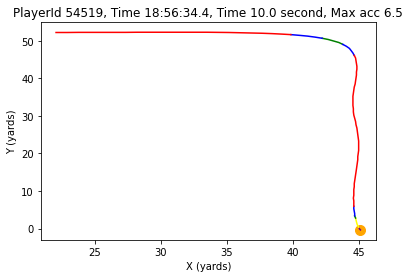

playerId                    timeStamp       posX       posY      velX  \
0      54519  2022-03-03 18:56:34.4000000  45.133333  -0.366667 -0.276667   
1      54519  2022-03-03 18:56:34.5000000  45.100000  -0.233333 -0.326667   
2      54519  2022-03-03 18:56:34.6000000  45.066667  -0.100000 -0.370000   
3      54519  2022-03-03 18:56:34.7000000  45.033333   0.100000 -0.390000   
4      54519  2022-03-03 18:56:34.8000000  45.000000   0.333333 -0.410000   
..       ...                          ...        ...        ...       ...   
95     54519  2022-03-03 18:56:43.9000000  25.566667  52.233333 -8.956667   
96     54519  2022-03-03 18:56:44.0000000  24.666667  52.233333 -8.903333   
97     54519  2022-03-03 18:56:44.1000000  23.800000  52.233333 -8.813333   
98     54519  2022-03-03 18:56:44.2000000  22.900000  52.200000 -8.716667   
99     54519  2022-03-03 18:56:44.3000000  22.066667  52.200000 -8.600000   

        velY      accX      accY       acc       vel  
0   1.220000 -0.543333  1.990000  2.062841  1.250977  
1   1.463333 -0.500000  2.486667  2.536437  1.499352  
2   1.903333 -0.433333  3.893333  3.917374  1.938963  
3   2.333333 -0.246667  4.666667  4.673181  2.365702  
4   2.873333 -0.146667  4.640000  4.642317  2.902438  
..       ...       ...       ...       ...       ...  
95 -0.066667  0.366667  0.133333  0.390157  8.956915  
96 -0.056667  0.910000  0.136667  0.920205  8.903514  
97 -0.036667  1.163333  0.180000  1.177176  8.813410  
98 -0.006667  1.403333  0.223333  1.420993  8.716669  
99  0.010000  1.560000  0.203333  1.573196  8.600006  

[100 rows x 10 columns]

In [ ]:
def find_gauntlet_up(df, curr_playerId):
  df = df.loc[df.playerId == curr_playerId]
  #print(player_df.iloc[j].playerId)
  df['acc'] = pow(pow(df.accX,2) + pow(df.accY,2),0.5)
  df['vel'] = pow(pow(df.velX,2) + pow(df.velY,2),0.5)
  min_acc_threshold = 2
  time_threshold = 1
  vel_threshold = 1
  min_time = 6
  max_time = 40
  total_distance      = 0
  total_distance_x    = 0
  total_distance_y    = 0
  move_array          = []
  momentary_stop      = 0
  momentary_stop_threshold = 50
  total_time = 0
  stopper = 0
  curr_player_df = df.loc[df.timeStamp > '2022-03-03 18:30:00.0000000']
  curr_player_df = curr_player_df.loc[curr_player_df.timeStamp < '2022-03-03 19:10:00.0000000']
  curr_player_df = curr_player_df.loc[curr_player_df.posX > 15]
  curr_player_df = curr_player_df.loc[curr_player_df.posX < 60]
  curr_player_df = curr_player_df.loc[curr_player_df.posY < 55]
  df = curr_player_df.loc[curr_player_df.posY > -2]
  final_df = pd.DataFrame(columns = ['playerId', 'timeStamp', 'posX', 'posY', 'velX','velY', 'accX', 'accY', 'acc','vel'])
  for i in range(len(df)):
    if i == 0:
        previous_df = df.iloc[i]
    curr_df = df.iloc[i]
    prev_df = df.iloc[i-1]
    if curr_df.acc >= min_acc_threshold or (len(move_array) > 0 and momentary_stop < momentary_stop_threshold and (len(move_array) / 10) <10.0) and (math.fabs(curr_df.posX - prev_df.posX) < 2) and (math.fabs(curr_df.posY - prev_df.posY) < 2) :
      #print(curr_df.posX)
      #if len(move_array) == 0:
            #start = curr_df
      if len(move_array) > 0:
        total_distance_x += math.fabs(curr_df.posX - move_array[-1].posX)
        total_distance_y += math.fabs(curr_df.posY - move_array[-1].posX)
        total_distance += math.fabs(pow(pow(math.fabs(curr_df.posX - move_array[-1].posX),2) + pow(math.fabs(curr_df.posY - move_array[-1].posX),2),0.5)) 
        if curr_df.acc < min_acc_threshold:
          momentary_stop += 1
        else:
          momentary_stop = 0
      else:
        total_distance      = 0
        total_distance_x    = 0
        total_distance_y    = 0
        momentary_stop      = 0
        
      move_array.append(curr_df)
    elif (len(move_array) > 0):
      #print(curr_df.posX)
      total_time = len(move_array) / 10
      start = move_array[0]
      end = move_array[-1]
      if (total_time > min_time) and ( total_time < max_time) and start.posY < 10 and end.posY < 60 and  end.posY > 45:
        #print(start.posX, start.posY)
        final_df = pd.DataFrame(move_array, index =[i for i in range(len(move_array))],columns =['playerId', 'timeStamp', 'posX', 'posY', 'velX','velY', 'accX', 'accY', 'acc','vel'])
        plot_path(move_array,total_time)
      move_array = []
      
  
  if (len(move_array)):
    total_time = len(move_array) / 10
    start = move_array[0]
    #print(total_time, start.posY)
    if (total_time > min_time) and ( total_time < max_time) and start.posY < 10:
      final_df = pd.DataFrame(move_array, index =[i for i in range(len(move_array))],columns =['playerId', 'timeStamp', 'posX', 'posY', 'velX','velY', 'accX', 'accY', 'acc','vel'])
      plot_path(move_array, total_time)
  
  
  return final_df

find_gauntlet_up(tracking_df,54519)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


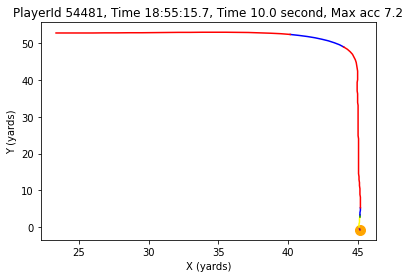

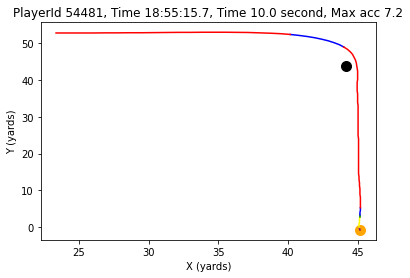

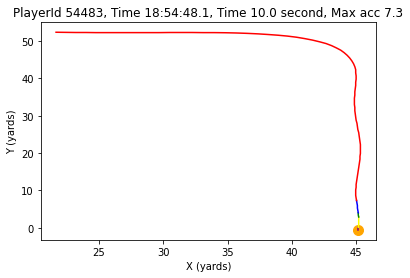

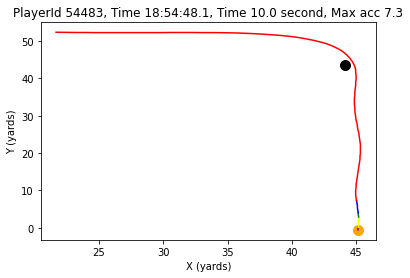

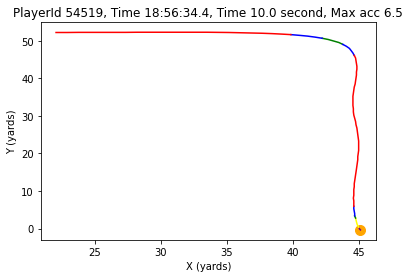

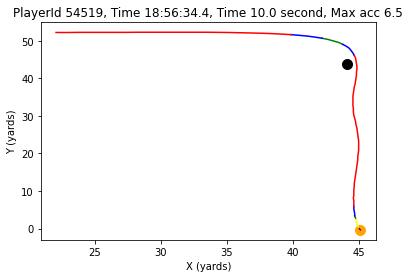

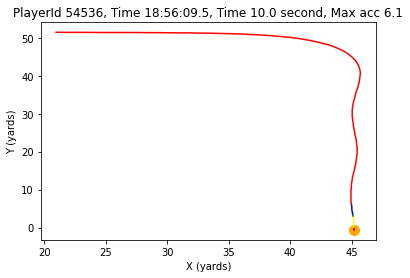

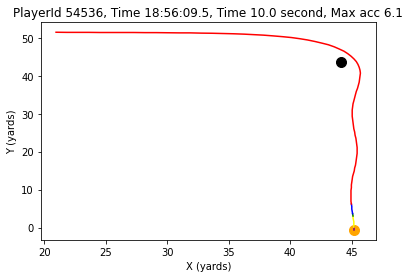

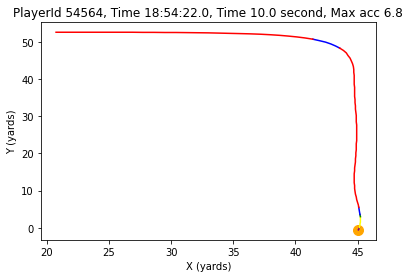

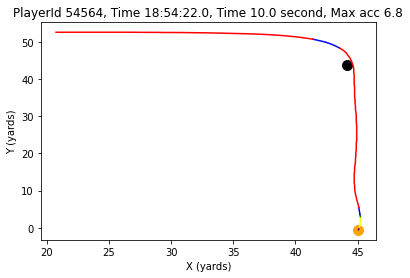

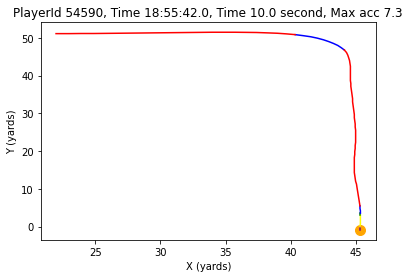

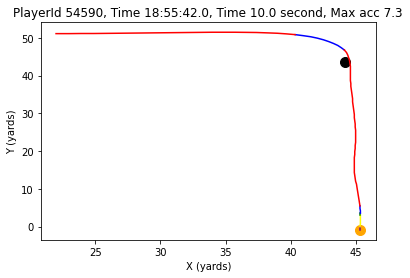

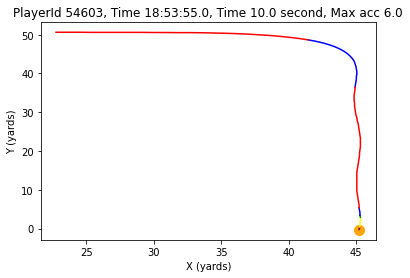

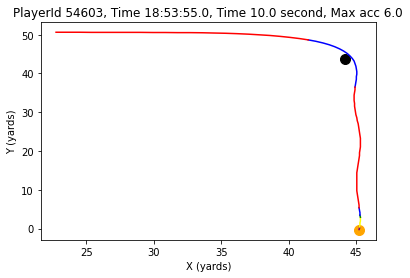

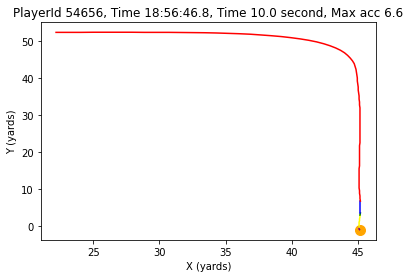

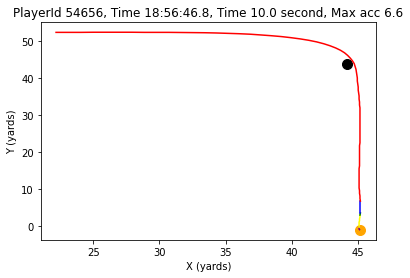

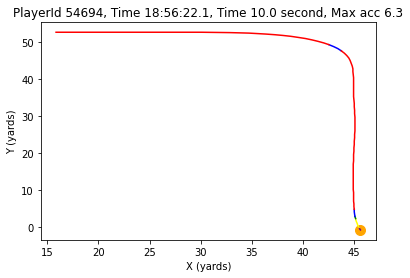

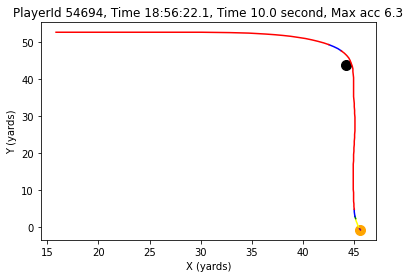

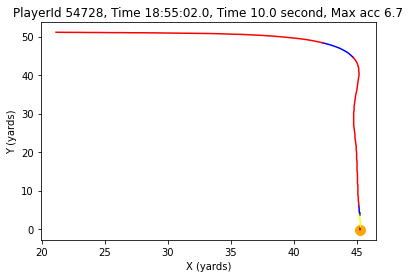

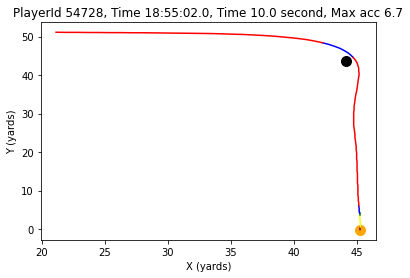

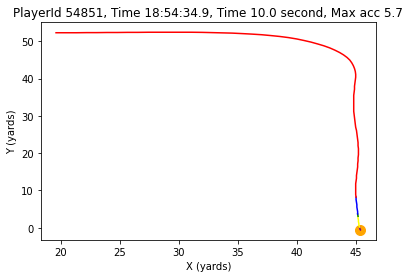

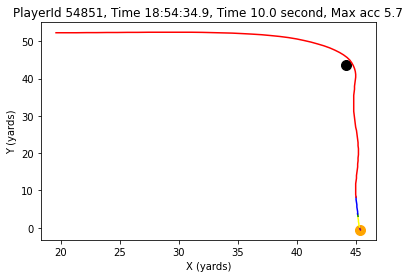

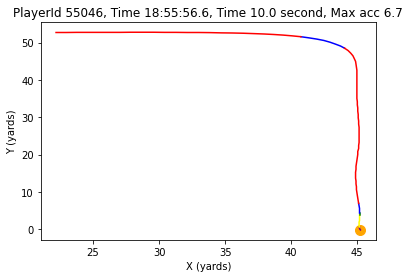

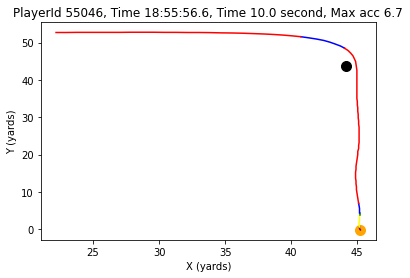

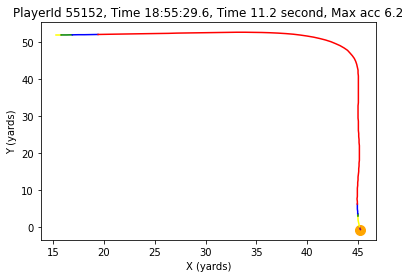

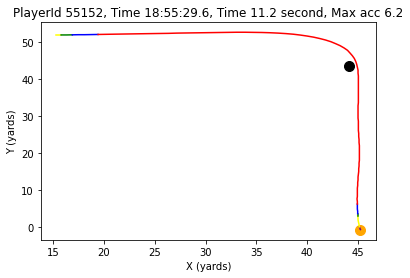

In [ ]:
combined_gauntlet_up = pd.DataFrame(columns = ['playerId', 'timeStamp', 'posX', 'posY', 'velX','velY', 'accX', 'accY', 'acc','vel'])
players = tracking_df.playerId.drop_duplicates().tolist()
for player in players:
    combined_gauntlet_up = combined_gauntlet_up.append(find_gauntlet_up(tracking_df, player))

In [ ]:
def segment_gauntlet(df,playerId):
    df['acc'] = pow(pow(df.accX,2) + pow(df.accY,2),0.5)
    df['vel'] = pow(pow(df.velX,2) + pow(df.velY,2),0.5)
    move_array1 = []
    move_array2 = []
    total_time = 0
    visitedFirstLeg = False
    visitedSecondLeg = False
    curr_player_df = df.loc[df.playerId == playerId]
    for i in range(len(curr_player_df)):
        curr_df = curr_player_df.iloc[i]
        if len(move_array1) == 0:
            start = curr_df
            visitedFirstLeg = True
        if (curr_df.velX < -1 and visitedFirstLeg and visitedSecondLeg == False):
            visitedSecondLeg = True
        if (visitedFirstLeg and visitedSecondLeg == False):
            move_array1.append(curr_df)
        if (visitedFirstLeg and visitedSecondLeg):
            move_array2.append(curr_df)

        #if (visitedFirstLeg and visitedSecondLeg and visitedThirdLeg and visitedFourthLeg):
            #move_array4.append(curr_df)
        
    

    df1 = pd.DataFrame(move_array1, index =[i for i in range(len(move_array1))],columns =['playerId', 'timeStamp', 'posX', 'posY', 'velX','velY', 'accX', 'accY', 'acc','vel'])
    df2 = pd.DataFrame(move_array2, index =[i for i in range(len(move_array2))],columns =['playerId', 'timeStamp', 'posX', 'posY', 'velX','velY', 'accX', 'accY', 'acc','vel'])
    
    return df1, df2

In [ ]:
def find_gauntlet_break(df):
  players = df.playerId.drop_duplicates().tolist()
  points = []
  for player in players:
    pre, post = segment_gauntlet(df, player)
    points.append([post.iloc[0].posX, post.iloc[0].posY])
    points.append([pre.iloc[-1].posX, pre.iloc[-1].posY])
  X = 0
  Y = 0
  for point in points:
    X += int(point[0])
    Y += int(point[1])
  X = X / len(points)
  Y = Y / len(points)
  for player in players:
    move_array = []
    curr_player_df = df.loc[df.playerId == player]
    for i in range(len(curr_player_df)):
      curr_df = curr_player_df.iloc[i]
      move_array.append(curr_df)
    total_time = len(move_array) - 1 / 10
    plot_path_cone(move_array, total_time)
  return X,Y


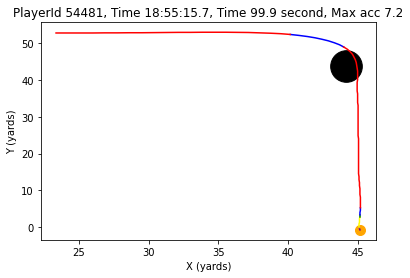

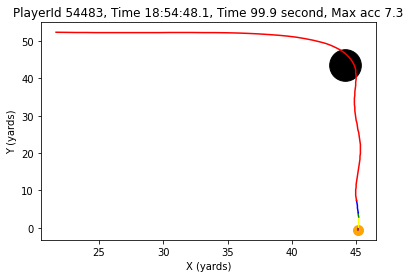

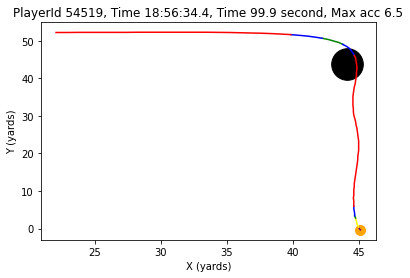

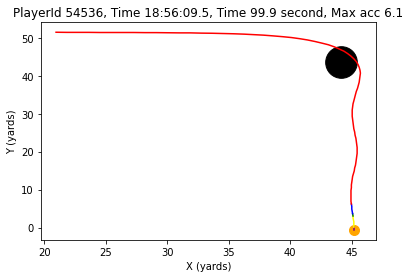

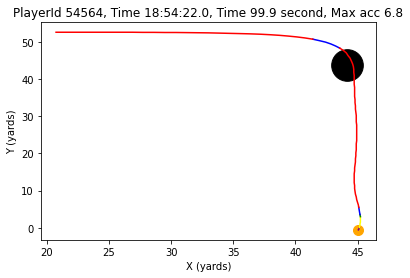

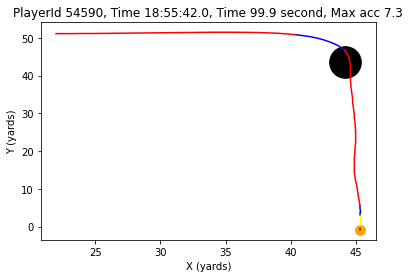

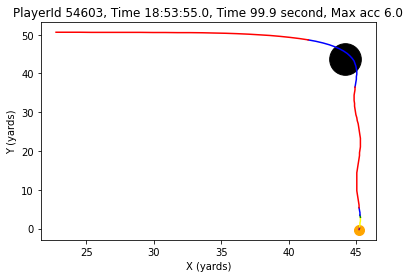

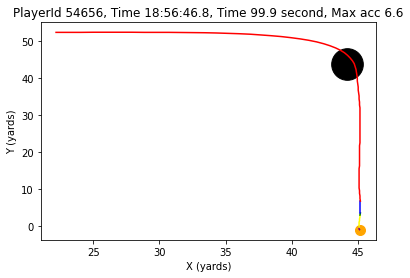

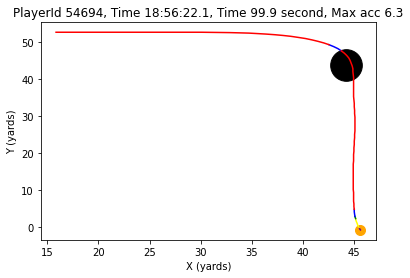

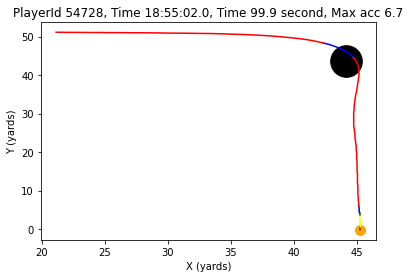

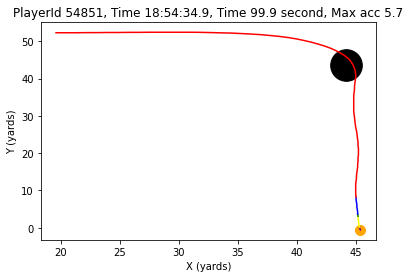

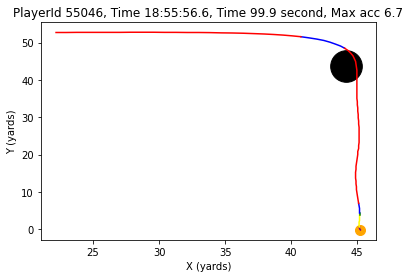

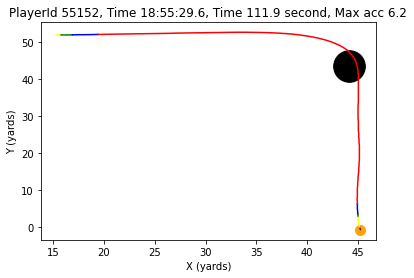

In [ ]:
find_gauntlet_break(combined_gauntlet_up)

In [ ]:
def seperate_route1(df, X, Y):
  move_array1 = []
  move_array2 = []
  move_array3 = []
  visitedPrebreak = False
  visitedBreak = False
  visitedPostbreak = False
  for i in range(len(df)):
    curr_df = df.iloc[i]
    distance = math.pow((math.pow(abs(curr_df.posX - X),2) + math.pow(abs(curr_df.posY - Y),2)), 1/2)
    if i == 0:
      visitedPrebreak = True 
    if (visitedPrebreak and visitedBreak == False and visitedPostbreak == False):
      move_array1.append(curr_df)
    if (visitedPrebreak and visitedBreak == False and visitedPostbreak == False and distance < 10):
      visitedBreak = True
    if (visitedPrebreak and visitedBreak and visitedPostbreak == False):
      move_array2.append(curr_df)
    if (visitedPrebreak and visitedBreak and visitedPostbreak == False and distance > 10):
      visitedPostbreak = True
    if (visitedPrebreak and visitedBreak and visitedPostbreak):
      move_array3.append(curr_df)

  total_time1 = len(move_array1) - 1 / 10
  total_time2 = len(move_array2) - 1 / 10
  total_time3 = len(move_array3) - 1 / 10

  plot_path(move_array1,total_time1)
  plot_path(move_array2,total_time2)
  plot_path(move_array3,total_time3)
  
  df1 = pd.DataFrame(move_array1, index =[i for i in range(len(move_array1))],columns =['playerId', 'timeStamp', 'posX', 'posY', 'velX','velY', 'accX', 'accY', 'acc','vel'])
  df2 = pd.DataFrame(move_array2, index =[i for i in range(len(move_array2))],columns =['playerId', 'timeStamp', 'posX', 'posY', 'velX','velY', 'accX', 'accY', 'acc','vel'])
  df3 = pd.DataFrame(move_array3, index =[i for i in range(len(move_array3))],columns =['playerId', 'timeStamp', 'posX', 'posY', 'velX','velY', 'accX', 'accY', 'acc','vel'])
      
  return df1, df2, df3


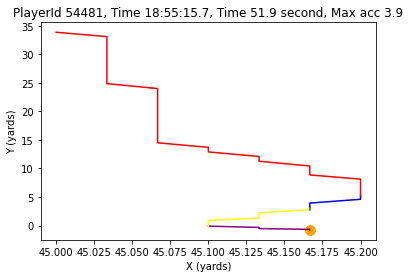

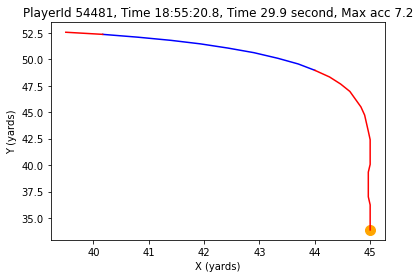

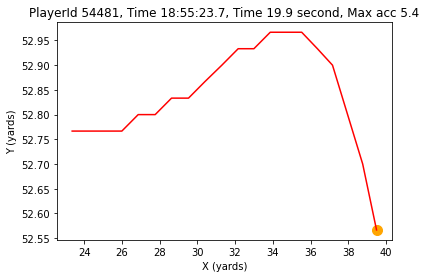

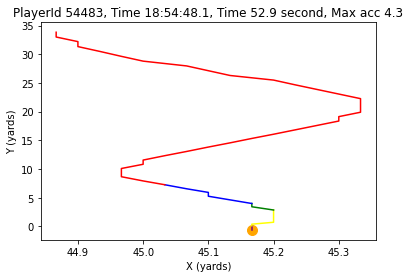

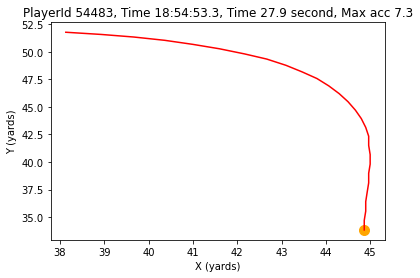

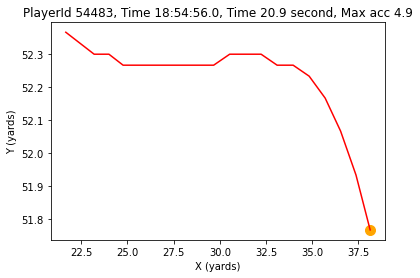

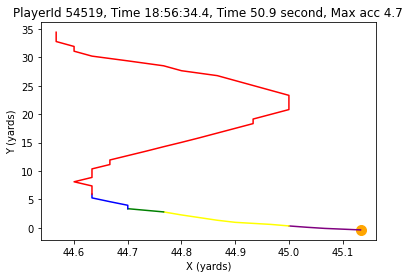

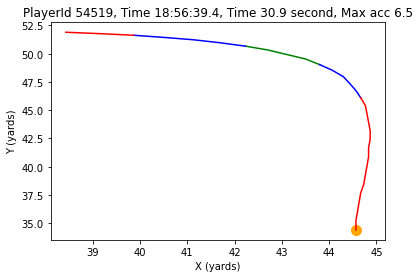

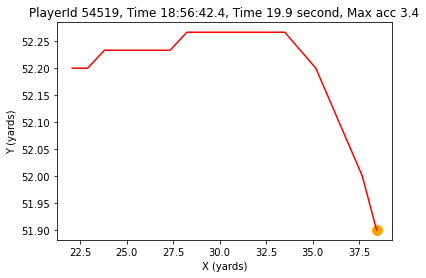

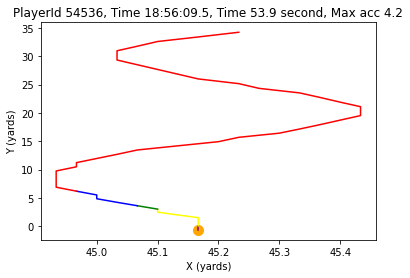

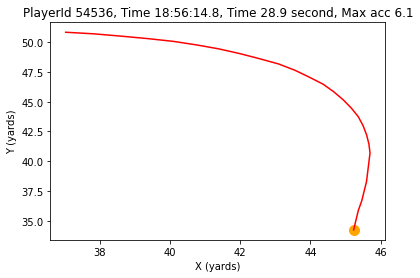

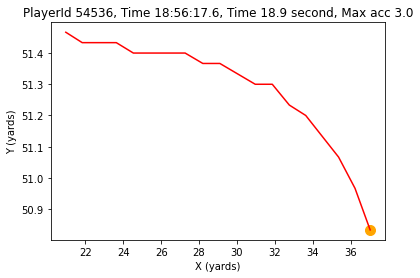

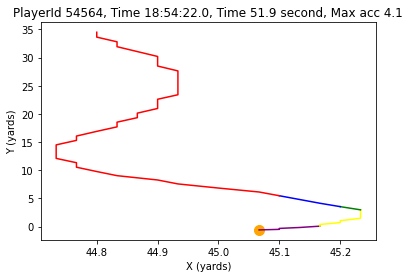

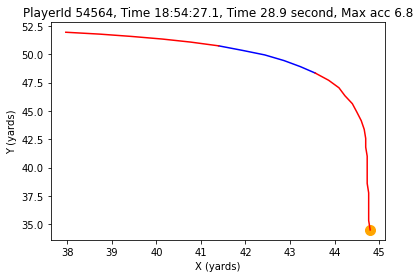

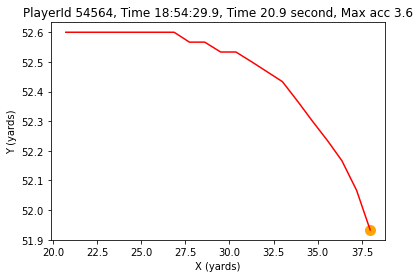

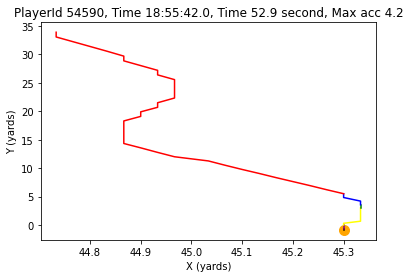

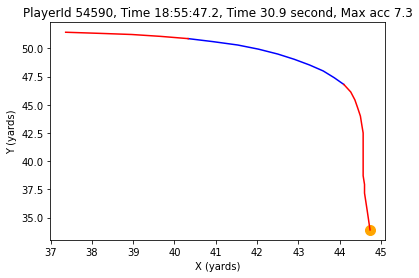

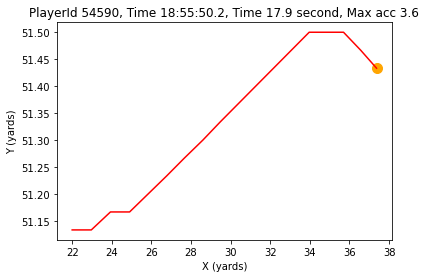

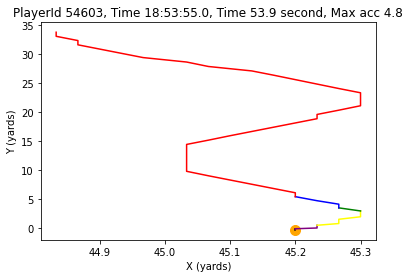

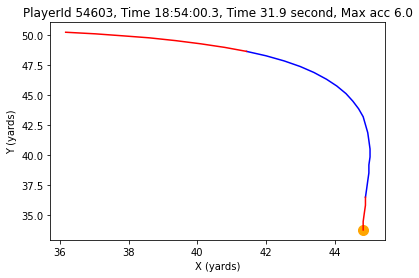

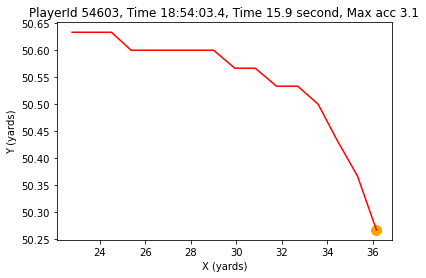

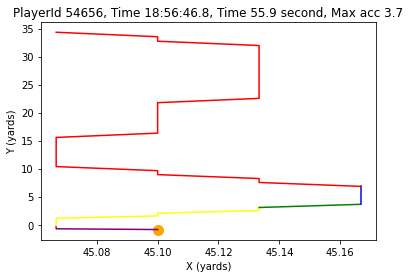

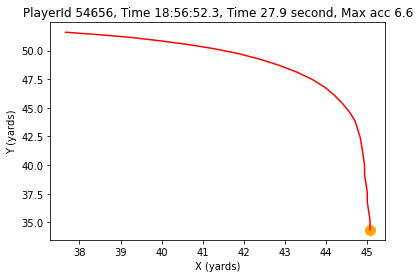

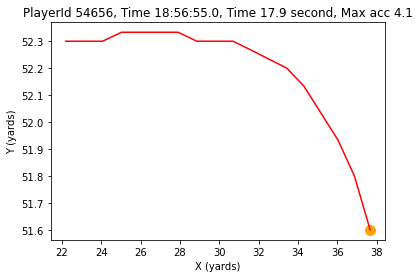

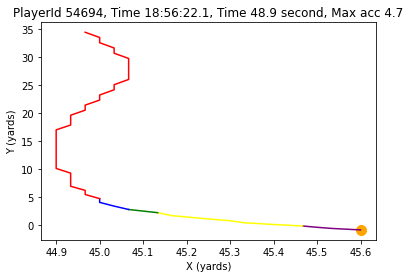

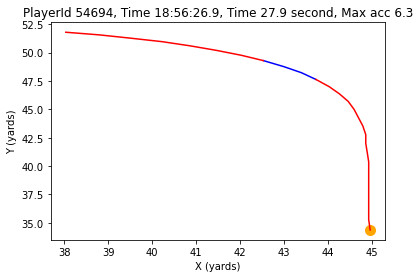

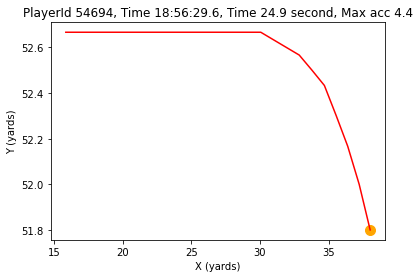

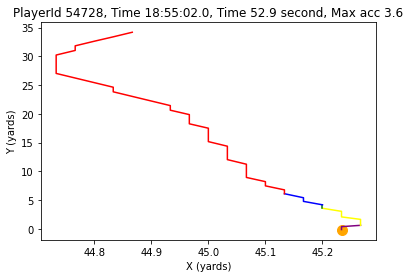

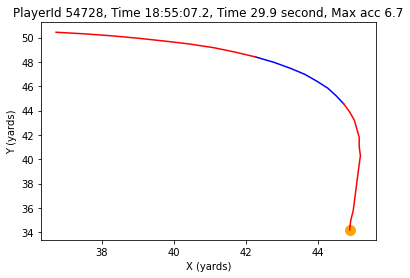

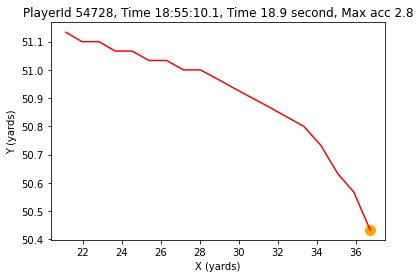

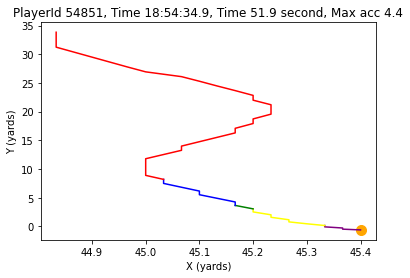

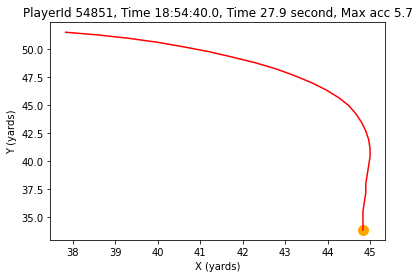

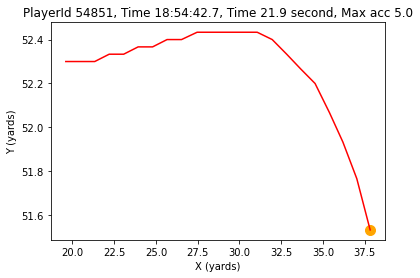

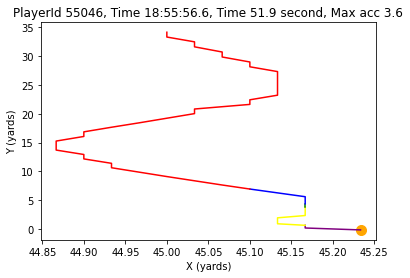

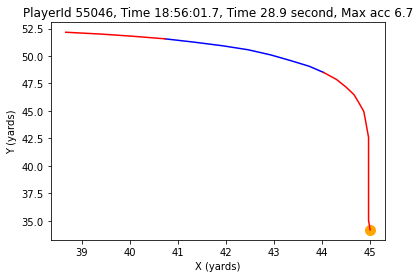

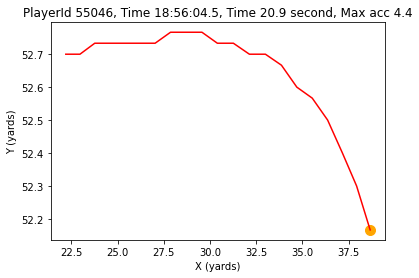

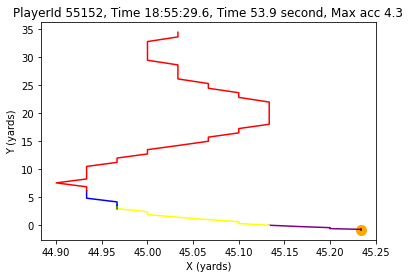

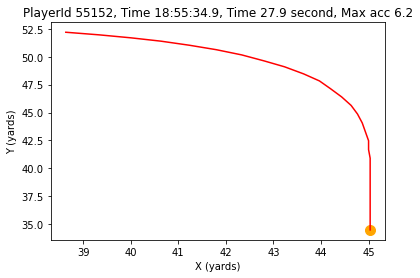

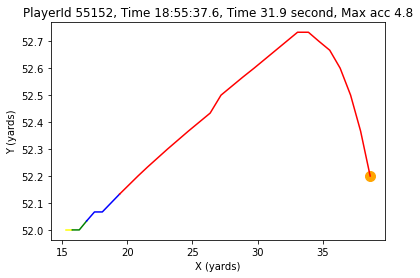

In [ ]:
players = combined_gauntlet_up.playerId.drop_duplicates().tolist()
for player in players:
  curr_player_df = combined_gauntlet_up.loc[combined_gauntlet_up.playerId == player]
  seperate_route1(curr_player_df, X, Y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


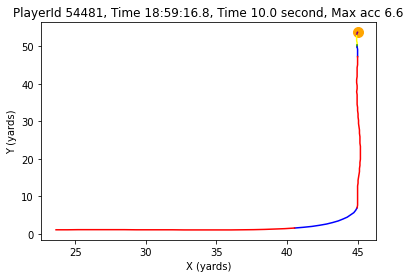

playerId                    timeStamp       posX       posY      velX  \
0      54481  2022-03-03 18:59:16.8000000  45.000000  53.700000 -0.110000   
1      54481  2022-03-03 18:59:16.9000000  44.966667  53.600000 -0.123333   
2      54481  2022-03-03 18:59:17.0000000  44.966667  53.466667 -0.120000   
3      54481  2022-03-03 18:59:17.1000000  44.966667  53.300000 -0.110000   
4      54481  2022-03-03 18:59:17.2000000  44.933333  53.100000 -0.093333   
..       ...                          ...        ...        ...       ...   
95     54481  2022-03-03 18:59:26.3000000  26.800000   1.100000 -8.123333   
96     54481  2022-03-03 18:59:26.4000000  26.000000   1.100000 -8.063333   
97     54481  2022-03-03 18:59:26.5000000  25.200000   1.100000 -7.966667   
98     54481  2022-03-03 18:59:26.6000000  24.433333   1.066667 -7.883333   
99     54481  2022-03-03 18:59:26.7000000  23.633333   1.066667 -7.766667   

        velY      accX      accY       acc       vel  
0  -1.066667 -0.246667 -2.566667  2.578492  1.072324  
1  -1.350000 -0.123333 -2.793333  2.796055  1.355622  
2  -1.676667 -0.016667 -2.823333  2.823383  1.680955  
3  -2.050000  0.140000 -3.676667  3.679331  2.052949  
4  -2.463333  0.193333 -3.606667  3.611845  2.465101  
..       ...       ...       ...       ...       ...  
95  0.000000  1.680000 -0.236667  1.696588  8.123333  
96 -0.026667  0.983333 -0.233333  1.010638  8.063377  
97 -0.050000  0.573333 -0.213333  0.611737  7.966824  
98 -0.063333  0.886667 -0.133333  0.896636  7.883588  
99 -0.050000  1.473333  0.056667  1.474423  7.766828  

[100 rows x 10 columns]

In [ ]:
def find_gauntlet_down(df, curr_playerId):
  df = df.loc[df.playerId == curr_playerId]
  #print(player_df.iloc[j].playerId)
  df['acc'] = pow(pow(df.accX,2) + pow(df.accY,2),0.5)
  df['vel'] = pow(pow(df.velX,2) + pow(df.velY,2),0.5)
  min_acc_threshold = 2
  time_threshold = 1
  vel_threshold = 1
  min_time = 6
  max_time = 40
  total_distance      = 0
  total_distance_x    = 0
  total_distance_y    = 0
  move_array          = []
  momentary_stop      = 0
  momentary_stop_threshold = 50
  total_time = 0
  stopper = 0
  curr_player_df = df.loc[df.timeStamp > '2022-03-03 18:30:00.0000000']
  curr_player_df = curr_player_df.loc[curr_player_df.timeStamp < '2022-03-03 19:10:00.0000000']
  curr_player_df = curr_player_df.loc[curr_player_df.posX > 15]
  curr_player_df = curr_player_df.loc[curr_player_df.posX < 50]
  curr_player_df = curr_player_df.loc[curr_player_df.posY < 65]
  df = curr_player_df.loc[curr_player_df.posY > -2]
  final_df = pd.DataFrame(columns =['playerId', 'timeStamp', 'posX', 'posY', 'velX','velY', 'accX', 'accY', 'acc','vel'])
  for i in range(len(df)):
    if i == 0:
        previous_df = df.iloc[i]
    curr_df = df.iloc[i]
    prev_df = df.iloc[i-1]
    if curr_df.acc >= min_acc_threshold or (len(move_array) > 0 and momentary_stop < momentary_stop_threshold and (len(move_array) / 10) <10.0) and (math.fabs(curr_df.posX - prev_df.posX) < 5) and (math.fabs(curr_df.posY - prev_df.posY) < 5) :
      #print(curr_df.posX)
      #if len(move_array) == 0:
            #start = curr_df
      if len(move_array) > 0:
        total_distance_x += math.fabs(curr_df.posX - move_array[-1].posX)
        total_distance_y += math.fabs(curr_df.posY - move_array[-1].posX)
        total_distance += math.fabs(pow(pow(math.fabs(curr_df.posX - move_array[-1].posX),2) + pow(math.fabs(curr_df.posY - move_array[-1].posX),2),0.5)) 
        if curr_df.acc < min_acc_threshold:
          momentary_stop += 1
        else:
          momentary_stop = 0
      else:
        total_distance      = 0
        total_distance_x    = 0
        total_distance_y    = 0
        momentary_stop      = 0
        
      move_array.append(curr_df)
    elif (len(move_array) > 0):
      #print(curr_df.posX)
      total_time = len(move_array) / 10
      start = move_array[0]
      end = move_array[-1]
      if (total_time > min_time) and ( total_time < max_time) and start.posY > 45 and start.posX > 43 and  start.posX < 48 and end.posY < 7:
        #print(start.posX, start.posY)
        final_df = pd.DataFrame(move_array, index =[i for i in range(len(move_array))],columns =['playerId', 'timeStamp', 'posX', 'posY', 'velX','velY', 'accX', 'accY', 'acc','vel'])
        plot_path(move_array,total_time)
      move_array = []
      
  
  if (len(move_array)):
    total_time = len(move_array) / 10
    start = move_array[0]
    #print(total_time, start.posY)
    if (total_time > min_time) and ( total_time < max_time) and start.posY > 45 and start.posX > 43 and  start.posX < 48 and end.posY < 7:
      final_df = pd.DataFrame(move_array, index =[i for i in range(len(move_array))],columns =['playerId', 'timeStamp', 'posX', 'posY', 'velX','velY', 'accX', 'accY', 'acc','vel'])
      plot_path(move_array, total_time)
  return final_df

find_gauntlet_down(tracking_df,54481)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


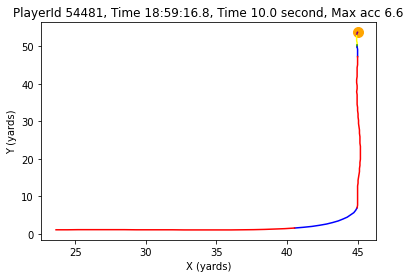

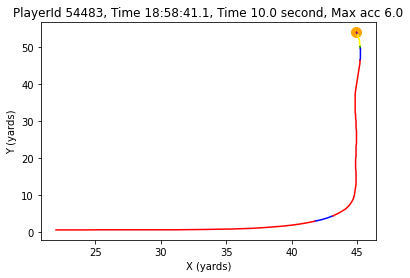

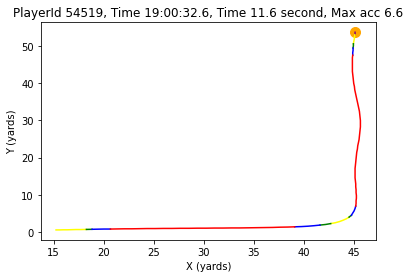

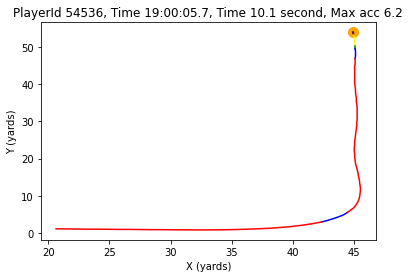

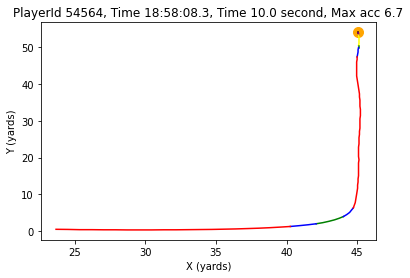

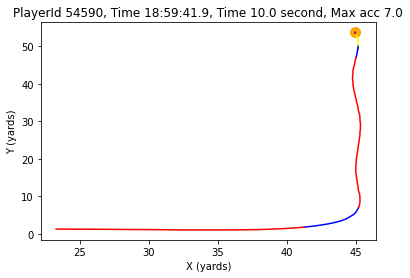

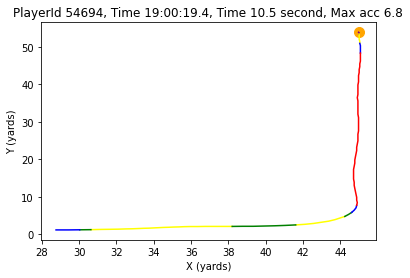

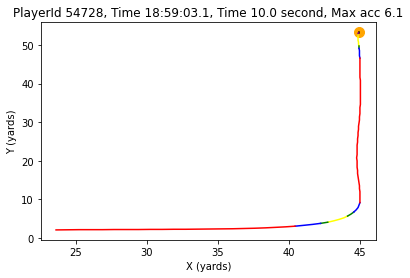

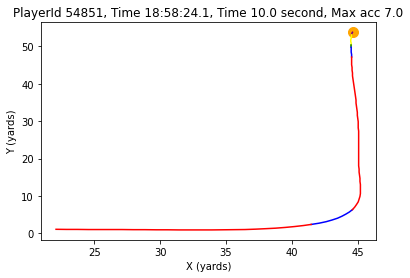

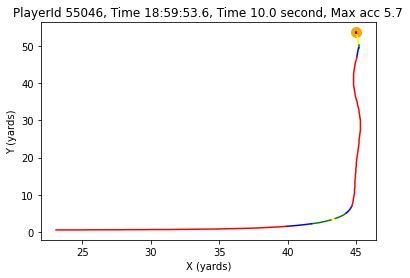

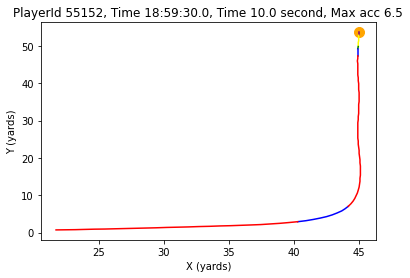

In [ ]:

combined_gauntlet_down = pd.DataFrame(columns = ['playerId', 'timeStamp', 'posX', 'posY', 'velX','velY', 'accX', 'accY', 'acc','vel'])
players = tracking_df.playerId.drop_duplicates().tolist()
for player in players:
    combined_gauntlet_down = combined_gauntlet_down.append(find_gauntlet_down(tracking_df, player))

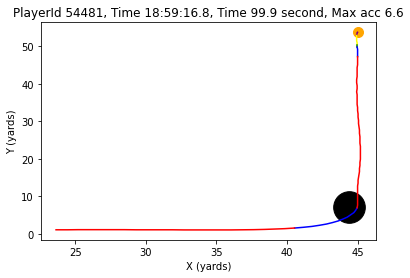

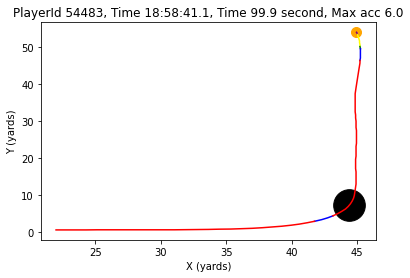

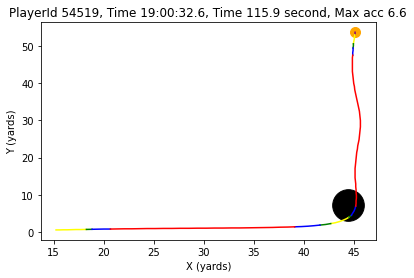

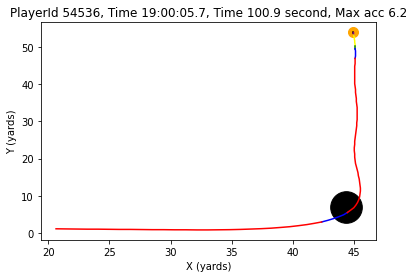

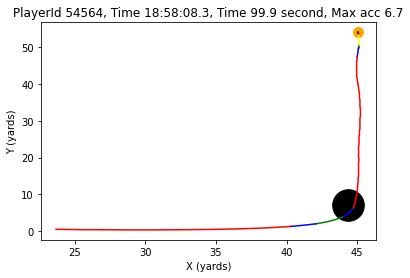

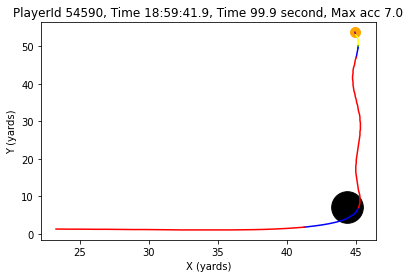

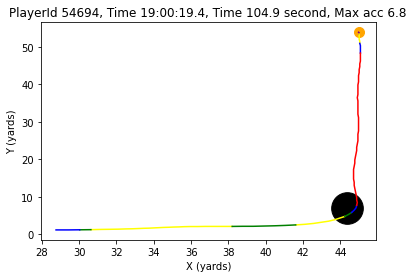

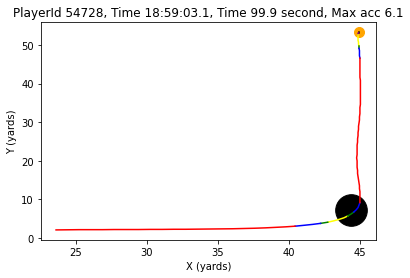

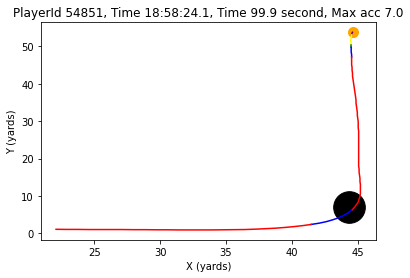

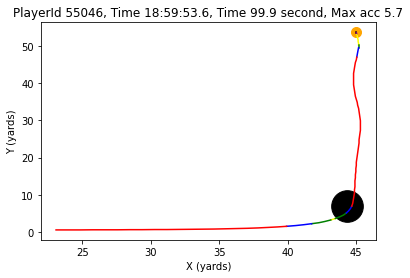

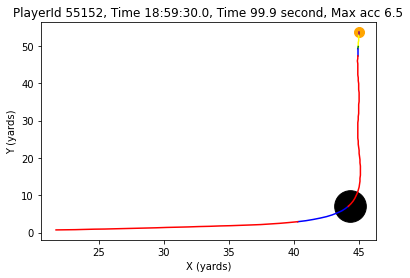

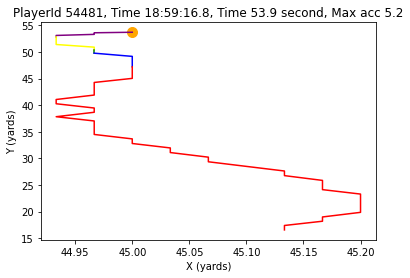

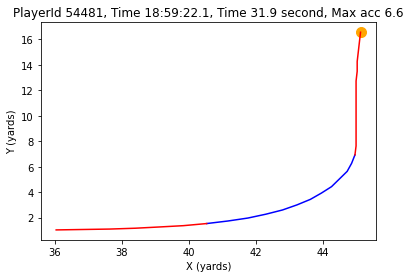

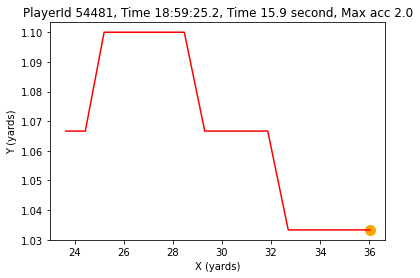

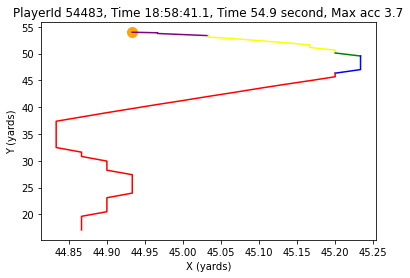

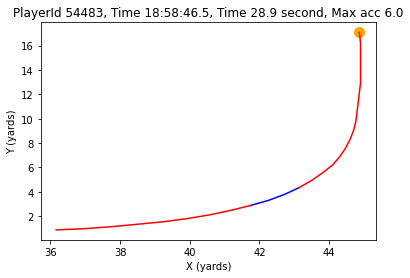

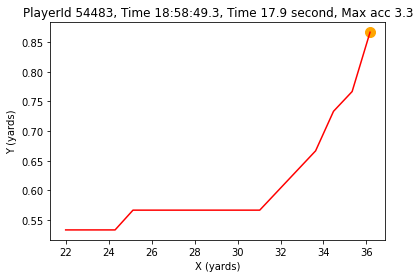

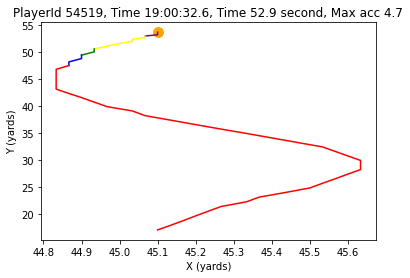

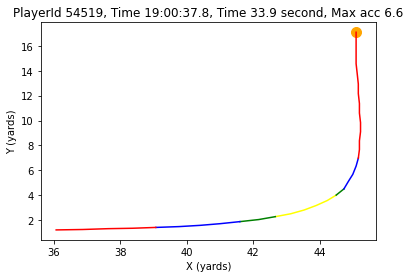

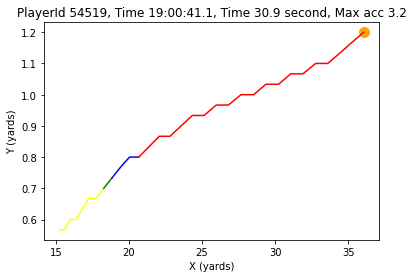

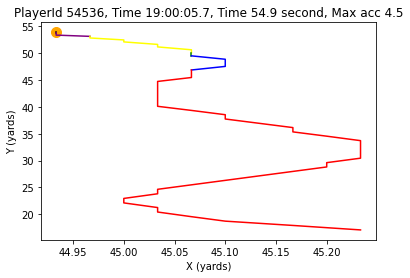

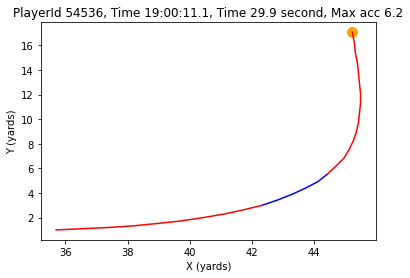

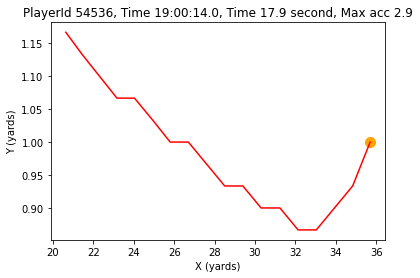

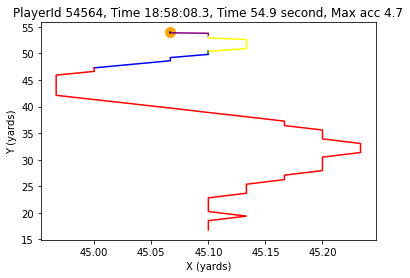

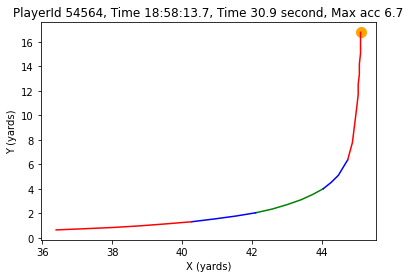

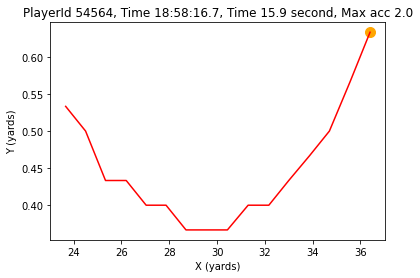

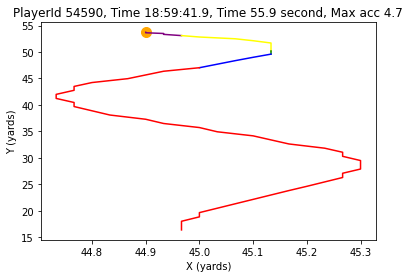

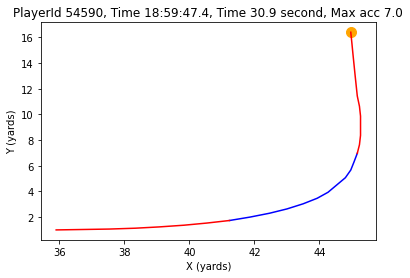

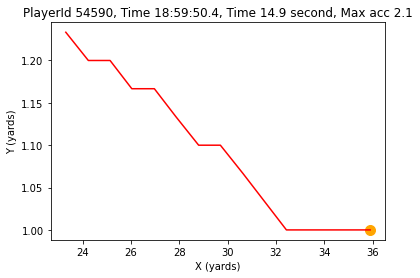

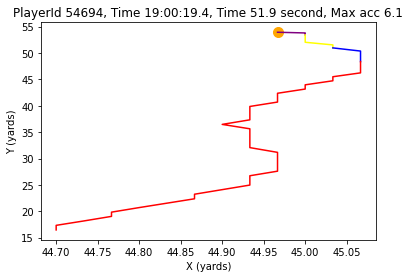

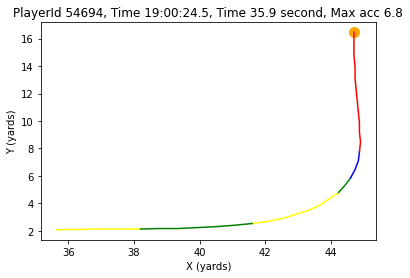

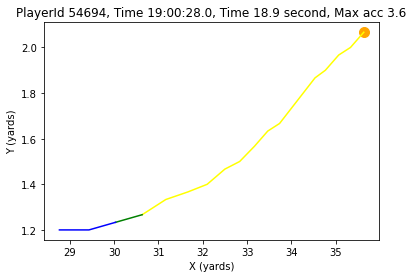

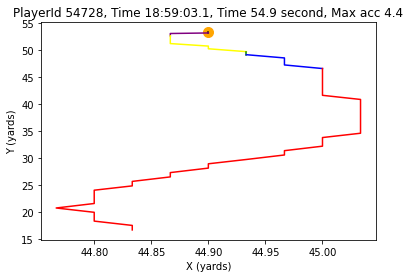

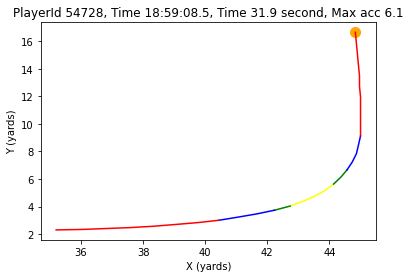

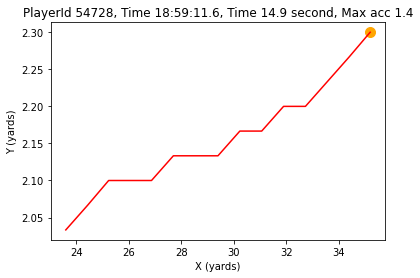

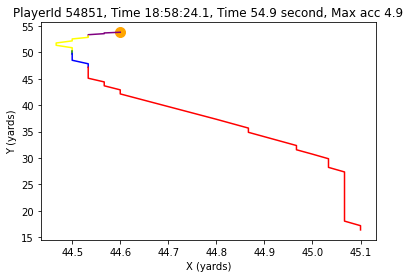

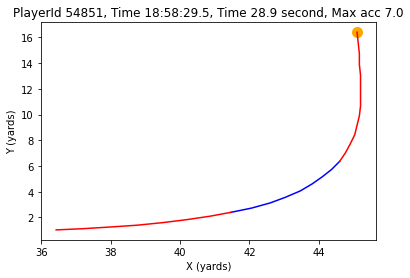

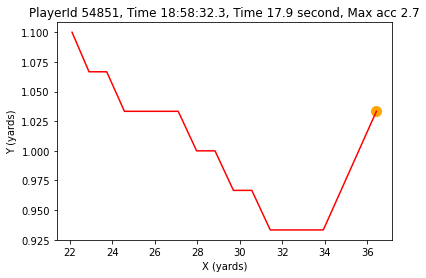

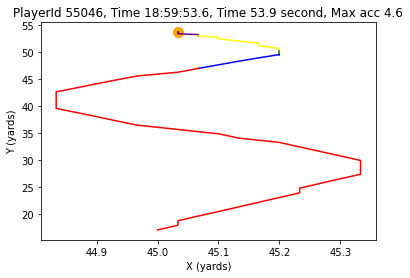

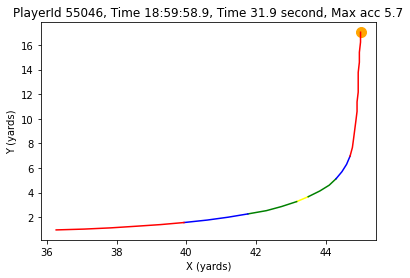

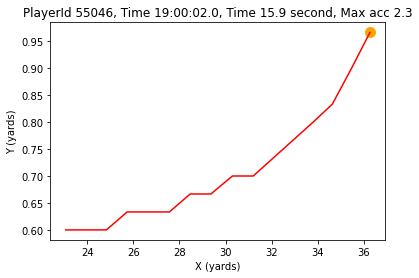

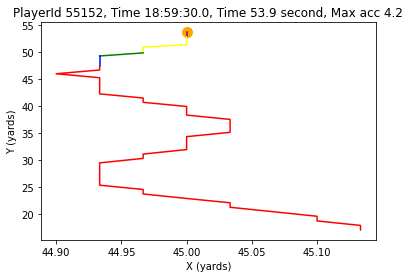

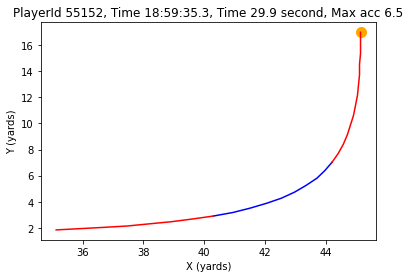

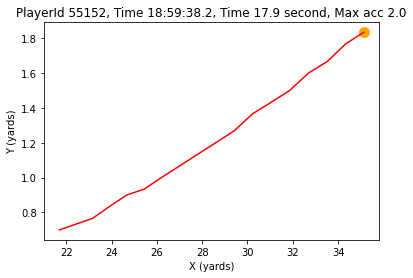

In [ ]:
players = combined_gauntlet_down.playerId.drop_duplicates().tolist()
X, Y = find_gauntlet_break(combined_gauntlet_down)
for player in players:
    curr_player_df = combined_gauntlet_down.loc[combined_gauntlet_down.playerId == player]
    seperate_route1(curr_player_df, X, Y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


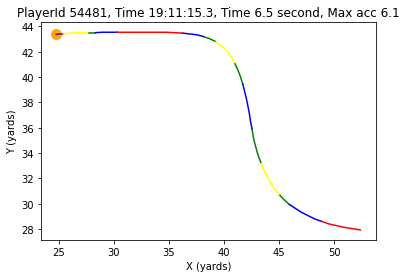

playerId                    timeStamp       posX       posY      velX  \
0      54481  2022-03-03 19:11:15.3000000  24.766667  43.366667  1.103333   
1      54481  2022-03-03 19:11:15.4000000  24.900000  43.366667  1.413333   
2      54481  2022-03-03 19:11:15.5000000  25.033333  43.400000  1.786667   
3      54481  2022-03-03 19:11:15.6000000  25.233333  43.400000  2.210000   
4      54481  2022-03-03 19:11:15.7000000  25.433333  43.400000  2.640000   
..       ...                          ...        ...        ...       ...   
60     54481  2022-03-03 19:11:21.3000000  49.533333  28.400000  6.823333   
61     54481  2022-03-03 19:11:21.4000000  50.233333  28.266667  7.000000   
62     54481  2022-03-03 19:11:21.5000000  50.933333  28.133333  7.153333   
63     54481  2022-03-03 19:11:21.6000000  51.633333  28.033333  7.276667   
64     54481  2022-03-03 19:11:21.7000000  52.366667  27.933333  7.336667   

        velY      accX      accY       acc       vel  
0   0.093333  2.310000 -0.056667  2.310695  1.107274  
1   0.096667  2.666667 -0.023333  2.666769  1.416635  
2   0.110000  3.326667  0.053333  3.327094  1.790050  
3   0.126667  3.613333  0.120000  3.615325  2.213627  
4   0.156667  3.913333  0.226667  3.919892  2.644644  
..       ...       ...       ...       ...       ...  
60 -1.700000  1.683333  2.810000  3.275624  7.031918  
61 -1.416667  1.420000  2.763333  3.106833  7.141915  
62 -1.146667  1.220000  2.633333  2.902214  7.244655  
63 -0.896667  0.863333  2.400000  2.550558  7.331704  
64 -0.673333  0.230000  2.080000  2.092678  7.367500  

[65 rows x 10 columns]

In [ ]:
def find_post (df, curr_playerId):
  df = df.loc[df.playerId == curr_playerId]
  #print(player_df.iloc[j].playerId)
  df['acc'] = pow(pow(df.accX,2) + pow(df.accY,2),0.5)
  df['vel'] = pow(pow(df.velX,2) + pow(df.velY,2),0.5)
  min_acc_threshold = 2
  time_threshold = 1
  vel_threshold = 1
  min_time = 6
  max_time = 40
  total_distance      = 0
  total_distance_x    = 0
  total_distance_y    = 0
  move_array          = []
  momentary_stop      = 0
  momentary_stop_threshold = 50
  total_time = 0
  stopper = 0
  curr_player_df = df.loc[df.timeStamp > '2022-03-03 18:50:00.0000000']
  curr_player_df = curr_player_df.loc[curr_player_df.timeStamp < '2022-03-03 19:50:00.0000000']
  curr_player_df = curr_player_df.loc[curr_player_df.posX > 23]
  curr_player_df = curr_player_df.loc[curr_player_df.posX < 60]
  curr_player_df = curr_player_df.loc[curr_player_df.posY < 50]
  df = curr_player_df.loc[curr_player_df.posY > 20]
  final_df = pd.DataFrame(columns =['playerId', 'timeStamp', 'posX', 'posY', 'velX','velY', 'accX', 'accY', 'acc','vel'])
  for i in range(len(df)):
    if i == 0:
        previous_df = df.iloc[i]
    curr_df = df.iloc[i]
    prev_df = df.iloc[i-1]
    if curr_df.acc >= min_acc_threshold or (len(move_array) > 0 and momentary_stop < momentary_stop_threshold and (len(move_array) / 10) <6.0) and (math.fabs(curr_df.posX - prev_df.posX) < 5) and (math.fabs(curr_df.posY - prev_df.posY) < 5) :
      #print(curr_df.posX)
      #if len(move_array) == 0:
            #start = curr_df
      if len(move_array) > 0:
        total_distance_x += math.fabs(curr_df.posX - move_array[-1].posX)
        total_distance_y += math.fabs(curr_df.posY - move_array[-1].posX)
        total_distance += math.fabs(pow(pow(math.fabs(curr_df.posX - move_array[-1].posX),2) + pow(math.fabs(curr_df.posY - move_array[-1].posX),2),0.5)) 
        if curr_df.acc < min_acc_threshold:
          momentary_stop += 1
        else:
          momentary_stop = 0
      else:
        total_distance      = 0
        total_distance_x    = 0
        total_distance_y    = 0
        momentary_stop      = 0
        
      move_array.append(curr_df)
    elif (len(move_array) > 0):
      #print(curr_df.posX)
      total_time = len(move_array) / 10
      start = move_array[0]
      end = move_array[-1]
      if (total_time > min_time) and ( total_time < max_time) and start.posY > 43 and start.posY < 49 and end.posX > 45 and end.posX < 56 and end.posY > 20 and end.posY < 70:
        #print(start.posX, start.posY
        final_df = pd.DataFrame(move_array, index =[i for i in range(len(move_array))],columns =['playerId', 'timeStamp', 'posX', 'posY', 'velX','velY', 'accX', 'accY', 'acc','vel'])
        plot_path(move_array,total_time)
      move_array = []
      
  
  if (len(move_array)):
    total_time = len(move_array) / 10
    start = move_array[0]
    end = move_array[-1]
    #print(total_time, start.posY)
    if (total_time > min_time) and ( total_time < max_time) and start.posY > 43 and start.posY < 49 and end.posX > 45 and end.posX < 56 and end.posY > 20 and end.posY < 70:
      final_df = pd.DataFrame(move_array, index =[i for i in range(len(move_array))],columns =['playerId', 'timeStamp', 'posX', 'posY', 'velX','velY', 'accX', 'accY', 'acc','vel'])
      plot_path(move_array, total_time)

  return final_df
find_post(tracking_df,54481)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


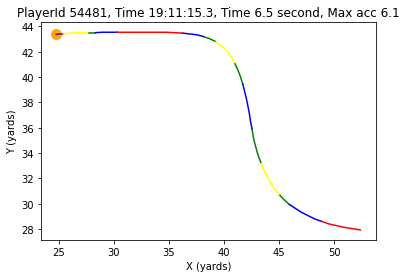

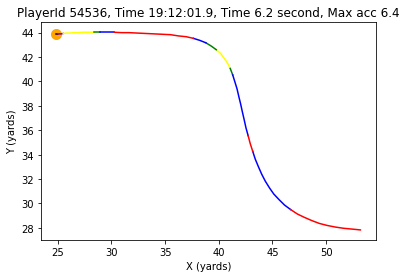

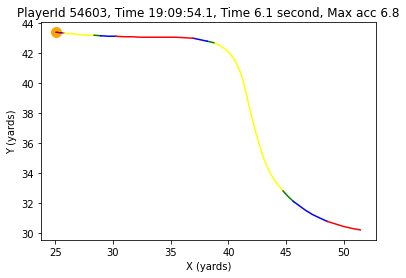

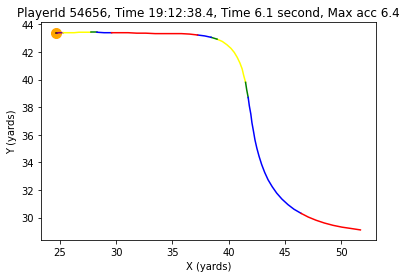

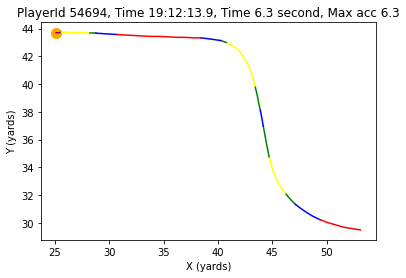

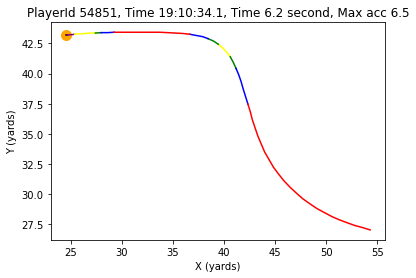

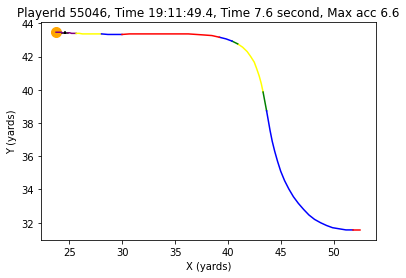

In [ ]:

combined_post = pd.DataFrame(columns = ['playerId', 'timeStamp', 'posX', 'posY', 'velX','velY', 'accX', 'accY', 'acc','vel'])
players = tracking_df.playerId.drop_duplicates().tolist()
for player in players:
    combined_post = combined_post.append(find_post(tracking_df, player))

In [ ]:
def segment_post(df,playerId):
    df['acc'] = pow(pow(df.accX,2) + pow(df.accY,2),0.5)
    df['vel'] = pow(pow(df.velX,2) + pow(df.velY,2),0.5)
    move_array1 = []
    move_array2 = []
    total_time = 0
    visitedFirstLeg = False
    visitedSecondLeg = False
    curr_player_df = df.loc[df.playerId == playerId]
    for i in range(len(curr_player_df)):
        curr_df = curr_player_df.iloc[i]
        if len(move_array1) == 0:
            start = curr_df
            visitedFirstLeg = True
        if (curr_df.velY < -1 and visitedFirstLeg and visitedSecondLeg == False):
            visitedSecondLeg = True
        if (visitedFirstLeg and visitedSecondLeg == False):
            move_array1.append(curr_df)
        if (visitedFirstLeg and visitedSecondLeg):
            move_array2.append(curr_df)

        #if (visitedFirstLeg and visitedSecondLeg and visitedThirdLeg and visitedFourthLeg):
            #move_array4.append(curr_df)
        
    total_time1 = (len(move_array1) - 1) / 10
    plot_path(move_array1,total_time1)

    total_time2 = (len(move_array2) - 1) / 10
    plot_path(move_array2,total_time2)

    df1 = pd.DataFrame(move_array1, index =[i for i in range(len(move_array1))],columns =['playerId', 'timeStamp', 'posX', 'posY', 'velX','velY', 'accX', 'accY', 'acc','vel'])
    df2 = pd.DataFrame(move_array2, index =[i for i in range(len(move_array2))],columns =['playerId', 'timeStamp', 'posX', 'posY', 'velX','velY', 'accX', 'accY', 'acc','vel'])
    
    return df1, df2

In [ ]:
combined_post

playerId                    timeStamp       posX       posY      velX  \
0     54481  2022-03-03 19:11:15.3000000  24.766667  43.366667  1.103333   
1     54481  2022-03-03 19:11:15.4000000  24.900000  43.366667  1.413333   
2     54481  2022-03-03 19:11:15.5000000  25.033333  43.400000  1.786667   
3     54481  2022-03-03 19:11:15.6000000  25.233333  43.400000  2.210000   
4     54481  2022-03-03 19:11:15.7000000  25.433333  43.400000  2.640000   
..      ...                          ...        ...        ...       ...   
71    55046  2022-03-03 19:11:56.5000000  49.866667  31.700000  6.246667   
72    55046  2022-03-03 19:11:56.6000000  50.500000  31.633333  6.493333   
73    55046  2022-03-03 19:11:56.7000000  51.133333  31.566667  6.740000   
74    55046  2022-03-03 19:11:56.8000000  51.800000  31.566667  7.013333   
75    55046  2022-03-03 19:11:56.9000000  52.500000  31.566667  7.173333   

        velY      accX      accY       acc       vel  
0   0.093333  2.310000 -0.056667  2.310695  1.107274  
1   0.096667  2.666667 -0.023333  2.666769  1.416635  
2   0.110000  3.326667  0.053333  3.327094  1.790050  
3   0.126667  3.613333  0.120000  3.615325  2.213627  
4   0.156667  3.913333  0.226667  3.919892  2.644644  
..       ...       ...       ...       ...       ...  
71 -1.020000  1.720000  3.866667  4.231963  6.329395  
72 -0.643333  1.660000  3.440000  3.819581  6.525125  
73 -0.336667  1.526667  2.896667  3.274353  6.748403  
74 -0.076667  1.383333  2.366667  2.741299  7.013752  
75  0.126667  1.213333  1.886667  2.243143  7.174452  

[450 rows x 10 columns]

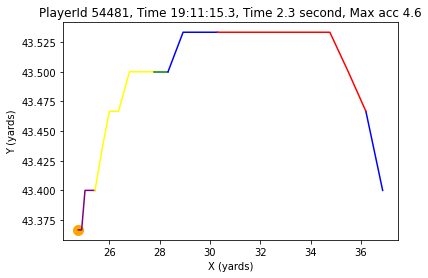

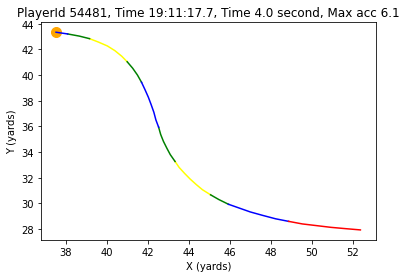

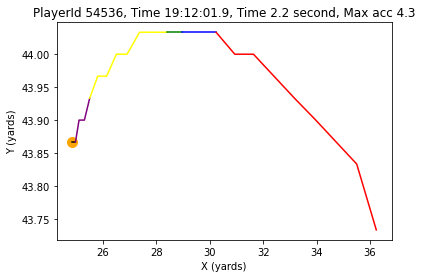

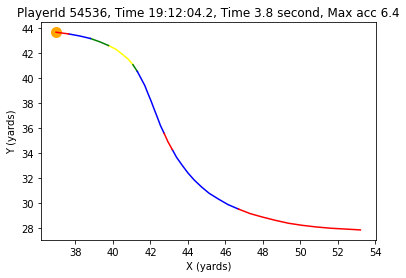

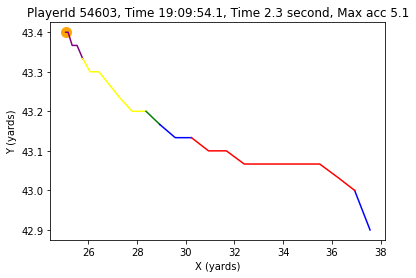

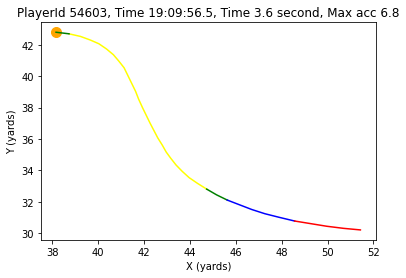

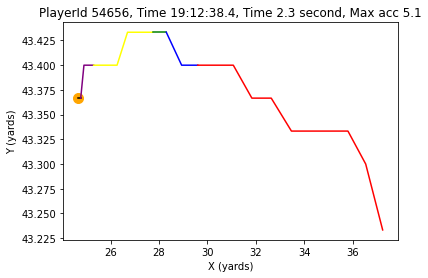

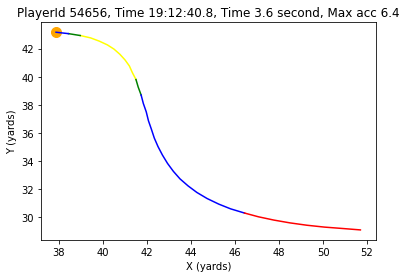

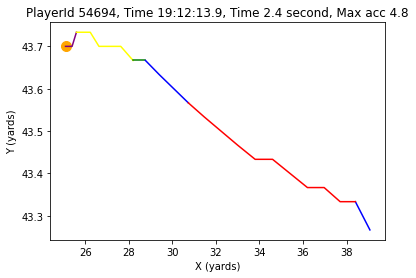

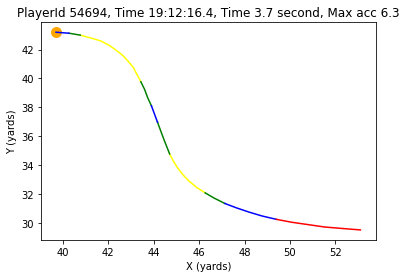

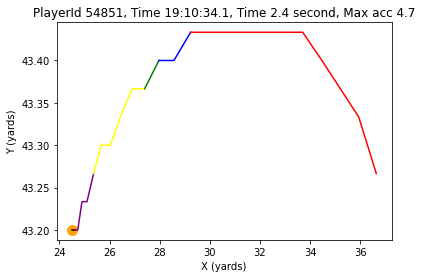

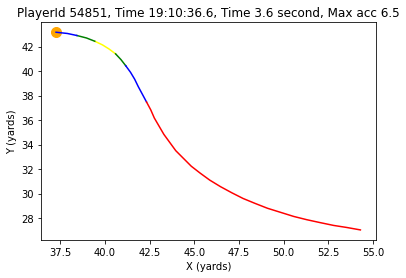

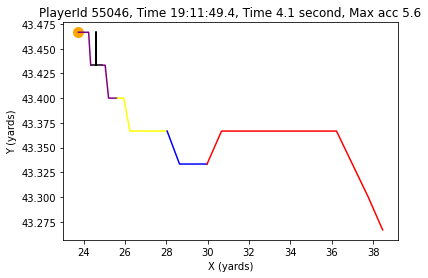

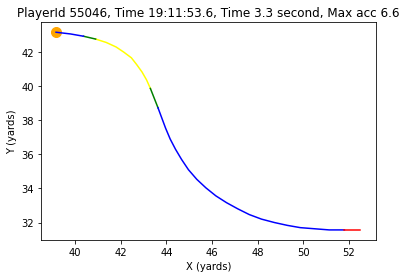

In [ ]:
players = combined_post.playerId.drop_duplicates().tolist()
for player in players:
    segment_post(combined_post, player)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


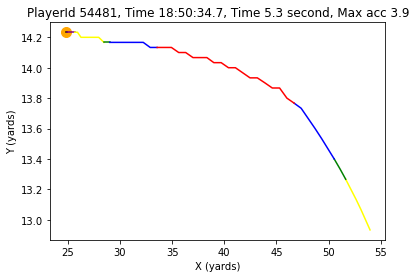

playerId                    timeStamp       posX       posY      velX  \
0      54481  2022-03-03 18:50:34.7000000  24.800000  14.233333  0.956667   
1      54481  2022-03-03 18:50:34.8000000  24.900000  14.233333  1.283333   
2      54481  2022-03-03 18:50:34.9000000  25.033333  14.233333  1.623333   
3      54481  2022-03-03 18:50:35.0000000  25.200000  14.233333  1.996667   
4      54481  2022-03-03 18:50:35.1000000  25.400000  14.233333  2.400000   
5      54481  2022-03-03 18:50:35.2000000  25.666667  14.233333  2.786667   
6      54481  2022-03-03 18:50:35.3000000  25.933333  14.233333  3.213333   
7      54481  2022-03-03 18:50:35.4000000  26.266667  14.200000  3.643333   
8      54481  2022-03-03 18:50:35.5000000  26.633333  14.200000  3.993333   
9      54481  2022-03-03 18:50:35.6000000  27.033333  14.200000  4.356667   
10     54481  2022-03-03 18:50:35.7000000  27.466667  14.200000  4.683333   
11     54481  2022-03-03 18:50:35.8000000  27.966667  14.200000  5.106667   
12     54481  2022-03-03 18:50:35.9000000  28.466667  14.166667  5.520000   
13     54481  2022-03-03 18:50:36.0000000  29.033333  14.166667  5.900000   
14     54481  2022-03-03 18:50:36.1000000  29.600000  14.166667  6.216667   
15     54481  2022-03-03 18:50:36.2000000  30.233333  14.166667  6.466667   
16     54481  2022-03-03 18:50:36.3000000  30.900000  14.166667  6.630000   
17     54481  2022-03-03 18:50:36.4000000  31.533333  14.166667  6.740000   
18     54481  2022-03-03 18:50:36.5000000  32.233333  14.166667  6.810000   
19     54481  2022-03-03 18:50:36.6000000  32.900000  14.133333  6.850000   
20     54481  2022-03-03 18:50:36.7000000  33.566667  14.133333  6.903333   
21     54481  2022-03-03 18:50:36.8000000  34.233333  14.133333  6.916667   
22     54481  2022-03-03 18:50:36.9000000  34.933333  14.133333  6.970000   
23     54481  2022-03-03 18:50:37.0000000  35.633333  14.100000  6.960000   
24     54481  2022-03-03 18:50:37.1000000  36.300000  14.100000  6.946667   
25     54481  2022-03-03 18:50:37.2000000  37.000000  14.066667  6.930000   
26     54481  2022-03-03 18:50:37.3000000  37.666667  14.066667  6.903333   
27     54481  2022-03-03 18:50:37.4000000  38.333333  14.066667  6.916667   
28     54481  2022-03-03 18:50:37.5000000  39.000000  14.033333  6.920000   
29     54481  2022-03-03 18:50:37.6000000  39.700000  14.033333  6.960000   
30     54481  2022-03-03 18:50:37.7000000  40.400000  14.000000  6.986667   
31     54481  2022-03-03 18:50:37.8000000  41.066667  14.000000  7.046667   
32     54481  2022-03-03 18:50:37.9000000  41.766667  13.966667  7.080000   
33     54481  2022-03-03 18:50:38.0000000  42.466667  13.933333  7.143333   
34     54481  2022-03-03 18:50:38.1000000  43.166667  13.933333  7.203333   
35     54481  2022-03-03 18:50:38.2000000  43.900000  13.900000  7.190000   
36     54481  2022-03-03 18:50:38.3000000  44.600000  13.866667  7.163333   
37     54481  2022-03-03 18:50:38.4000000  45.300000  13.866667  7.086667   
38     54481  2022-03-03 18:50:38.5000000  46.000000  13.800000  6.996667   
39     54481  2022-03-03 18:50:38.6000000  46.700000  13.766667  6.880000   
40     54481  2022-03-03 18:50:38.7000000  47.366667  13.733333  6.756667   
41     54481  2022-03-03 18:50:38.8000000  48.033333  13.666667  6.610000   
42     54481  2022-03-03 18:50:38.9000000  48.700000  13.600000  6.436667   
43     54481  2022-03-03 18:50:39.0000000  49.333333  13.533333  6.233333   
44     54481  2022-03-03 18:50:39.1000000  49.933333  13.466667  6.006667   
45     54481  2022-03-03 18:50:39.2000000  50.533333  13.400000  5.780000   
46     54481  2022-03-03 18:50:39.3000000  51.100000  13.333333  5.540000   
47     54481  2022-03-03 18:50:39.4000000  51.633333  13.266667  5.300000   
48     54481  2022-03-03 18:50:39.5000000  52.133333  13.200000  5.070000   
49     54481  2022-03-03 18:50:39.6000000  52.633333  13.133333  4.850000   
50     54481  2022-03-03 18:50:39.7000000  53.100000  13.066667  4.650000   


In [ ]:
def find_go(df, curr_playerId):
  df = df.loc[df.playerId == curr_playerId]
  #print(player_df.iloc[j].playerId)
  df['acc'] = pow(pow(df.accX,2) + pow(df.accY,2),0.5)
  df['vel'] = pow(pow(df.velX,2) + pow(df.velY,2),0.5)
  min_acc_threshold = 2
  time_threshold = 1
  vel_threshold = 1
  min_time = 4
  max_time = 40
  total_distance      = 0
  total_distance_x    = 0
  total_distance_y    = 0
  move_array          = []
  momentary_stop      = 0
  momentary_stop_threshold = 50
  total_time = 0
  stopper = 0
  curr_player_df = df.loc[df.timeStamp > '2022-03-03 18:20:00.0000000']
  curr_player_df = curr_player_df.loc[curr_player_df.timeStamp < '2022-03-03 19:50:00.0000000']
  curr_player_df = curr_player_df.loc[curr_player_df.posX > 20]
  curr_player_df = curr_player_df.loc[curr_player_df.posX < 54]
  curr_player_df = curr_player_df.loc[curr_player_df.posY < 20]
  df = curr_player_df.loc[curr_player_df.posY > 5]
  final_df = pd.DataFrame(columns =['playerId', 'timeStamp', 'posX', 'posY', 'velX','velY', 'accX', 'accY', 'acc','vel'])
  for i in range(len(df)):
    if i == 0:
        previous_df = df.iloc[i]
    curr_df = df.iloc[i]
    prev_df = df.iloc[i-1]
    if curr_df.acc >= min_acc_threshold or (len(move_array) > 0 and momentary_stop < momentary_stop_threshold and (len(move_array) / 10) ) and (math.fabs(curr_df.posX - prev_df.posX) < 5) and (math.fabs(curr_df.posY - prev_df.posY) < 5) :
      #print(curr_df.posX)
      #if len(move_array) == 0:
            #start = curr_df
      if len(move_array) > 0:
        total_distance_x += math.fabs(curr_df.posX - move_array[-1].posX)
        total_distance_y += math.fabs(curr_df.posY - move_array[-1].posX)
        total_distance += math.fabs(pow(pow(math.fabs(curr_df.posX - move_array[-1].posX),2) + pow(math.fabs(curr_df.posY - move_array[-1].posX),2),0.5)) 
        if curr_df.acc < min_acc_threshold:
          momentary_stop += 1
        else:
          momentary_stop = 0
      else:
        total_distance      = 0
        total_distance_x    = 0
        total_distance_y    = 0
        momentary_stop      = 0
        
      move_array.append(curr_df)
    elif (len(move_array) > 0):
      #print(curr_df.posX)
      total_time = len(move_array) / 10
      start = move_array[0]
      end = move_array[-1]
      if (total_time > min_time) and ( total_time < max_time) and start.posY < 15 and start.posY > 13.5 and end.posY < 13.6  and start.posX > 13 :
        #print(start.posX, start.posY)
        final_df = pd.DataFrame(move_array, index =[i for i in range(len(move_array))],columns =['playerId', 'timeStamp', 'posX', 'posY', 'velX','velY', 'accX', 'accY', 'acc','vel'])
        plot_path(move_array,total_time)
      move_array = []
      
  
  if (len(move_array)):
    total_time = len(move_array) / 10
    start = move_array[0]
    #print(total_time, start.posY)
    if (total_time > min_time) and ( total_time < max_time) and start.posY < 15 and start.posY > 12 and end.posY < 13.6  and start.posX > 13 :
      final_df = pd.DataFrame(move_array, index =[i for i in range(len(move_array))],columns =['playerId', 'timeStamp', 'posX', 'posY', 'velX','velY', 'accX', 'accY', 'acc','vel'])
      plot_path(move_array, total_time)

  return final_df
find_go(tracking_df,54481)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


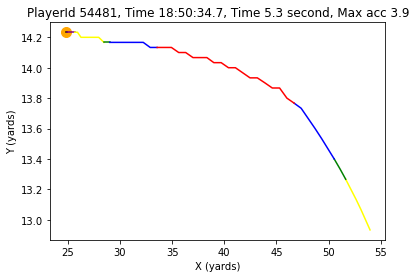

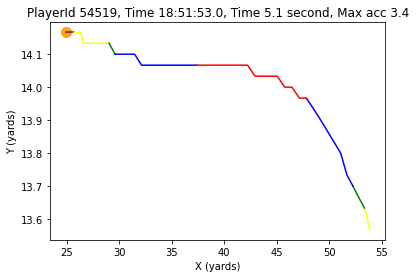

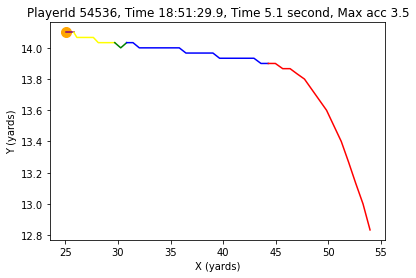

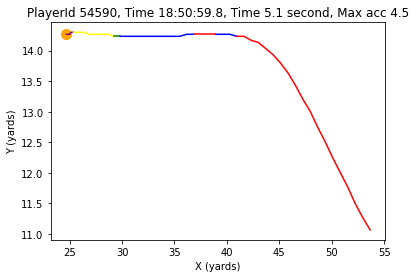

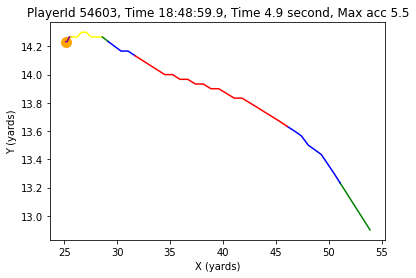

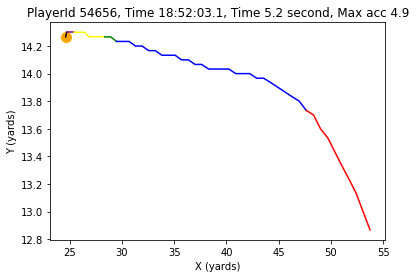

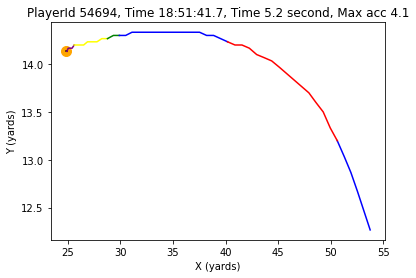

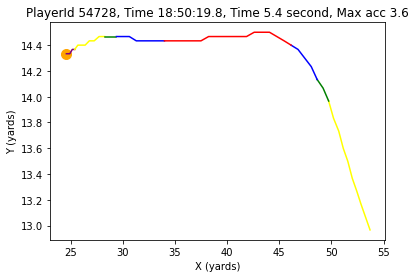

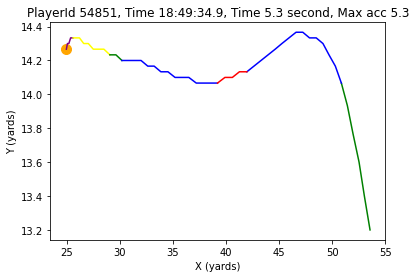

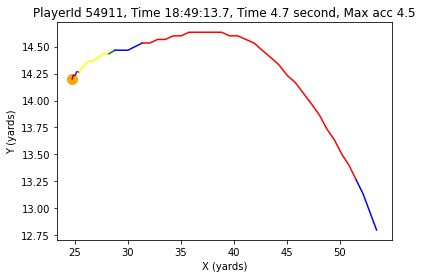

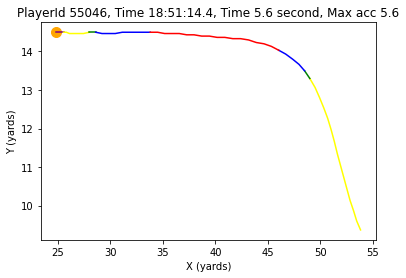

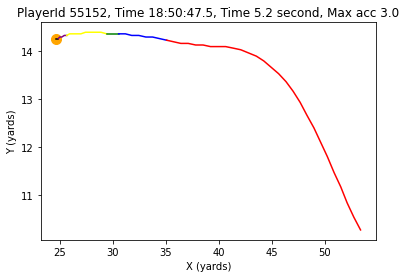

In [ ]:
combined_go = pd.DataFrame(columns = ['playerId', 'timeStamp', 'posX', 'posY', 'velX','velY', 'accX', 'accY', 'acc','vel'])
players = tracking_df.playerId.drop_duplicates().tolist()
for player in players:
    combined_go = combined_go.append(find_go(tracking_df, player))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


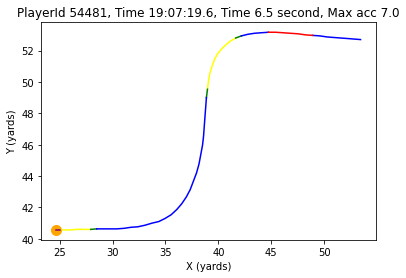

playerId                    timeStamp       posX       posY      velX  \
0      54481  2022-03-03 19:07:19.6000000  24.666667  40.566667  1.333333   
1      54481  2022-03-03 19:07:19.7000000  24.800000  40.566667  1.673333   
2      54481  2022-03-03 19:07:19.8000000  24.966667  40.566667  2.166667   
3      54481  2022-03-03 19:07:19.9000000  25.166667  40.566667  2.610000   
4      54481  2022-03-03 19:07:20.0000000  25.433333  40.566667  3.083333   
..       ...                          ...        ...        ...       ...   
60     54481  2022-03-03 19:07:25.6000000  50.900000  52.833333  6.580000   
61     54481  2022-03-03 19:07:25.7000000  51.533333  52.800000  6.476667   
62     54481  2022-03-03 19:07:25.8000000  52.200000  52.766667  6.363333   
63     54481  2022-03-03 19:07:25.9000000  52.800000  52.733333  6.240000   
64     54481  2022-03-03 19:07:26.0000000  53.433333  52.700000  6.093333   

        velY      accX      accY       acc       vel  
0  -0.060000  2.500000  0.073333  2.501075  1.334683  
1  -0.053333  2.986667  0.106667  2.988571  1.674183  
2  -0.023333  3.686667  0.186667  3.691389  2.166792  
3   0.006667  4.030000  0.256667  4.038165  2.610009  
4   0.036667  4.016667  0.260000  4.025073  3.083551  
..       ...       ...       ...       ...       ...  
60 -0.406667 -1.146667  0.260000  1.175774  6.592555  
61 -0.380000 -1.196667  0.270000  1.226748  6.487805  
62 -0.353333 -1.383333  0.276667  1.410729  6.373135  
63 -0.323333 -1.530000  0.280000  1.555410  6.248371  
64 -0.286667 -1.536667  0.316667  1.568956  6.100073  

[65 rows x 10 columns]

In [ ]:
def find_corner(df, curr_playerId):
  df = df.loc[df.playerId == curr_playerId]
  #print(player_df.iloc[j].playerId)
  df['acc'] = pow(pow(df.accX,2) + pow(df.accY,2),0.5)
  df['vel'] = pow(pow(df.velX,2) + pow(df.velY,2),0.5)
  min_acc_threshold = 2
  time_threshold = 1
  vel_threshold = 1
  min_time = 6
  max_time = 40
  total_distance      = 0
  total_distance_x    = 0
  total_distance_y    = 0
  move_array          = []
  momentary_stop      = 0
  momentary_stop_threshold = 50
  total_time = 0
  stopper = 0
  curr_player_df = df.loc[df.timeStamp > '2022-03-03 18:50:00.0000000']
  curr_player_df = curr_player_df.loc[curr_player_df.timeStamp < '2022-03-03 20:00:00.0000000']
  curr_player_df = curr_player_df.loc[curr_player_df.posX > 20]
  curr_player_df = curr_player_df.loc[curr_player_df.posX < 55]
  curr_player_df = curr_player_df.loc[curr_player_df.posY < 58]
  df = curr_player_df.loc[curr_player_df.posY > 35]
  final_df = pd.DataFrame(columns =['playerId', 'timeStamp', 'posX', 'posY', 'velX','velY', 'accX', 'accY', 'acc','vel'])
  for i in range(len(df)):
    if i == 0:
        previous_df = df.iloc[i]
    curr_df = df.iloc[i]
    prev_df = df.iloc[i-1]
    if curr_df.acc >= min_acc_threshold or (len(move_array) > 0 and momentary_stop < momentary_stop_threshold and (len(move_array) / 10) < 6.5) and (math.fabs(curr_df.posX - prev_df.posX) < 2) and (math.fabs(curr_df.posY - prev_df.posY) < 2) :
      #print(curr_df.posX)
      #if len(move_array) == 0:
            #start = curr_df
      if len(move_array) > 0:
        total_distance_x += math.fabs(curr_df.posX - move_array[-1].posX)
        total_distance_y += math.fabs(curr_df.posY - move_array[-1].posX)
        total_distance += math.fabs(pow(pow(math.fabs(curr_df.posX - move_array[-1].posX),2) + pow(math.fabs(curr_df.posY - move_array[-1].posX),2),0.5)) 
        if curr_df.acc < min_acc_threshold:
          momentary_stop += 1
        else:
          momentary_stop = 0
      else:
        total_distance      = 0
        total_distance_x    = 0
        total_distance_y    = 0
        momentary_stop      = 0
        
      move_array.append(curr_df)
    elif (len(move_array) > 0):
      #print(curr_df.posX)
      total_time = len(move_array) / 10
      start = move_array[0]
      end = move_array[-1]
      if (total_time > min_time) and ( total_time < max_time) and start.posY < 44 and  start.posY > 37 and end.posY > 50 and start.posX < 30 and start.posX > 15:
        #print(start.posX, start.posY)
        final_df = pd.DataFrame(move_array, index =[i for i in range(len(move_array))],columns =['playerId', 'timeStamp', 'posX', 'posY', 'velX','velY', 'accX', 'accY', 'acc','vel'])
        plot_path(move_array,total_time)
      move_array = []
      
  
  if (len(move_array)):
    total_time = len(move_array) / 10
    start = move_array[0]
    #print(total_time, start.posY)
    if (total_time > min_time) and ( total_time < max_time) and start.posY < 44 and  start.posY > 37 and end.posY > 50 and start.posX < 30 and start.posX > 15:
      final_df = pd.DataFrame(move_array, index =[i for i in range(len(move_array))],columns =['playerId', 'timeStamp', 'posX', 'posY', 'velX','velY', 'accX', 'accY', 'acc','vel'])
      plot_path(move_array, total_time)
  return final_df

find_corner(tracking_df,54481)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


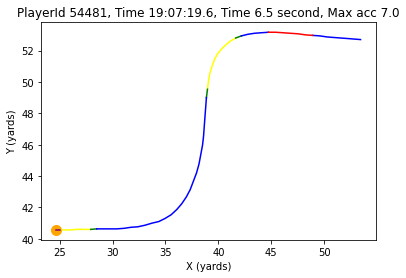

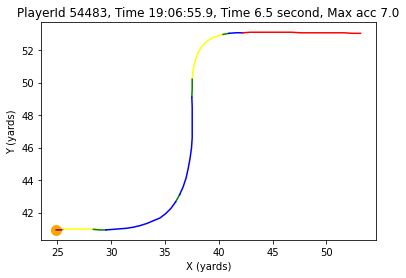

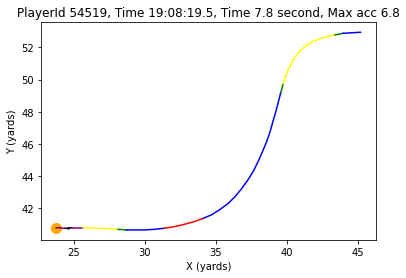

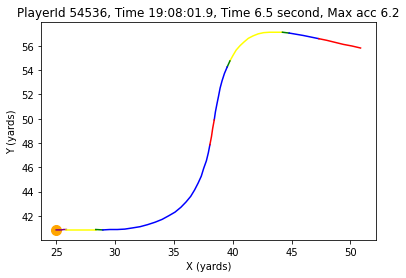

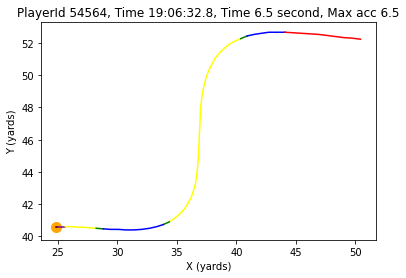

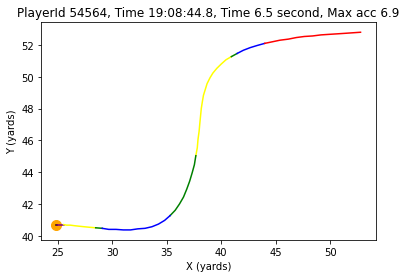

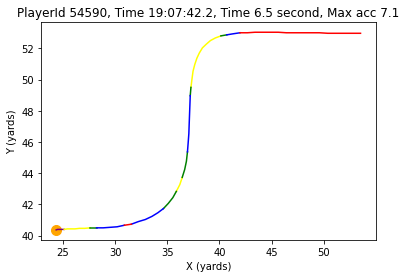

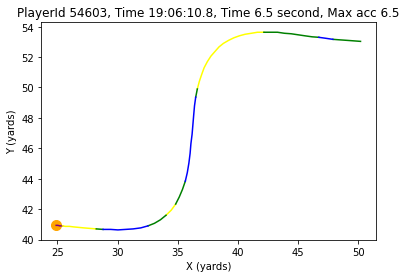

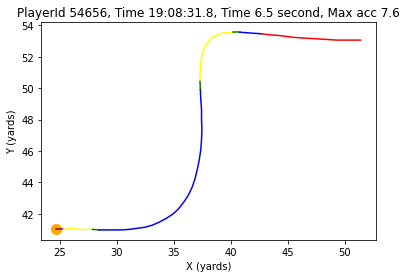

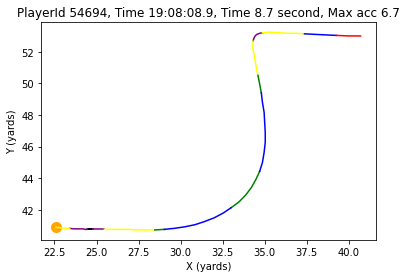

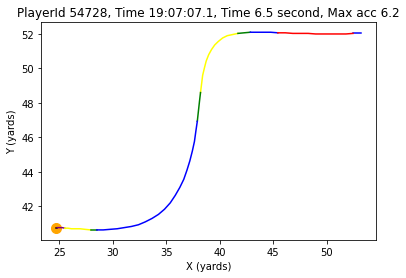

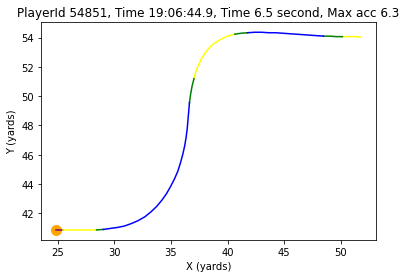

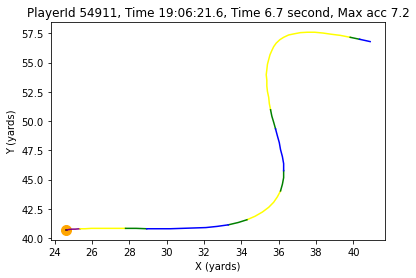

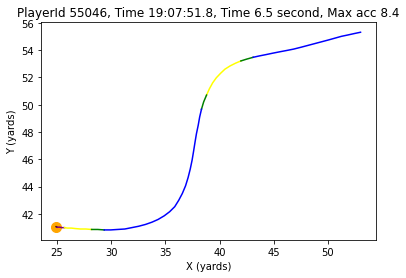

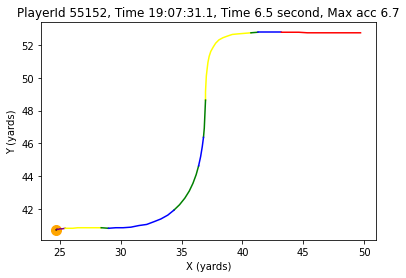

In [ ]:
combined_corner = pd.DataFrame(columns = ['playerId', 'timeStamp', 'posX', 'posY', 'velX','velY', 'accX', 'accY', 'acc','vel'])
players = tracking_df.playerId.drop_duplicates().tolist()
for player in players:
    combined_corner = combined_corner.append(find_corner(tracking_df, player))

In [ ]:
def segment_corner(df,playerId):
    df['acc'] = pow(pow(df.accX,2) + pow(df.accY,2),0.5)
    df['vel'] = pow(pow(df.velX,2) + pow(df.velY,2),0.5)
    move_array1 = []
    move_array2 = []
    move_array3 = []
    total_time = 0
    visitedFirstLeg = False
    visitedSecondLeg = False
    visitedThirdLeg = False
    curr_player_df = df.loc[df.playerId == playerId]
    for i in range(len(curr_player_df)):
        curr_df = curr_player_df.iloc[i]
        if len(move_array1) == 0:
            start = curr_df
            visitedFirstLeg = True
        if (visitedFirstLeg and visitedSecondLeg == False and visitedThirdLeg == False):
            move_array1.append(curr_df)
        if (curr_df.velY > 0 and curr_df.velX < 1 and visitedFirstLeg and visitedSecondLeg == False and visitedThirdLeg == False):
            visitedSecondLeg = True
        if (visitedFirstLeg and visitedSecondLeg and visitedThirdLeg == False):
            move_array2.append(curr_df)
        if (curr_df.velX > 0 and curr_df.velY < 1 and visitedFirstLeg and visitedSecondLeg and visitedThirdLeg == False):
            visitedThirdLeg = True
        if (visitedFirstLeg and visitedSecondLeg and visitedThirdLeg):
            move_array3.append(curr_df)

        #if (visitedFirstLeg and visitedSecondLeg and visitedThirdLeg and visitedFourthLeg):
            #move_array4.append(curr_df)
    #print(move_array1, move_array2, move_array3)   
    total_time1 = (len(move_array1) - 1) / 10
    plot_path(move_array1,total_time1)

    total_time2 = (len(move_array2) - 1) / 10
    plot_path(move_array2,total_time2)

    total_time3 = (len(move_array2) - 1) / 10
    plot_path(move_array3,total_time3)

    df1 = pd.DataFrame(move_array1, index =[i for i in range(len(move_array1))],columns =['playerId', 'timeStamp', 'posX', 'posY', 'velX','velY', 'accX', 'accY', 'acc','vel'])
    df2 = pd.DataFrame(move_array2, index =[i for i in range(len(move_array2))],columns =['playerId', 'timeStamp', 'posX', 'posY', 'velX','velY', 'accX', 'accY', 'acc','vel'])
    df3 = pd.DataFrame(move_array2, index =[i for i in range(len(move_array2))],columns =['playerId', 'timeStamp', 'posX', 'posY', 'velX','velY', 'accX', 'accY', 'acc','vel'])
    return df1, df2, df3

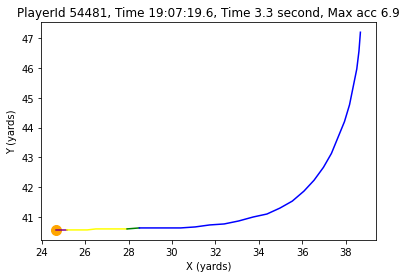

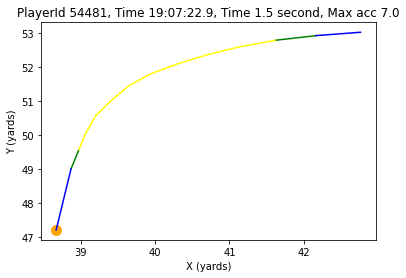

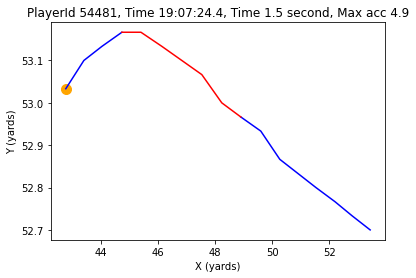

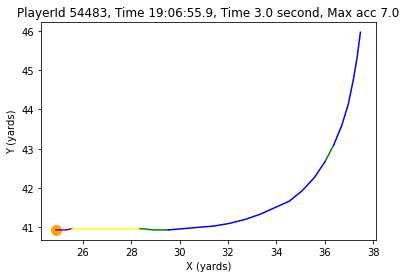

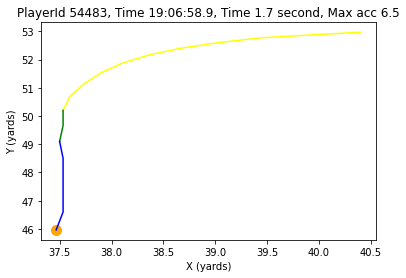

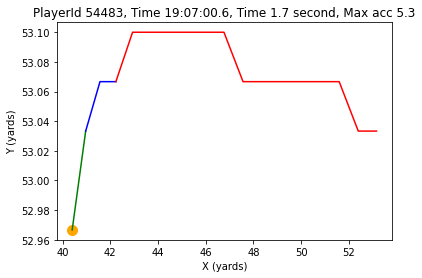

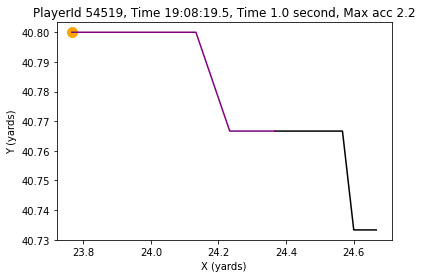

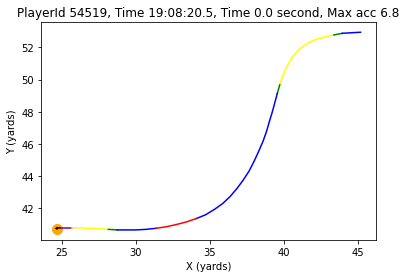

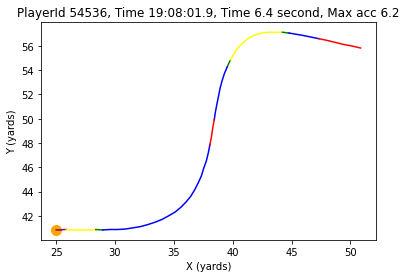

IndexError: ignored

In [ ]:
players = combined_corner.playerId.drop_duplicates().tolist()
for player in players:
    segment_corner(combined_corner, player)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


3.0 -1.03333333333333
5.5 14.2333333333333
7.0 -0.766666666666667
0.3 1.03333333333333
6.8 12.2666666666667


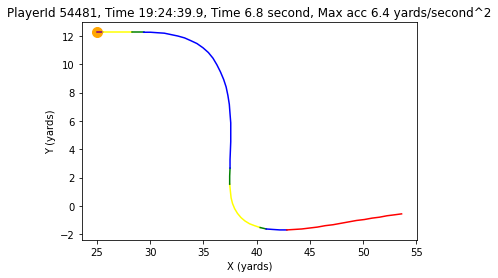

6.8 9.76666666666667
4.5 11.5333333333333
4.0 9.63333333333333
4.2 9.56666666666667
6.8 9.36666666666667


In [ ]:
def find_xcrossing(df, curr_playerId):
  df = df.loc[df.playerId == curr_playerId]
  #print(player_df.iloc[j].playerId)
  df['acc'] = pow(pow(df.accX,2) + pow(df.accY,2),0.5)
  df['vel'] = pow(pow(df.velX,2) + pow(df.velY,2),0.5)
  min_acc_threshold = 2
  time_threshold = 1
  vel_threshold = 1
  min_time = 6
  max_time = 40
  total_distance      = 0
  total_distance_x    = 0
  total_distance_y    = 0
  move_array          = []
  momentary_stop      = 0
  momentary_stop_threshold = 50
  total_time = 0
  stopper = 0
  curr_player_df = df.loc[df.timeStamp > '2022-03-03 18:20:00.0000000']
  curr_player_df = curr_player_df.loc[curr_player_df.timeStamp < '2022-03-03 19:50:00.0000000']
  curr_player_df = curr_player_df.loc[curr_player_df.posX > 20]
  curr_player_df = curr_player_df.loc[curr_player_df.posX < 55]
  curr_player_df = curr_player_df.loc[curr_player_df.posY < 20]
  df = curr_player_df.loc[curr_player_df.posY > -5]
  for i in range(len(df)):
    if i == 0:
        previous_df = df.iloc[i]
    curr_df = df.iloc[i]
    prev_df = df.iloc[i-1]
    if curr_df.acc >= min_acc_threshold or (len(move_array) > 0 and momentary_stop < momentary_stop_threshold and (len(move_array) / 10) < 6.8) and (math.fabs(curr_df.posX - prev_df.posX) < 2) and (math.fabs(curr_df.posY - prev_df.posY) < 2) :
      #print(curr_df.posX)
      #if len(move_array) == 0:
            #start = curr_df
      if len(move_array) > 0:
        total_distance_x += math.fabs(curr_df.posX - move_array[-1].posX)
        total_distance_y += math.fabs(curr_df.posY - move_array[-1].posX)
        total_distance += math.fabs(pow(pow(math.fabs(curr_df.posX - move_array[-1].posX),2) + pow(math.fabs(curr_df.posY - move_array[-1].posX),2),0.5)) 
        if curr_df.acc < min_acc_threshold:
          momentary_stop += 1
        else:
          momentary_stop = 0
      else:
        total_distance      = 0
        total_distance_x    = 0
        total_distance_y    = 0
        momentary_stop      = 0
        
      move_array.append(curr_df)
    elif (len(move_array) > 0):
      #print(curr_df.posX)
      total_time = len(move_array) / 10
      start = move_array[0]
      end = move_array[-1]
      print(total_time, start.posY)
      if (total_time > min_time) and ( total_time < max_time) and start.posY > 10 and start.posY < 13 and start.posY > 6 and start.posX < 40 and end.posY < 5:
        #print(start.posX, start.posY)
        plot_path(move_array,total_time)
      move_array = []
      
  
  if (len(move_array)):
    total_time = len(move_array) / 10
    start = move_array[0]
    #print(total_time, start.posY)
    if (total_time > min_time) and ( total_time < max_time) and start.posY > 10 and start.posY < 13 and start.posY > 6 and start.posX < 40 and end.posY < 5: 
      print(start.posX, start.posY)
      plot_path(move_array, total_time)


find_xcrossing(tracking_df,54481)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


3.0 -1.03333333333333
5.5 14.2333333333333
7.0 -0.766666666666667
0.3 1.03333333333333
6.8 12.2666666666667


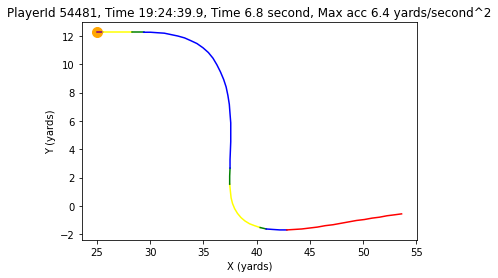

6.8 9.76666666666667
4.5 11.5333333333333
4.0 9.63333333333333
4.2 9.56666666666667
6.8 9.36666666666667
4.9 14.1666666666667
6.9 -0.6
6.8 12.4


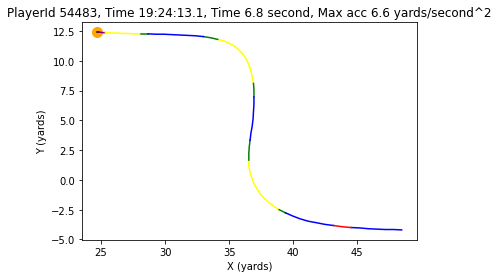

0.9 -4.33333333333333
6.8 12.3333333333333


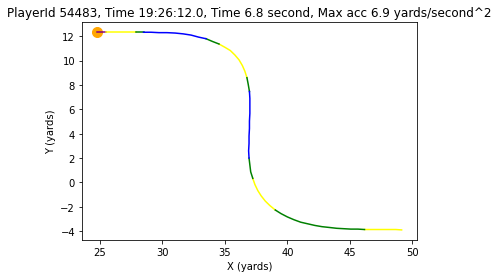

6.8 -3.9
6.8 9.86666666666667
4.8 11.5666666666667
4.2 9.63333333333333
5.0 9.3
6.9 9.1
3.4 -1.3
5.3 14.1666666666667
6.8 -0.366666666666667
0.8 0.933333333333333
7.6 12.0666666666667


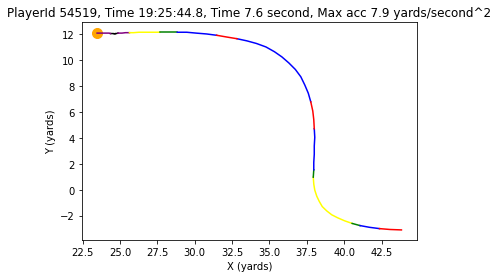

6.9 9.96666666666667
7.0 11.4333333333333
6.8 9.66666666666667
6.8 9.2
6.1 -0.533333333333333
3.3 -1.23333333333333
5.2 14.1
7.0 -0.633333333333333
0.2 1.13333333333333
4.5 12.5
6.8 9.8
4.5 11.6333333333333
4.0 9.66666666666667
5.5 8.56666666666667
6.8 14.2333333333333
6.8 -0.6
4.9 12.3333333333333
6.8 10.1333333333333
4.8 11.2333333333333
4.2 9.83333333333333
4.1 9.73333333333333
6.8 9.0
5.2 14.2666666666667
7.2 -0.866666666666667
5.5 12.3333333333333
6.8 12.3333333333333


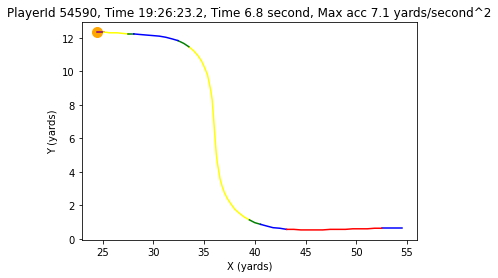

6.5 9.83333333333333
5.2 11.6333333333333
4.1 9.83333333333333
6.8 9.43333333333333
5.0 14.2333333333333
7.0 -0.333333333333333
4.6 12.0333333333333
6.8 9.8
4.7 11.4333333333333
4.1 9.56666666666667
6.8 9.13333333333333
3.4 -1.1
5.3 14.2666666666667
7.1 -0.933333333333333
0.1 1.3
6.5 12.1666666666667


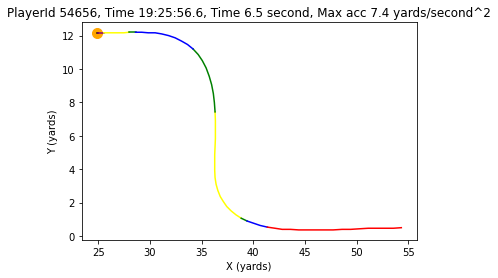

6.9 9.83333333333333
4.8 11.7666666666667
4.0 9.66666666666667
6.8 9.36666666666667
6.7 0.466666666666667
5.3 14.1333333333333
7.5 -0.8
2.1 1.56666666666667
8.1 12.3333333333333


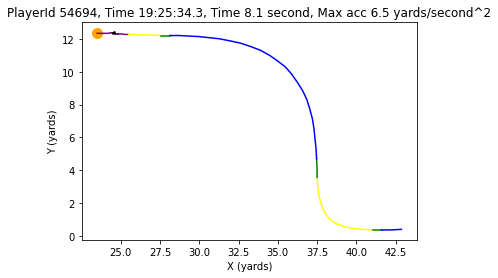

0.5 0.7
7.1 10.0
1.6 13.0333333333333
7.3 11.5
6.8 9.73333333333333
6.9 9.26666666666667
5.1 -1.06666666666667
5.6 14.3333333333333
7.0 -0.2
6.8 12.2333333333333


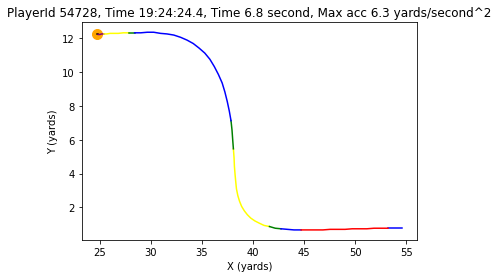

6.8 9.83333333333333
4.7 11.6333333333333
4.1 9.7
6.8 8.63333333333333
2.6 -1.36666666666667
5.5 14.2666666666667
6.9 -0.6
4.7 12.2333333333333
6.8 9.9
0.1 16.4333333333333
4.8 11.6666666666667
4.3 9.66666666666667
6.8 9.3
5.8 14.3666666666667
4.9 14.2
7.2 -0.566666666666667
0.1 0.866666666666667
7.9 12.2666666666667


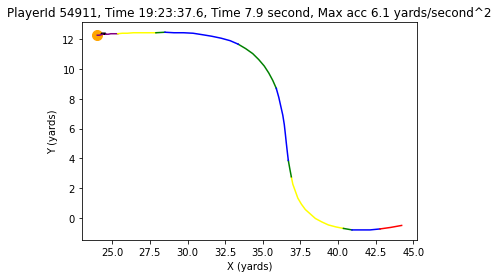

8.4 9.9
0.4 18.4666666666667
7.9 10.0
3.4 13.1
6.9 11.4666666666667
4.2 9.83333333333333
6.6 9.53333333333333
3.5 -1.13333333333333
5.9 14.5
7.0 -0.166666666666667
0.1 0.6
4.6 12.0333333333333
6.8 12.0666666666667


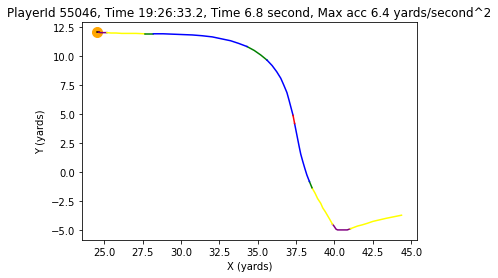

9.3 9.83333333333333
7.2 11.7666666666667
4.2 9.76666666666667
6.8 9.26666666666667
6.4 -3.33333333333333
5.4 14.2666666666667
6.8 -0.833333333333333
0.1 0.666666666666667
4.9 12.1666666666667
6.8 9.86666666666667
0.7 16.7
4.8 11.7666666666667
4.3 9.6
6.8 9.46666666666667


In [ ]:
players = player_df['playerId'].drop_duplicates().tolist()
i = 0
for player in players:
    i+=1
    find_xcrossing(tracking_df, player)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


6.9 -0.933333333333333
7.6 14.2333333333333
9.5 -0.766666666666667
5.5 11.5666666666667
10.3 12.2666666666667
5.1 9.76666666666667
5.4 12.3
5.3 11.1333333333333
7.7 11.5333333333333
6.1 9.63333333333333


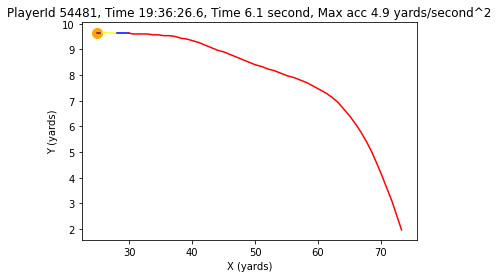

6.1 9.56666666666667


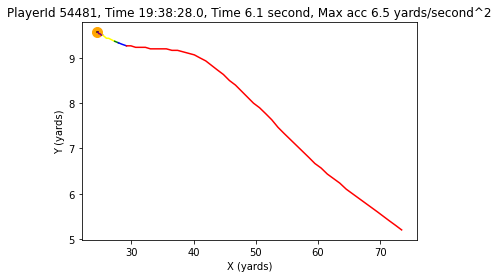

8.8 9.36666666666667


In [ ]:
def find_slant(df, curr_playerId):
  df = df.loc[df.playerId == curr_playerId]
  #print(player_df.iloc[j].playerId)
  df['acc'] = pow(pow(df.accX,2) + pow(df.accY,2),0.5)
  df['vel'] = pow(pow(df.velX,2) + pow(df.velY,2),0.5)
  min_acc_threshold = 2
  time_threshold = 1
  vel_threshold = 1
  min_time = 6
  max_time = 40
  total_distance      = 0
  total_distance_x    = 0
  total_distance_y    = 0
  move_array          = []
  momentary_stop      = 0
  momentary_stop_threshold = 50
  total_time = 0
  stopper = 0
  curr_player_df = df.loc[df.timeStamp > '2022-03-03 18:20:00.0000000']
  curr_player_df = curr_player_df.loc[curr_player_df.timeStamp < '2022-03-03 19:50:00.0000000']
  curr_player_df = curr_player_df.loc[curr_player_df.posX > 10]
  curr_player_df = curr_player_df.loc[curr_player_df.posX < 74]
  curr_player_df = curr_player_df.loc[curr_player_df.posY < 15]
  df = curr_player_df.loc[curr_player_df.posY > -10]
  for i in range(len(df)):
    if i == 0:
        previous_df = df.iloc[i]
    curr_df = df.iloc[i]
    prev_df = df.iloc[i-1]
    if curr_df.acc >= min_acc_threshold or (len(move_array) > 0 and momentary_stop < momentary_stop_threshold) and (math.fabs(curr_df.posX - prev_df.posX) < 3) and (math.fabs(curr_df.posY - prev_df.posY) < 3) :
      #print(curr_df.posX)
      #if len(move_array) == 0:
            #start = curr_df
      if len(move_array) > 0:
        total_distance_x += math.fabs(curr_df.posX - move_array[-1].posX)
        total_distance_y += math.fabs(curr_df.posY - move_array[-1].posX)
        total_distance += math.fabs(pow(pow(math.fabs(curr_df.posX - move_array[-1].posX),2) + pow(math.fabs(curr_df.posY - move_array[-1].posX),2),0.5)) 
        if curr_df.acc < min_acc_threshold:
          momentary_stop += 1
        else:
          momentary_stop = 0
      else:
        total_distance      = 0
        total_distance_x    = 0
        total_distance_y    = 0
        momentary_stop      = 0
        
      move_array.append(curr_df)
    elif (len(move_array) > 0):
      #print(curr_df.posX)
      total_time = len(move_array) / 10
      start = move_array[0]
      end = move_array[-1]
      print(total_time, start.posY)
      if (total_time > min_time) and ( total_time < max_time) and start.posY < 11 and start.posY > 9.5 and  start.posX < 40 and  start.posX > 15 and end.posX > 70:
        #print(start.posX, start.posY)
        plot_path(move_array,total_time)
      move_array = []
      
  
  if (len(move_array)):
    total_time = len(move_array) / 10
    start = move_array[0]
    #print(total_time, start.posY)
    if (total_time > min_time) and ( total_time < max_time) and start.posY < 11 and start.posY > 9.5 and start.posX < 40 and  start.posX > 15:
      print(start.posX, start.posY)
      plot_path(move_array, total_time)


find_slant(tracking_df,54481)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


6.9 -0.933333333333333
7.6 14.2333333333333
9.5 -0.766666666666667
5.5 11.5666666666667
10.3 12.2666666666667
5.1 9.76666666666667
5.4 12.3
5.3 11.1333333333333
7.7 11.5333333333333
6.1 9.63333333333333


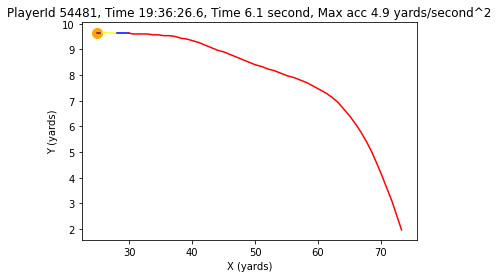

6.1 9.56666666666667


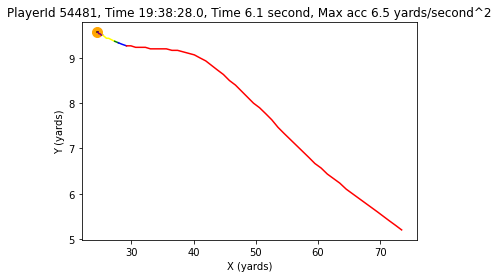

8.8 9.36666666666667
7.3 -1.2
6.3 14.1666666666667
14.3 -0.6
17.7 11.5333333333333
5.1 11.5666666666667
14.2 12.3333333333333
5.4 9.96666666666667
15.4 9.86666666666667
12.0 11.5666666666667
6.2 9.63333333333333


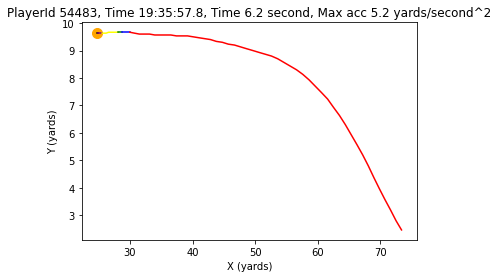

10.1 9.3
11.9 9.1
7.0 -1.06666666666667
7.9 14.1666666666667
14.4 -0.366666666666667
16.6 12.0666666666667
3.8 -1.2
10.7 9.96666666666667
10.1 11.4333333333333
12.5 9.6


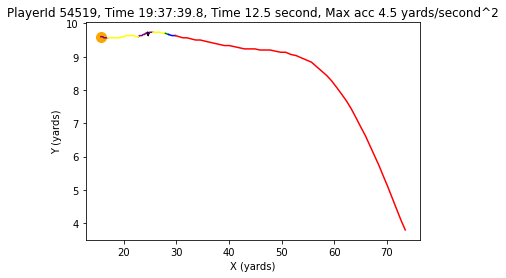

13.5 9.2
6.4 -1.06666666666667
6.1 14.1
0.3 13.5
8.9 -0.633333333333333
10.8 12.5
14.2 9.8
12.4 11.6333333333333
6.4 9.66666666666667


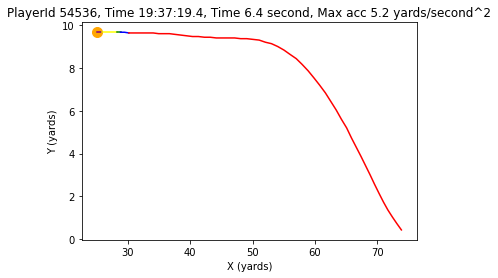

5.5 9.66666666666667
11.0 8.56666666666667
5.5 -1.1
14.5 13.7333333333333
9.0 -0.6
15.6 12.3333333333333
14.9 10.1333333333333
5.3 10.0333333333333
7.6 11.2333333333333
6.5 9.83333333333333


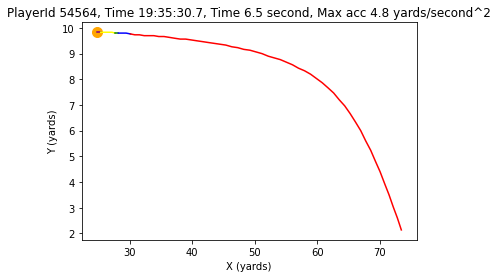

11.6 9.73333333333333
11.7 9.0
5.5 13.7
9.8 14.2666666666667
8.7 -0.866666666666667
12.5 12.3333333333333
14.3 12.3333333333333
15.7 9.83333333333333
6.7 11.6333333333333
6.2 9.83333333333333


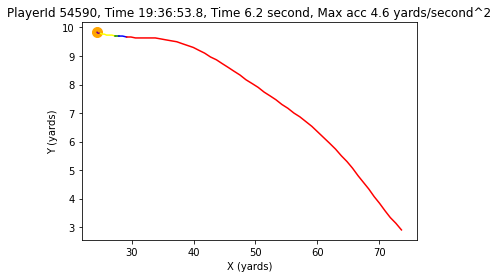

11.0 9.43333333333333
6.4 14.2333333333333
1.5 12.8333333333333
8.8 -0.333333333333333
12.0 12.0333333333333
14.0 9.8
5.3 7.6
12.9 11.4333333333333
6.4 9.56666666666667


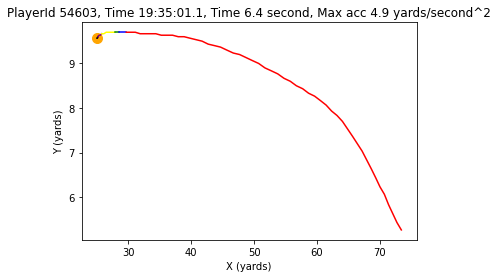

7.9 9.13333333333333
6.9 -1.16666666666667
6.3 14.2666666666667
0.3 11.8666666666667
9.4 -0.933333333333333
26.5 12.3
5.1 10.5
10.1 9.83333333333333
7.2 11.7666666666667
11.4 9.8


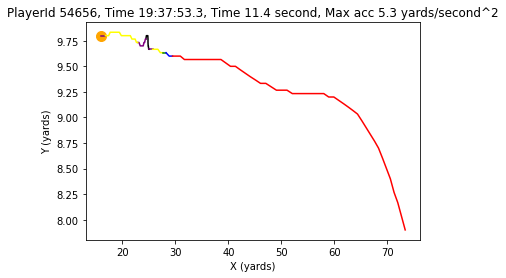

15.8 9.6
6.4 -1.7
0.3 -0.633333333333333
6.4 14.1333333333333
0.1 9.06666666666667
10.6 -0.8
17.9 12.2333333333333
17.0 10.2666666666667
18.1 10.8
11.8 10.0


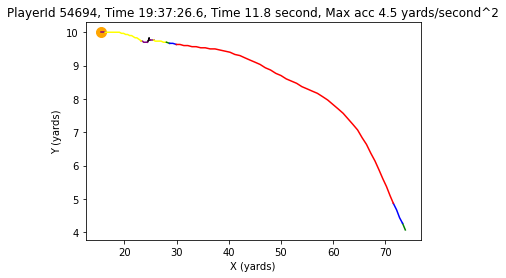

14.6 9.83333333333333
6.4 -1.2
8.4 14.3333333333333
13.1 -0.2
15.1 12.2333333333333
4.6 9.83333333333333
6.5 11.6333333333333
6.4 9.7


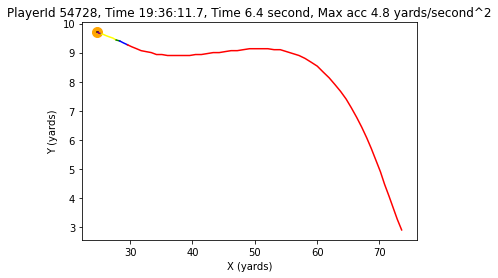

10.0 8.63333333333333
7.7 -1.3
9.3 14.2666666666667
9.2 -0.6
10.8 12.2333333333333
4.5 9.9
7.3 11.6666666666667
6.3 9.66666666666667


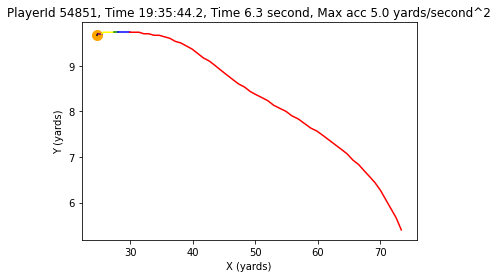

8.2 9.3
1.8 -0.666666666666667
9.6 13.5
6.6 14.2
9.1 -0.566666666666667
20.5 11.3
12.4 9.9
18.4 10.4
15.7 11.4666666666667
6.2 9.83333333333333


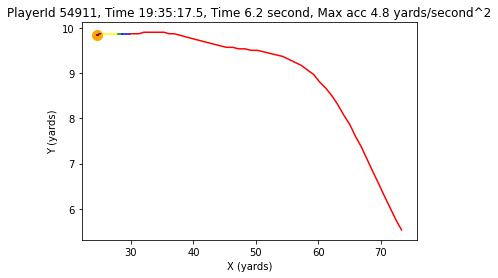

12.6 9.53333333333333
6.1 -1.1
8.7 14.5
8.8 -0.166666666666667
5.1 12.1
5.9 12.0333333333333
12.1 12.0666666666667
14.3 9.83333333333333
10.3 11.7666666666667
7.1 9.76666666666667


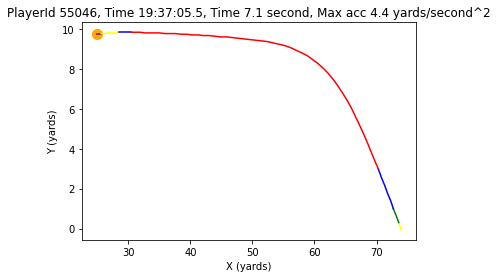

14.0 9.26666666666667
7.3 -1.1
5.2 13.6333333333333
10.6 14.2666666666667
9.7 -0.833333333333333
14.6 12.1666666666667
9.8 10.1666666666667
12.1 11.7666666666667
6.6 9.6


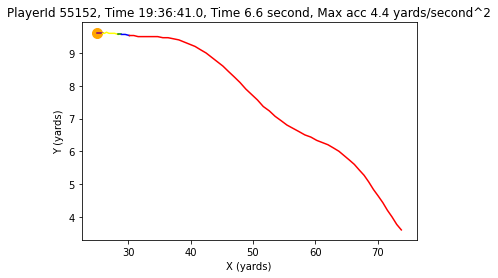

5.1 9.66666666666667
11.2 9.46666666666667
7.0 -1.3


In [ ]:
players = player_df['playerId'].drop_duplicates().tolist()
i = 0
for player in players:
    i+=1
    find_slant(tracking_df, player)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


4.5 14.2333333333333
0.5 7.63333333333333
3.3 12.2666666666667
7.2 9.76666666666667


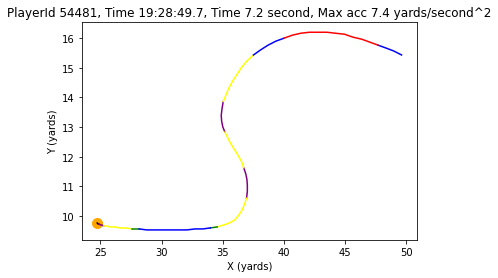

3.9 11.5333333333333
3.5 9.63333333333333
3.7 9.56666666666667


In [ ]:
def find_comeback(df, curr_playerId):
  df = df.loc[df.playerId == curr_playerId]
  #print(player_df.iloc[j].playerId)
  df['acc'] = pow(pow(df.accX,2) + pow(df.accY,2),0.5)
  df['vel'] = pow(pow(df.velX,2) + pow(df.velY,2),0.5)
  min_acc_threshold = 2
  time_threshold = 1
  vel_threshold = 1
  min_time = 6
  max_time = 40
  total_distance      = 0
  total_distance_x    = 0
  total_distance_y    = 0
  move_array          = []
  momentary_stop      = 0
  momentary_stop_threshold = 50
  total_time = 0
  stopper = 0
  curr_player_df = df.loc[df.timeStamp > '2022-03-03 18:20:00.0000000']
  curr_player_df = curr_player_df.loc[curr_player_df.timeStamp < '2022-03-03 19:50:00.0000000']
  curr_player_df = curr_player_df.loc[curr_player_df.posX > 20]
  curr_player_df = curr_player_df.loc[curr_player_df.posX < 50]
  curr_player_df = curr_player_df.loc[curr_player_df.posY < 20]
  df = curr_player_df.loc[curr_player_df.posY > 5]
  for i in range(len(df)):
    if i == 0:
        previous_df = df.iloc[i]
    curr_df = df.iloc[i]
    prev_df = df.iloc[i-1]
    if curr_df.acc >= min_acc_threshold or (len(move_array) > 0 and momentary_stop < momentary_stop_threshold) and (math.fabs(curr_df.posX - prev_df.posX) < 5) and (math.fabs(curr_df.posY - prev_df.posY) < 5) :
      #print(curr_df.posX)
      #if len(move_array) == 0:
            #start = curr_df
      if len(move_array) > 0:
        total_distance_x += math.fabs(curr_df.posX - move_array[-1].posX)
        total_distance_y += math.fabs(curr_df.posY - move_array[-1].posX)
        total_distance += math.fabs(pow(pow(math.fabs(curr_df.posX - move_array[-1].posX),2) + pow(math.fabs(curr_df.posY - move_array[-1].posX),2),0.5)) 
        if curr_df.acc < min_acc_threshold:
          momentary_stop += 1
        else:
          momentary_stop = 0
      else:
        total_distance      = 0
        total_distance_x    = 0
        total_distance_y    = 0
        momentary_stop      = 0
        
      move_array.append(curr_df)
    elif (len(move_array) > 0):
      #print(curr_df.posX)
      total_time = len(move_array) / 10
      start = move_array[0]
      end = move_array[-1]
      print(total_time, start.posY)
      if (total_time > min_time) and ( total_time < max_time) and start.posY < 18 and start.posY > 5 and end.posX > 40 and end.posY >13  and start.posY < 13:
        #print(start.posX, start.posY)
        plot_path(move_array,total_time)
      move_array = []
      
  
  if (len(move_array)):
    total_time = len(move_array) / 10
    start = move_array[0]
    #print(total_time, start.posY)
    if (total_time > min_time) and ( total_time < max_time) and start.posY < 18 and start.posY > 5 and end.posX > 40 and end.posY >13 and start.posY < 13 :
      print(start.posX, start.posY)
      plot_path(move_array, total_time)


find_comeback(tracking_df,54481)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


4.5 14.2333333333333
0.5 7.63333333333333
3.3 12.2666666666667
7.2 9.76666666666667


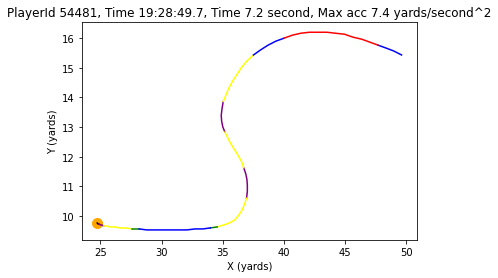

3.9 11.5333333333333
3.5 9.63333333333333
3.7 9.56666666666667
4.3 14.1666666666667
0.7 9.8
3.7 12.4
3.5 12.3333333333333
6.3 9.86666666666667


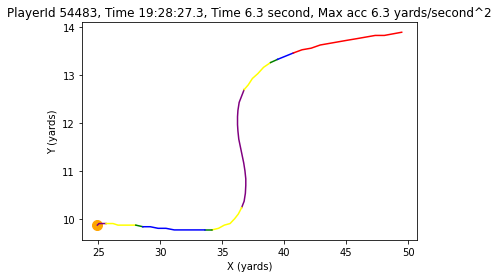

4.1 11.5666666666667
3.7 9.63333333333333
2.1 9.3
2.0 9.1
4.4 14.1666666666667
0.6 8.36666666666667
5.4 12.0666666666667
6.2 9.96666666666667


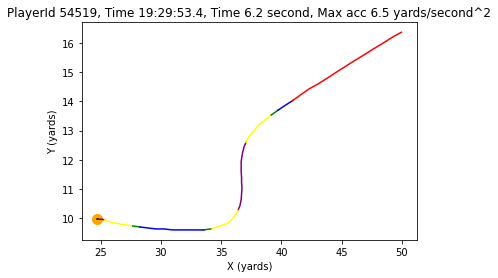

6.9 11.4333333333333
6.6 9.66666666666667
4.7 9.2
4.5 14.1
1.0 12.1
3.0 12.5
5.9 9.8
3.9 11.6333333333333
3.5 9.66666666666667
1.4 8.56666666666667
6.6 14.2333333333333
0.7 9.3
3.4 12.3333333333333
6.4 10.1333333333333


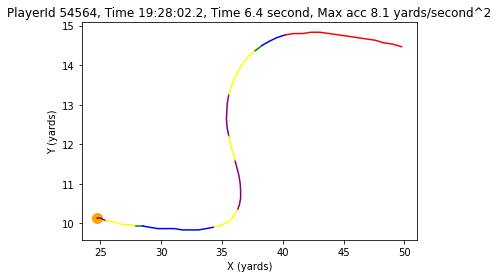

4.1 11.2333333333333
3.7 9.83333333333333
3.6 9.73333333333333
1.6 9.0
4.5 14.2666666666667
0.9 10.6333333333333
3.4 12.3333333333333
3.5 12.3333333333333
5.8 9.83333333333333
4.5 11.6333333333333
3.6 9.83333333333333
2.5 9.43333333333333
4.2 14.2333333333333
1.2 10.6
3.1 12.0333333333333
6.1 9.8


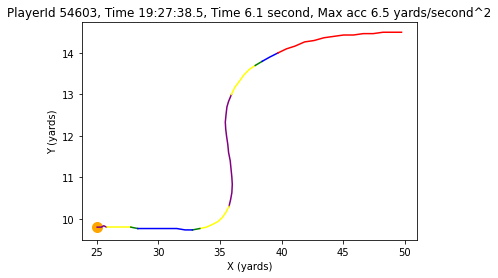

4.0 11.4333333333333
3.6 9.56666666666667
4.6 14.2666666666667
0.5 8.33333333333333
3.3 12.1666666666667
6.1 9.83333333333333


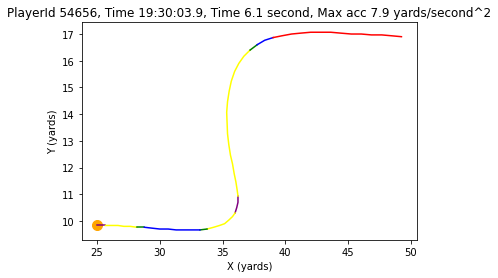

4.2 11.7666666666667
3.5 9.66666666666667
5.2 9.36666666666667
4.6 14.1333333333333
3.5 7.7
6.2 12.3333333333333
8.6 10.0
7.2 11.5
6.5 9.73333333333333
4.5 14.3333333333333
1.0 10.5
3.4 12.2333333333333
6.4 9.83333333333333


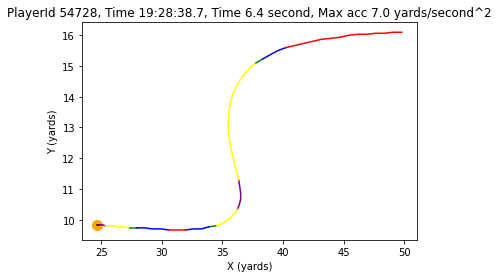

4.1 11.6333333333333
3.6 9.7
1.4 8.63333333333333
4.6 14.2666666666667
0.9 10.6666666666667
3.2 12.2333333333333
6.7 9.9


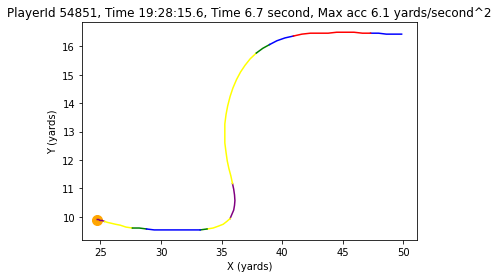

4.2 11.6666666666667
3.7 9.66666666666667
5.8 14.3666666666667
4.1 14.2
0.8 9.93333333333333
5.8 12.2666666666667
9.9 9.9


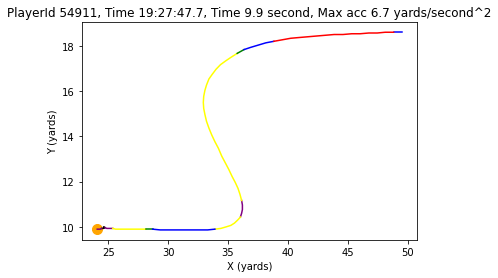

11.0 10.0


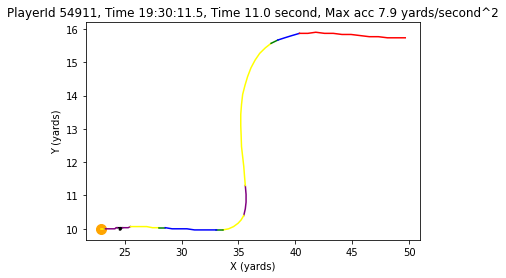

7.3 11.4666666666667
3.7 9.83333333333333
4.4 14.5
3.9 5.6
3.1 12.0333333333333
3.3 12.0666666666667
9.7 9.83333333333333
7.2 11.7666666666667
3.7 9.76666666666667
4.6 14.2666666666667
0.9 10.6
3.3 12.1666666666667
6.7 9.86666666666667


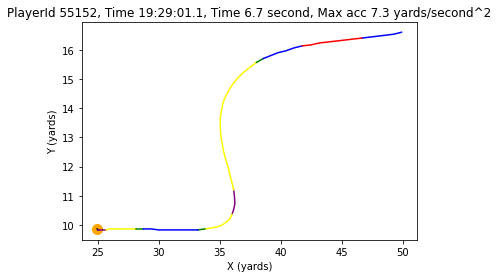

4.2 11.7666666666667
3.8 9.6
2.3 9.46666666666667


In [ ]:
players = player_df['playerId'].drop_duplicates().tolist()
i = 0
for player in players:
    i+=1
    find_comeback(tracking_df, player)

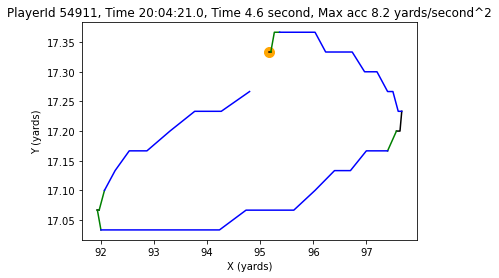

playerId                    timeStamp       posX       posY      velX  \
6      54911  2022-03-03 20:04:21.6000000  95.833333  17.366667  1.933333   
7      54911  2022-03-03 20:04:21.7000000  96.033333  17.366667  2.156667   
8      54911  2022-03-03 20:04:21.8000000  96.233333  17.333333  2.366667   
9      54911  2022-03-03 20:04:21.9000000  96.500000  17.333333  2.530000   
10     54911  2022-03-03 20:04:22.0000000  96.733333  17.333333  2.506667   
11     54911  2022-03-03 20:04:22.1000000  96.966667  17.300000  2.463333   
12     54911  2022-03-03 20:04:22.2000000  97.200000  17.300000  2.410000   
13     54911  2022-03-03 20:04:22.3000000  97.400000  17.266667  2.133333   
14     54911  2022-03-03 20:04:22.4000000  97.500000  17.266667  1.693333   
15     54911  2022-03-03 20:04:22.5000000  97.600000  17.233333  1.200000   
16     54911  2022-03-03 20:04:22.6000000  97.666667  17.233333  0.846667   
17     54911  2022-03-03 20:04:22.7000000  97.666667  17.233333  0.246667   
18     54911  2022-03-03 20:04:22.8000000  97.633333  17.200000 -0.256667   
19     54911  2022-03-03 20:04:22.9000000  97.566667  17.200000 -0.683333   
20     54911  2022-03-03 20:04:23.0000000  97.400000  17.166667 -1.436667   
21     54911  2022-03-03 20:04:23.1000000  97.200000  17.166667 -2.063333   
22     54911  2022-03-03 20:04:23.2000000  97.000000  17.166667 -2.610000   
23     54911  2022-03-03 20:04:23.3000000  96.700000  17.133333 -3.116667   
24     54911  2022-03-03 20:04:23.4000000  96.400000  17.133333 -3.573333   
25     54911  2022-03-03 20:04:23.5000000  96.033333  17.100000 -3.973333   
26     54911  2022-03-03 20:04:23.6000000  95.633333  17.066667 -4.300000   
27     54911  2022-03-03 20:04:23.7000000  95.200000  17.066667 -4.520000   
28     54911  2022-03-03 20:04:23.8000000  94.733333  17.066667 -4.713333   
29     54911  2022-03-03 20:04:23.9000000  94.233333  17.033333 -4.763333   
30     54911  2022-03-03 20:04:24.0000000  93.733333  17.033333 -4.466667   
31     54911  2022-03-03 20:04:24.1000000  93.266667  17.033333 -4.123333   
32     54911  2022-03-03 20:04:24.2000000  92.900000  17.033333 -3.570000   
33     54911  2022-03-03 20:04:24.3000000  92.566667  17.033333 -3.086667   
34     54911  2022-03-03 20:04:24.4000000  92.300000  17.033333 -2.283333   
35     54911  2022-03-03 20:04:24.5000000  92.100000  17.033333 -1.593333   
36     54911  2022-03-03 20:04:24.6000000  92.000000  17.033333 -0.783333   
37     54911  2022-03-03 20:04:24.7000000  91.933333  17.066667 -0.026667   
38     54911  2022-03-03 20:04:24.8000000  91.966667  17.066667  0.860000   
39     54911  2022-03-03 20:04:24.9000000  92.066667  17.100000  1.646667   
40     54911  2022-03-03 20:04:25.0000000  92.266667  17.133333  2.516667   
41     54911  2022-03-03 20:04:25.1000000  92.533333  17.166667  3.240000   
42     54911  2022-03-03 20:04:25.2000000  92.866667  17.166667  3.900000   
43     54911  2022-03-03 20:04:25.3000000  93.300000  17.200000  4.486667   
44     54911  2022-03-03 20:04:25.4000000  93.766667  17.233333  4.966667   
45     54911  2022-03-03 20:04:25.5000000  94.266667  17.233333  5.353333   
46     54911  2022-03-03 20:04:25.6000000  94.800000  17.266667  5.630000   

        velY      accX      accY       acc       vel  
6  -0.030000  2.290000 -0.146667  2.294692  1.933566  
7  -0.043333  2.070000 -0.140000  2.074729  2.157102  
8  -0.040000  1.796667 -0.083333  1.798598  2.367005  
9  -0.046667  1.413333 -0.070000  1.415066  2.530430  
10 -0.126667  0.650000 -0.230000  0.689493  2.509865  
11 -0.160000  0.020000 -0.230000  0.230868  2.468524  
12 -0.180000 -0.456667 -0.206667  0.501254  2.416713  
13 -0.203333 -1.120000 -0.176667  1.133848  2.143002  
14 -0.186667 -1.940000 -0.093333  1.942244  1.703591  
15 -0.173333 -2.453333 -0.023333  2.453444  1.212454  
16 -0.160000 -2.666667  0.033333  2.666875  0.861652  
17 -0.156667 -3.296667  0.063333  3.297275  0.292214  
18 -0.150000 -3.413333  0.083333  3.414350  0.297284  

In [ ]:
def shuttle_finder(df,playerId):
    #acceleration and velocity w/o x & y
    df['acc'] = pow(pow(df.accX,2) + pow(df.accY,2),0.5)
    df['vel'] = pow(pow(df.velX,2) + pow(df.velY,2),0.5)
    min_acc_threshold = 1
    time_threshold = 0.2
    vel_threshold = 1
    min_time = 3.0
    max_time = 10.0
    #total_distance      = 0
    #total_distance_x    = 0
    #total_distance_y    = 0
    move_array          = []
    momentary_stop      = 0
    momentary_stop_threshold = 7
    visited_right = 0
    visited_left = 0
    threshy = 0
    stopper = 0
    #curr_player = player_df.iloc[12].playerId
    #curr_player = 
    curr_player_df = df.loc[df.playerId == playerId]
    curr_player_df = curr_player_df.loc[curr_player_df.timeStamp > '2022-03-03 19:50:00.0000000']
    curr_player_df = curr_player_df.loc[curr_player_df.timeStamp < '2022-03-03 20:59:00.0000000']
    curr_player_df = curr_player_df.loc[curr_player_df.posX > 89]
    curr_player_df = curr_player_df.loc[curr_player_df.posX < 99]
    curr_player_df = curr_player_df.loc[curr_player_df.posY < 18]
    curr_player_df = curr_player_df.loc[curr_player_df.posY > 15]
    for i in range(len(curr_player_df)):
        curr_df = curr_player_df.iloc[i]
        if math.fabs(curr_df.accX) >= min_acc_threshold or math.fabs(curr_df.velX) >= vel_threshold or (len(move_array) > 0 and momentary_stop < momentary_stop_threshold):
            if len(move_array) == 0:
                momentary_stop      = 0
                start = curr_df
                move_array.append(curr_df)
                #print(curr_df.velX)


            else:
                if math.fabs(curr_df.accX) < min_acc_threshold:
                    momentary_stop += 1
                    move_array.append(curr_df)
                    #print(curr_df.velX)

                else:
                    momentary_stop = 0
                    if curr_df.posX > start.posX and visited_right == 0 and visited_left == 0:
                      visited_right = 1
                      move_array.append(curr_df)
                      #print(curr_df.velX)
                    elif curr_df.posX > start.posX and visited_right == 1 and visited_left == 0:
                      move_array.append(curr_df)
                      #print(curr_df.velX)
                    elif curr_df.posX < start.posX and visited_right == 1 and visited_left == 0:
                      visited_left = 1
                      move_array.append(curr_df)
                      #print(curr_df.velX)
                    elif curr_df.posX < start.posX and visited_right == 1 and visited_left == 1:
                      move_array.append(curr_df)
                      #print(curr_df.velX)
                    elif curr_df.posX >= start.posX and visited_right == 1 and visited_left == 1:
                      break
                    
                    
                    #move_array.append(curr_df)

            
              
            #if curr_df.posX > start.posX and stopper == 0:
                #threshy +=1
                #move_array.append(curr_df)
            #if threshy > 1  and curr_df.posX < start.posX:
                #move_array.append(curr_df)
                #stopper +=1
            #if stopper > 0 and curr_df.posX > start.posX:
            #move_array.append(curr_df)
                #stopper = -1 

      #print("not else")
        elif (len(move_array) > 0):
            total_time = (len(move_array) - 1) / 10
            if (total_time > min_time and total_time < max_time):
                plot_path(move_array,total_time)
                #print(len(move_array))
            move_array = []
    if (len(move_array)):
        total_time = (len(move_array) - 1) / 10
        if total_time < max_time and total_time > min_time:
            plot_path(move_array, total_time)
            #print(len(move_array))
#shuttle_finder(tracking_df, 54656)
    final_df = pd.DataFrame(move_array, index =[i for i in range(len(move_array))],columns =['playerId', 'timeStamp', 'posX', 'posY', 'velX','velY', 'accX', 'accY', 'acc','vel'])
    if len(final_df)> 0:    
        for i in range(len(final_df)):
            if i != 0:
                changePos = final_df.posX[i] - final_df.posX[i-1] 
                if changePos > .15:
                    cut = i
                    break
        new_df = final_df.iloc[cut:,:]
        return new_df
shuttle_finder(tracking_df, 54911)
print(len(shuttle_finder(tracking_df, 54911))/10)

54481
54483
54519


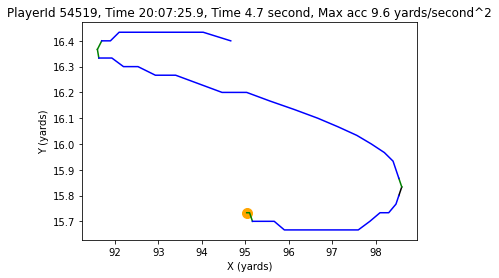

54536
54564


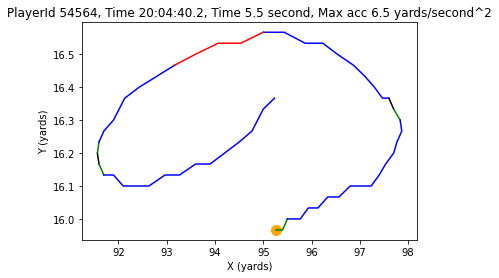

54570
54590
54603


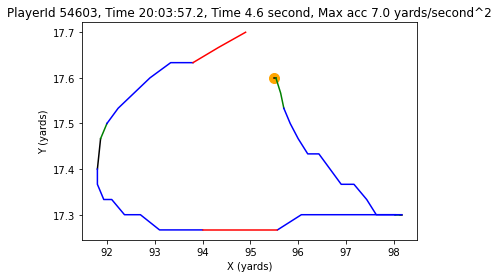

54656


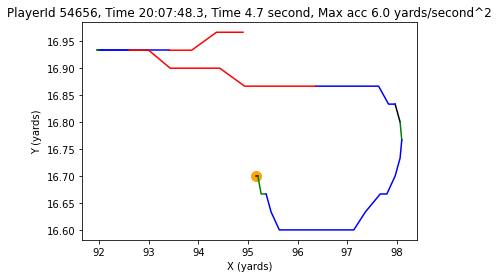

54694
54728


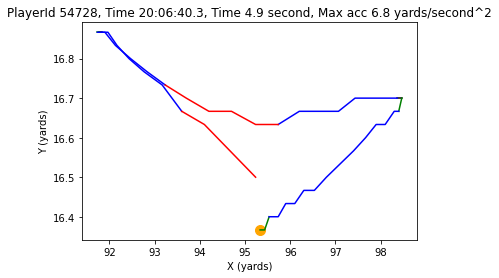

54851
54911


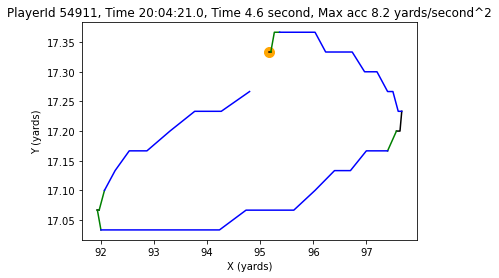

55046


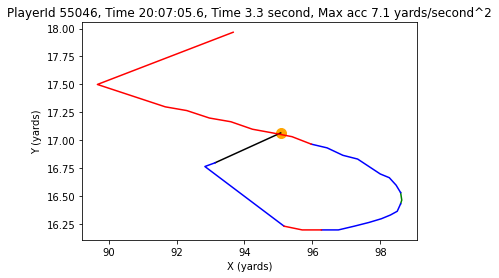

UnboundLocalError: local variable 'cut' referenced before assignment

In [ ]:
players = player_df['playerId'].drop_duplicates().tolist()
i = 0
for player in players:
    i+=1
    print(player)
    if player not in [54590]:
        if i == 1:
            combined = shuttle_finder(tracking_df, player)
        else:
            #print(type(shuttle_finder(tracking_df, player)))
            if type(shuttle_finder(tracking_df, player)) is None:
                combined = combined.append(shuttle_finder(tracking_df, player))
                print(len(shuttle_finder(tracking_df, player))/10)
#combined.to_csv('combinedShuttle.csv')

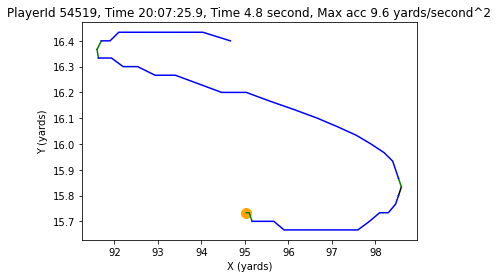

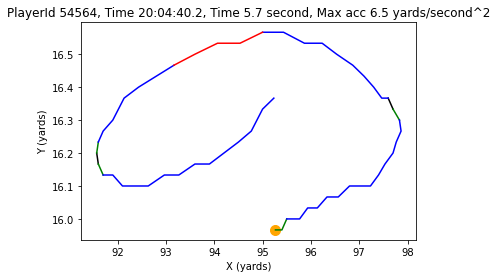

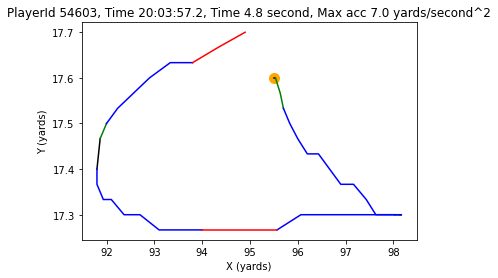

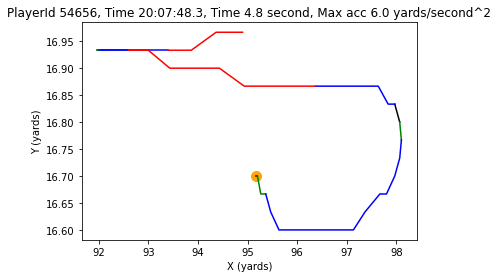

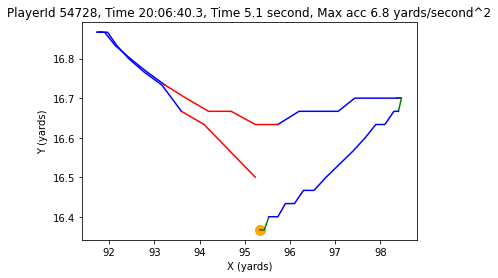

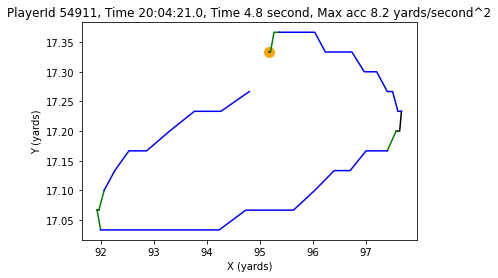

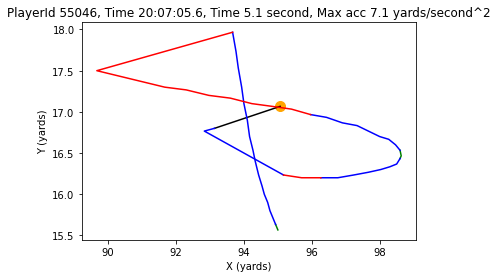

In [ ]:
players = player_df['playerId'].drop_duplicates().tolist()
for player in players:
  shuttle_finder(tracking_df, player)